# Rubric
|평가문항|	상세기준| 내 평가|
|--|--|--|
|1. 캐글 데이터분석 전과정이 성공적으로 진행되었는가?|데이터 전처리, 모델학습, 예측의 전체 과정을 거쳐 만든 csv파일을 </br>캐글 My submission까지 진행했고, </br>submission 결과를 이미지로 제출하였다.|O
|2. 전처리, 학습과정 및 결과에 대한 설명이 시각화를 포함하여 체계적으로 진행되었는가?|제출한 주피터노트북 파일이 </br>전처리, 학습, 최적화 진행 과정이 체계적으로 기술되었다.|O
|3. 회귀모델 예측정확도가 기준 이상 높게 나왔는가?|	다양한 피처 엔지니어링과 하이퍼 파라미터 튜닝 등의 최적화 기법을 통해</br> 캐글 리더보드의 Private score 기준 110000 이하의 점수를 얻었다.|X






https://www.kaggle.com/c/2019-2nd-ml-month-with-kakr


- 학습 목표
    - 데이터 사이언스 관련 최대 커뮤니티인 캐글의 경진대회에 직접 참여해서 문제를 해결해본다.
    - 캐글에서 데이터를 내려받는 것으로부터 시작해서, 로컬 서버에서 자유롭게 다루어보며 문제 해결을 위한 고민을 해본다.
    - 앙상블 기법의 개념과 강점을 이해하고, 여러 모델의 예측 결과를 Averaging 한 최종 결과로 캐글에 제출해본다.
    - 하이퍼 파라미터 튜닝의 필요성과 의미를 이해하고, Grid Search, Random Search 등의 기법을 알아본다.
    - Grid Search 기법을 활용해서 직접 하이퍼 파라미터 튜닝 실험을 해보고, 모델의 성능을 최대한 끌어올려본다.
- 학습 전제
    - 정형 데이터를 활용해 EDA와 간단한 분류, 회귀 문제를 해결해본 적이 있다.
    - numpy, pandas, matplotlib을 활용해 정형 데이터를 자유자재로 다룰 수 있다.
    - 정형 데이터를 활용해 다양한 모델을 학습시켜보고, 예측 결과를 도출하는 것까지의 과정을 코드로 진행할 수 있다.
- 목차
    1. 대회의 시작: 참가 규칙과 데이터, 평가 기준 살펴보기
    2. 자 그럼, 일단 제출하고 시작해! Baseline은 여기 있으니까!
    3. 랭킹을 올리고 싶다면? 최적의 모델을 찾아서, 하이퍼 파라미터 튜닝
    4. 프로젝트: This is your playground! Leaderboard를 정복해주세요!
- 준비물
    - 이번 노드에서는 회귀 모델을 구현하는 데에 사용하는 xgboost와 lightgbm 라이브러리와, 결측 데이터를 확인하는 missingno 라이브러리가 필요합니다.

# Data Description
- File descriptions
    - train.csv - 예측 모델을 만들기 위해 사용하는 학습 데이터입니다. 집의 정보와 예측할 변수인 가격(Price) 변수를 가지고 있습니다.
    - test.csv - 학습셋으로 만든 모델을 가지고 예측할 가격(Price) 변수를 제외한 집의 정보가 담긴 테스트 데이터 입니다.
    - sample_submission.csv - 제출시 사용할 수 있는 예시 submission.csv 파일입니다.
</br>
- Data fields 
    - ID : 집을 구분하는 번호
    - date : 집을 구매한 날짜
    - price : 집의 가격(Target variable) 2015년 현재 기준.
    - bedrooms : 침실의 수
    - bathrooms : 화장실의 수
    - sqft_living : 주거 공간의 평방 피트(면적)
    - sqft_lot : 부지의 평방 피트(면적)
    - floors : 집의 층 수
    - waterfront : 집의 전방에 강이 흐르는지 유무 (a.k.a. 리버뷰)
    - view : 집이 얼마나 좋아 보이는지의 정도
    - condition : 집의 전반적인 상태
    - grade : King County grading 시스템 기준으로 매긴 집의 등급
    - sqft_above : 지하실을 제외한 평방 피트(면적)
    - sqft_basement : 지하실의 평방 피트(면적)
    - yr_built : 지어진 년도
    - yr_renovated : 집을 재건축한 년도
    - zipcode : 우편번호
    - lat : 위도
    - long : 경도
    - sqft_living15 : 2015년 기준 주거 공간의 평방 피트(면적, 집을 재건축했다면, 변화가 있을 수 있음)
    - sqft_lot15 : 2015년 기준 부지의 평방 피트(면적, 집을 재건축했다면, 변화가 있을 수 있음)

---
---
- 경험으로 집에 언제 지어졌는지보다는 위치가 중요했음. 미국도 마찬가지였고 학군은 너무 중요했음. 물론 새집이면 좋겠지만 새집이라고 안좋은 지역의 집을 사지는 않음. 
- 한남동이 비싼 이유는 주위에 외교관 공간이 많아 치안이 좋다는 이유가 있다고 들었음. 
- 또한 ***좋은 지역에서 멀어질 수록 집값은 떨어졌음***.
- feature 중에 위도 경도가 위치를 나타내고 있지만 아래에서 상관계수를 보면 그다지 높지 않음.
- 좋은 지역이 하나이면 상관계수가 높겠지만 여러 지역일 경우 낮을 수고 있다고 생각이 듬.
- 그렇다면 ***집값이 높은 곳을 찍고 그 곳을 기준으로 거리를 나타내는 컬럼을 추가***해보는 것은 어떨까 함. 
- 집의 크기가 중요했음. 방의 갯수가 중요하고 좋은 집은 당연히 방 하나에 화장실 하나가 붙어 있지 공용화장실까지 포함하면 방의 갯수보다 화장실 갯수가 많아짐. ***방 개수에 대한 화장실 개수***가 커지면 집이 좋을 확률이 높을 거라는 예상이 됨. => 이 컬럼 추가.   
- 집 마당이 넓으면 당연히 좋은 집임. 건물을 충분히 만들고 외부 공간을 생각하기 때문에 ***땅 면적에 비해 건평***이 적은 것은 좋을 집이 가능성이 있음. => 이 컬럼 추가
        추가할 컬럼 리스트
        - 최대 집값의 위치와의 거리 => 라이브러리 이용
        - 화장실 개수 / 방 개수 = bathrooms / bedrooms 
        - 건평 / 땅 면적 = sqft_living /sqft_lot,  sqft_living15 /sqft_lot15
---

- Reference
https://mizykk.tistory.com/21

#1 Import Library & Load Data

In [483]:
import warnings
warnings.filterwarnings("ignore")

import os
from os.path import join

import pandas as pd
import numpy as np

import missingno as msno

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [484]:
import sklearn

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

print(xgb.__version__)
print(lgb.__version__)
print(msno.__version__)
print(sklearn.__version__)

1.7.5
3.3.5
0.5.2
1.2.2


In [150]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [523]:
data_dir = '/content/drive/MyDrive/Colab Notebooks/aiffel/(8주차)Kaggle_datathon/data'

train_data_path = join(data_dir, 'train.csv')
test_data_path = join(data_dir, 'test.csv')     # 테스트, 즉 submission 시 사용할 데이터 경로

print(train_data_path)
print(test_data_path)

/content/drive/MyDrive/Colab Notebooks/aiffel/(8주차)Kaggle_datathon/data/train.csv
/content/drive/MyDrive/Colab Notebooks/aiffel/(8주차)Kaggle_datathon/data/test.csv


In [524]:
train_original = pd.read_csv(train_data_path)
test_original = pd.read_csv(test_data_path)
train = train_original.copy()
test = test_original.copy()
print('train data dim : {}'.format(train.shape))
print('test data dim : {}'.format(test.shape))
train.head()

train data dim : (15035, 21)
test data dim : (6468, 20)


id             date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0   0  20141013T000000  221900.0         3       1.00         1180      5650   
1   1  20150225T000000  180000.0         2       1.00          770     10000   
2   2  20150218T000000  510000.0         3       2.00         1680      8080   
3   3  20140627T000000  257500.0         3       2.25         1715      6819   
4   4  20150115T000000  291850.0         3       1.50         1060      9711   

   floors  waterfront  view  ...  grade  sqft_above  sqft_basement  yr_built  \
0     1.0           0     0  ...      7        1180              0      1955   
1     1.0           0     0  ...      6         770              0      1933   
2     1.0           0     0  ...      8        1680              0      1987   
3     2.0           0     0  ...      7        1715              0      1995   
4     1.0           0     0  ...      7        1060              0      1963   

   yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0             0    98178  47.5112 -122.257           1340        5650  
1             0    98028  47.7379 -122.233           2720        8062  
2             0    98074  47.6168 -122.045           1800        7503  
3             0    98003  47.3097 -122.327           2238        6819  
4             0    98198  47.4095 -122.315           1650        9711  

[5 rows x 21 columns]

In [87]:
train.shape, test.shape
#train에는 price(target)이 같이 있음. 

((15035, 21), (6468, 20))

In [92]:
train.info(), test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15035 entries, 0 to 15034
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             15035 non-null  int64  
 1   date           15035 non-null  object 
 2   price          15035 non-null  float64
 3   bedrooms       15035 non-null  int64  
 4   bathrooms      15035 non-null  float64
 5   sqft_living    15035 non-null  int64  
 6   sqft_lot       15035 non-null  int64  
 7   floors         15035 non-null  float64
 8   waterfront     15035 non-null  int64  
 9   view           15035 non-null  int64  
 10  condition      15035 non-null  int64  
 11  grade          15035 non-null  int64  
 12  sqft_above     15035 non-null  int64  
 13  sqft_basement  15035 non-null  int64  
 14  yr_built       15035 non-null  int64  
 15  yr_renovated   15035 non-null  int64  
 16  zipcode        15035 non-null  int64  
 17  lat            15035 non-null  float64
 18  long  

(None, None)

In [47]:
train['yr_renovated'].unique()

array([   0, 2002, 1999, 1991, 1978, 2005, 2008, 2003, 1994, 1984, 1954,
       2014, 2011, 1974, 1983, 2013, 1990, 1957, 1977, 1981, 1995, 2000,
       1986, 1992, 2004, 2007, 1987, 2006, 1985, 1971, 1945, 1979, 1997,
       2010, 1969, 1948, 2009, 1970, 2015, 1989, 2001, 1968, 2012, 1963,
       1993, 1962, 1972, 1980, 1998, 1955, 1996, 1950, 1956, 1982, 1988,
       1940, 1946, 1975, 1964, 1958, 1976, 1973, 1967, 1965, 1944])

- bathroom의 수가 소수점? 욕조 있고 없고 변기 있고 없고를 소수점으로 표현했겠지.
- yr_renovated	= 0은 리모델링 안했음. 안한거는 0으로 두지 말고 yr_built 값을 가지고 와서 붙이자.
- sqft_living과 sqft_living15 값이 많이 차이가 행마다 다름. 1행과 2행의 경우...
- price는 현재 주택의 가격.(2015년) 

#2 EDA

##a. Understand Data(with visualization)

In [525]:
#date를 정수형으로 처리하자.
train['date'] = train['date'].apply(lambda i: i[:6]).astype(int)
train.head()

id    date     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0   0  201410  221900.0         3       1.00         1180      5650     1.0   
1   1  201502  180000.0         2       1.00          770     10000     1.0   
2   2  201502  510000.0         3       2.00         1680      8080     1.0   
3   3  201406  257500.0         3       2.25         1715      6819     2.0   
4   4  201501  291850.0         3       1.50         1060      9711     1.0   

   waterfront  view  ...  grade  sqft_above  sqft_basement  yr_built  \
0           0     0  ...      7        1180              0      1955   
1           0     0  ...      6         770              0      1933   
2           0     0  ...      8        1680              0      1987   
3           0     0  ...      7        1715              0      1995   
4           0     0  ...      7        1060              0      1963   

   yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0             0    98178  47.5112 -122.257           1340        5650  
1             0    98028  47.7379 -122.233           2720        8062  
2             0    98074  47.6168 -122.045           1800        7503  
3             0    98003  47.3097 -122.327           2238        6819  
4             0    98198  47.4095 -122.315           1650        9711  

[5 rows x 21 columns]

In [526]:
#yr_tenovated가 0인 곳을 yr_built 값으로 채우기
for df in [train, test]:
    df['yr_renovated'] = df['yr_renovated'].apply(lambda x: np.nan if x == 0 else x)
    df['yr_renovated'] = df['yr_renovated'].fillna(df['yr_built'])

In [304]:
train

id    date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0          0  201410   221900.0         3       1.00         1180      5650   
1          1  201502   180000.0         2       1.00          770     10000   
2          2  201502   510000.0         3       2.00         1680      8080   
3          3  201406   257500.0         3       2.25         1715      6819   
4          4  201501   291850.0         3       1.50         1060      9711   
...      ...     ...        ...       ...        ...          ...       ...   
15030  15030  201410   610685.0         4       2.50         2520      6023   
15031  15031  201503  1007500.0         4       3.50         3510      7200   
15032  15032  201405   360000.0         3       2.50         1530      1131   
15033  15033  201502   400000.0         4       2.50         2310      5813   
15034  15034  201410   325000.0         2       0.75         1020      1076   

       floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0         1.0           0     0  ...      7        1180              0   
1         1.0           0     0  ...      6         770              0   
2         1.0           0     0  ...      8        1680              0   
3         2.0           0     0  ...      7        1715              0   
4         1.0           0     0  ...      7        1060              0   
...       ...         ...   ...  ...    ...         ...            ...   
15030     2.0           0     0  ...      9        2520              0   
15031     2.0           0     0  ...      9        2600            910   
15032     3.0           0     0  ...      8        1530              0   
15033     2.0           0     0  ...      8        2310              0   
15034     2.0           0     0  ...      7        1020              0   

       yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0          1955        1955.0    98178  47.5112 -122.257           1340   
1          1933        1933.0    98028  47.7379 -122.233           2720   
2          1987        1987.0    98074  47.6168 -122.045           1800   
3          1995        1995.0    98003  47.3097 -122.327           2238   
4          1963        1963.0    98198  47.4095 -122.315           1650   
...         ...           ...      ...      ...      ...            ...   
15030      2014        2014.0    98056  47.5137 -122.167           2520   
15031      2009        2009.0    98136  47.5537 -122.398           2050   
15032      2009        2009.0    98103  47.6993 -122.346           1530   
15033      2014        2014.0    98146  47.5107 -122.362           1830   
15034      2008        2008.0    98144  47.5941 -122.299           1020   

       sqft_lot15  
0            5650  
1            8062  
2            7503  
3            6819  
4            9711  
...           ...  
15030        6023  
15031        6200  
15032        1509  
15033        7200  
15034        1357  

[15035 rows x 21 columns]

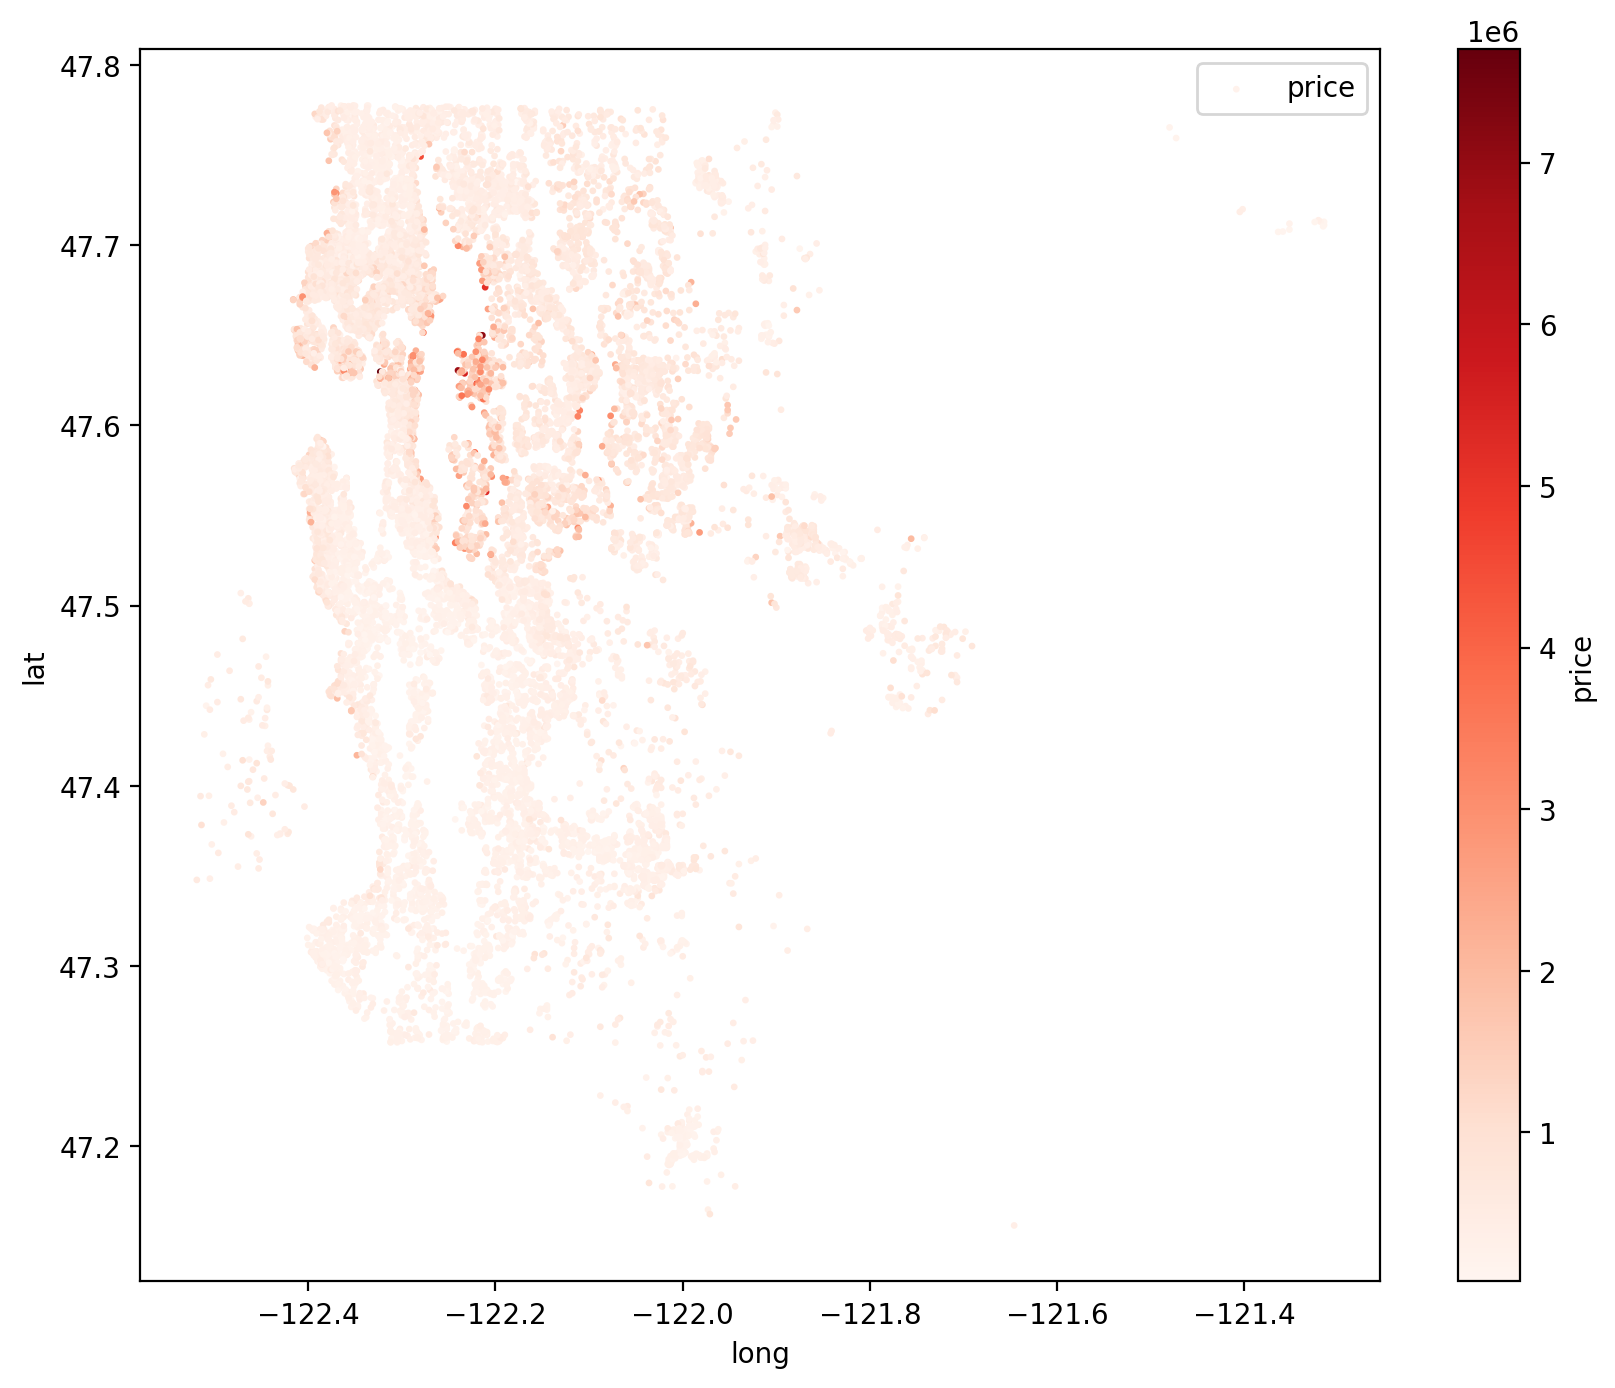

In [ ]:
viz_4=train.plot(kind='scatter', x='long', y='lat', label='price', c='price', s = 2,
                  cmap=plt.get_cmap('Reds'), colorbar=True, alpha=1, figsize=(10,8)) 
viz_4.legend()

#cmap : color : rainbow, jet, Blues, autumn, RdYlGn, Reds, 
#s : size of point
#https://frhyme.github.io/python-lib/matplotlib_extracting_color_from_cmap/

#비싼 동네가 있고 대부분 다른 곳은 비슷한 거 같음. 
# 가운데 길게 진한 점들을 볼 수 있음. 

- 지역과 집 가격과의 상관관계를 있는데 그렇다면 zipcode와도 관련이 있을 텐데 상관계수를 보면 안그렇단 말이지.. ㅜㅜ
- 최대 가격의 집의 longitude(경도)를 중심으로 경도 차이를 보면 어떻게 될까?

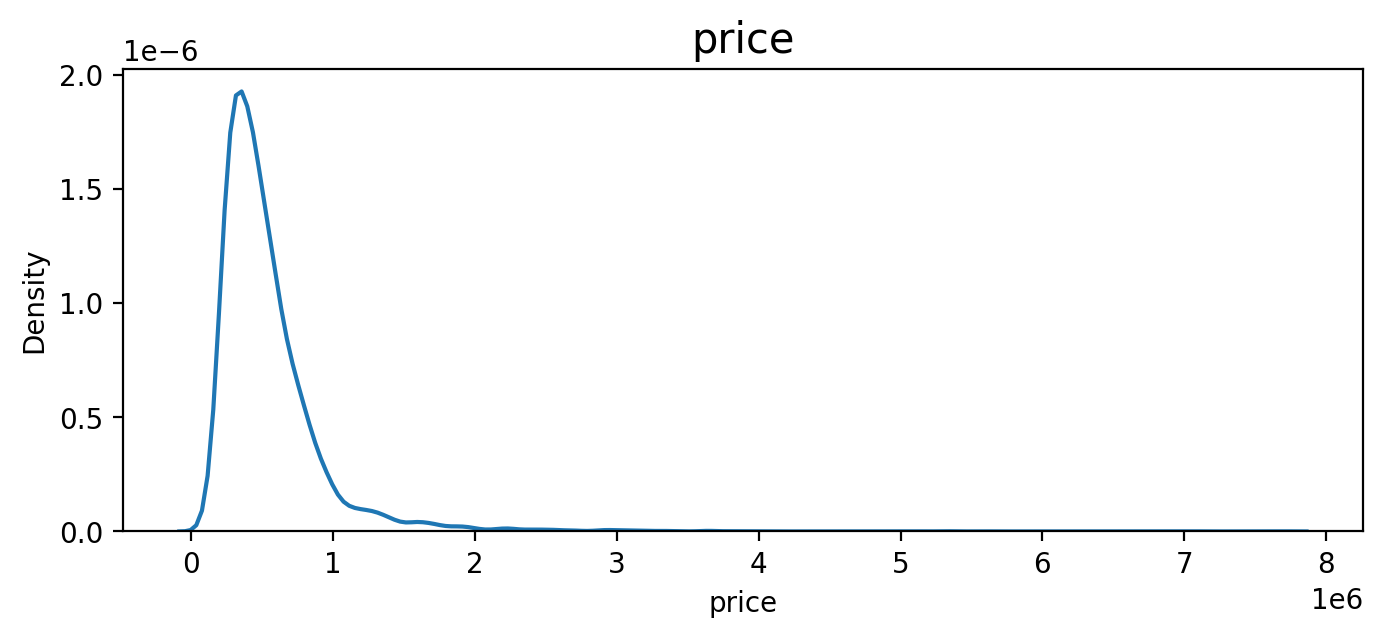

In [527]:
fig, ax = plt.subplots(figsize=(8, 3))
sns.kdeplot(data=train['price'])
ax.set_title('price', fontsize=15)
plt.show()
#price가 오른쪽의 꼬리가 길고 한쪽으로 치우쳐짐. => 로그변환 필요함. 

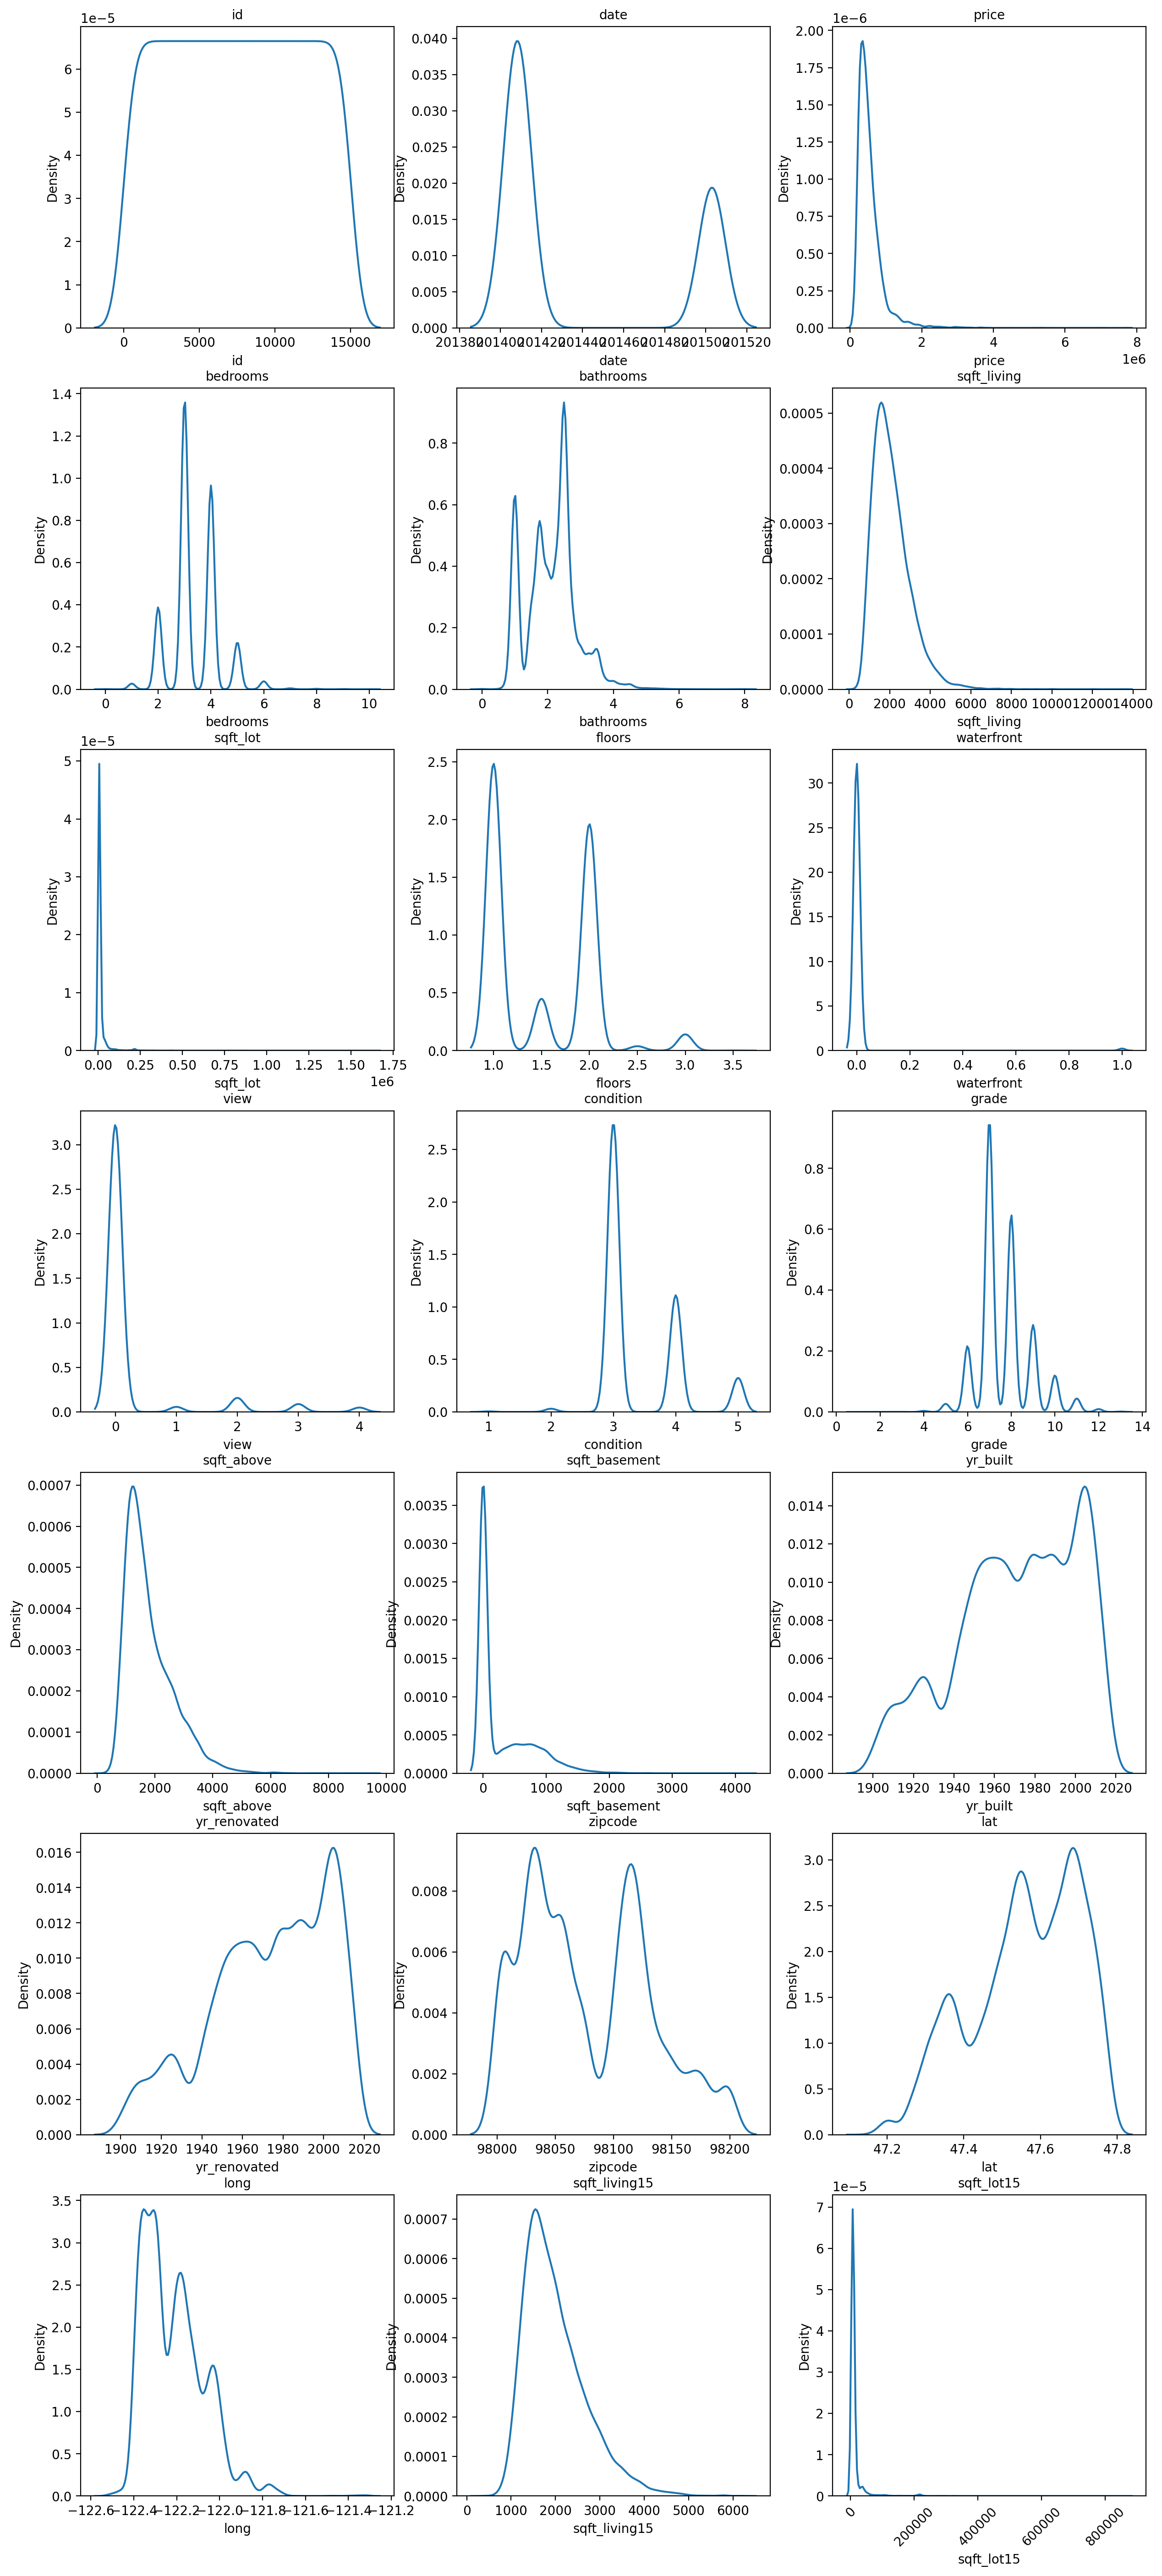

In [528]:
fig, ax = plt.subplots(7, 3, figsize=(15, 35))   # 가로 스크롤 때문에 그래프 확인이 불편하다면 figsize의 x값을 조절해 보세요. 

# date 변수(count==0인 경우)는 제외하고 분포를 확인합니다.
count = 0
columns = train.columns

for row in range(7):
    for col in range(3):
        plt.xticks(rotation=45)
        sns.kdeplot(data=train[columns[count]], ax=ax[row][col])
        ax[row][col].set_title(columns[count], fontsize=10)
        count += 1
        if count == len(columns) :
            break
# 몇몇 그래프가 한쪽으로 치우침. log 변환이 필요함. 'bedrooms', 'bathroom', sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_lot15', 'sqft_living15'

In [ ]:
train['price'].describe()
#최대 최소가 10배 차이

count    1.503500e+04
mean     5.406827e+05
std      3.715247e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [529]:
# 변수간 상관 관계 히트맵 함수
# train = pd.concat([train, y], axis=1)
def heatmap(train):                                                                              
    fig, ax = plt.subplots( figsize =(12,10))
    cor_tab =train.corr().apply(np.round, decimals=2)

    # Palette
    pal = sns.color_palette("coolwarm", 10000)

    mask = np.zeros_like(train.corr(), dtype=bool)
    mask[np.triu_indices_from(mask)] = True    #윗 줄과 함께 그래프 반만 보이기

    sns.heatmap(
        data=cor_tab, 
        annot=True, 
        cmap=pal, 
        mask=mask,
        vmin=-1, 
        center=0, 
        vmax=1, 
        cbar_kws={"shrink": .5}
        )
    plt.show()


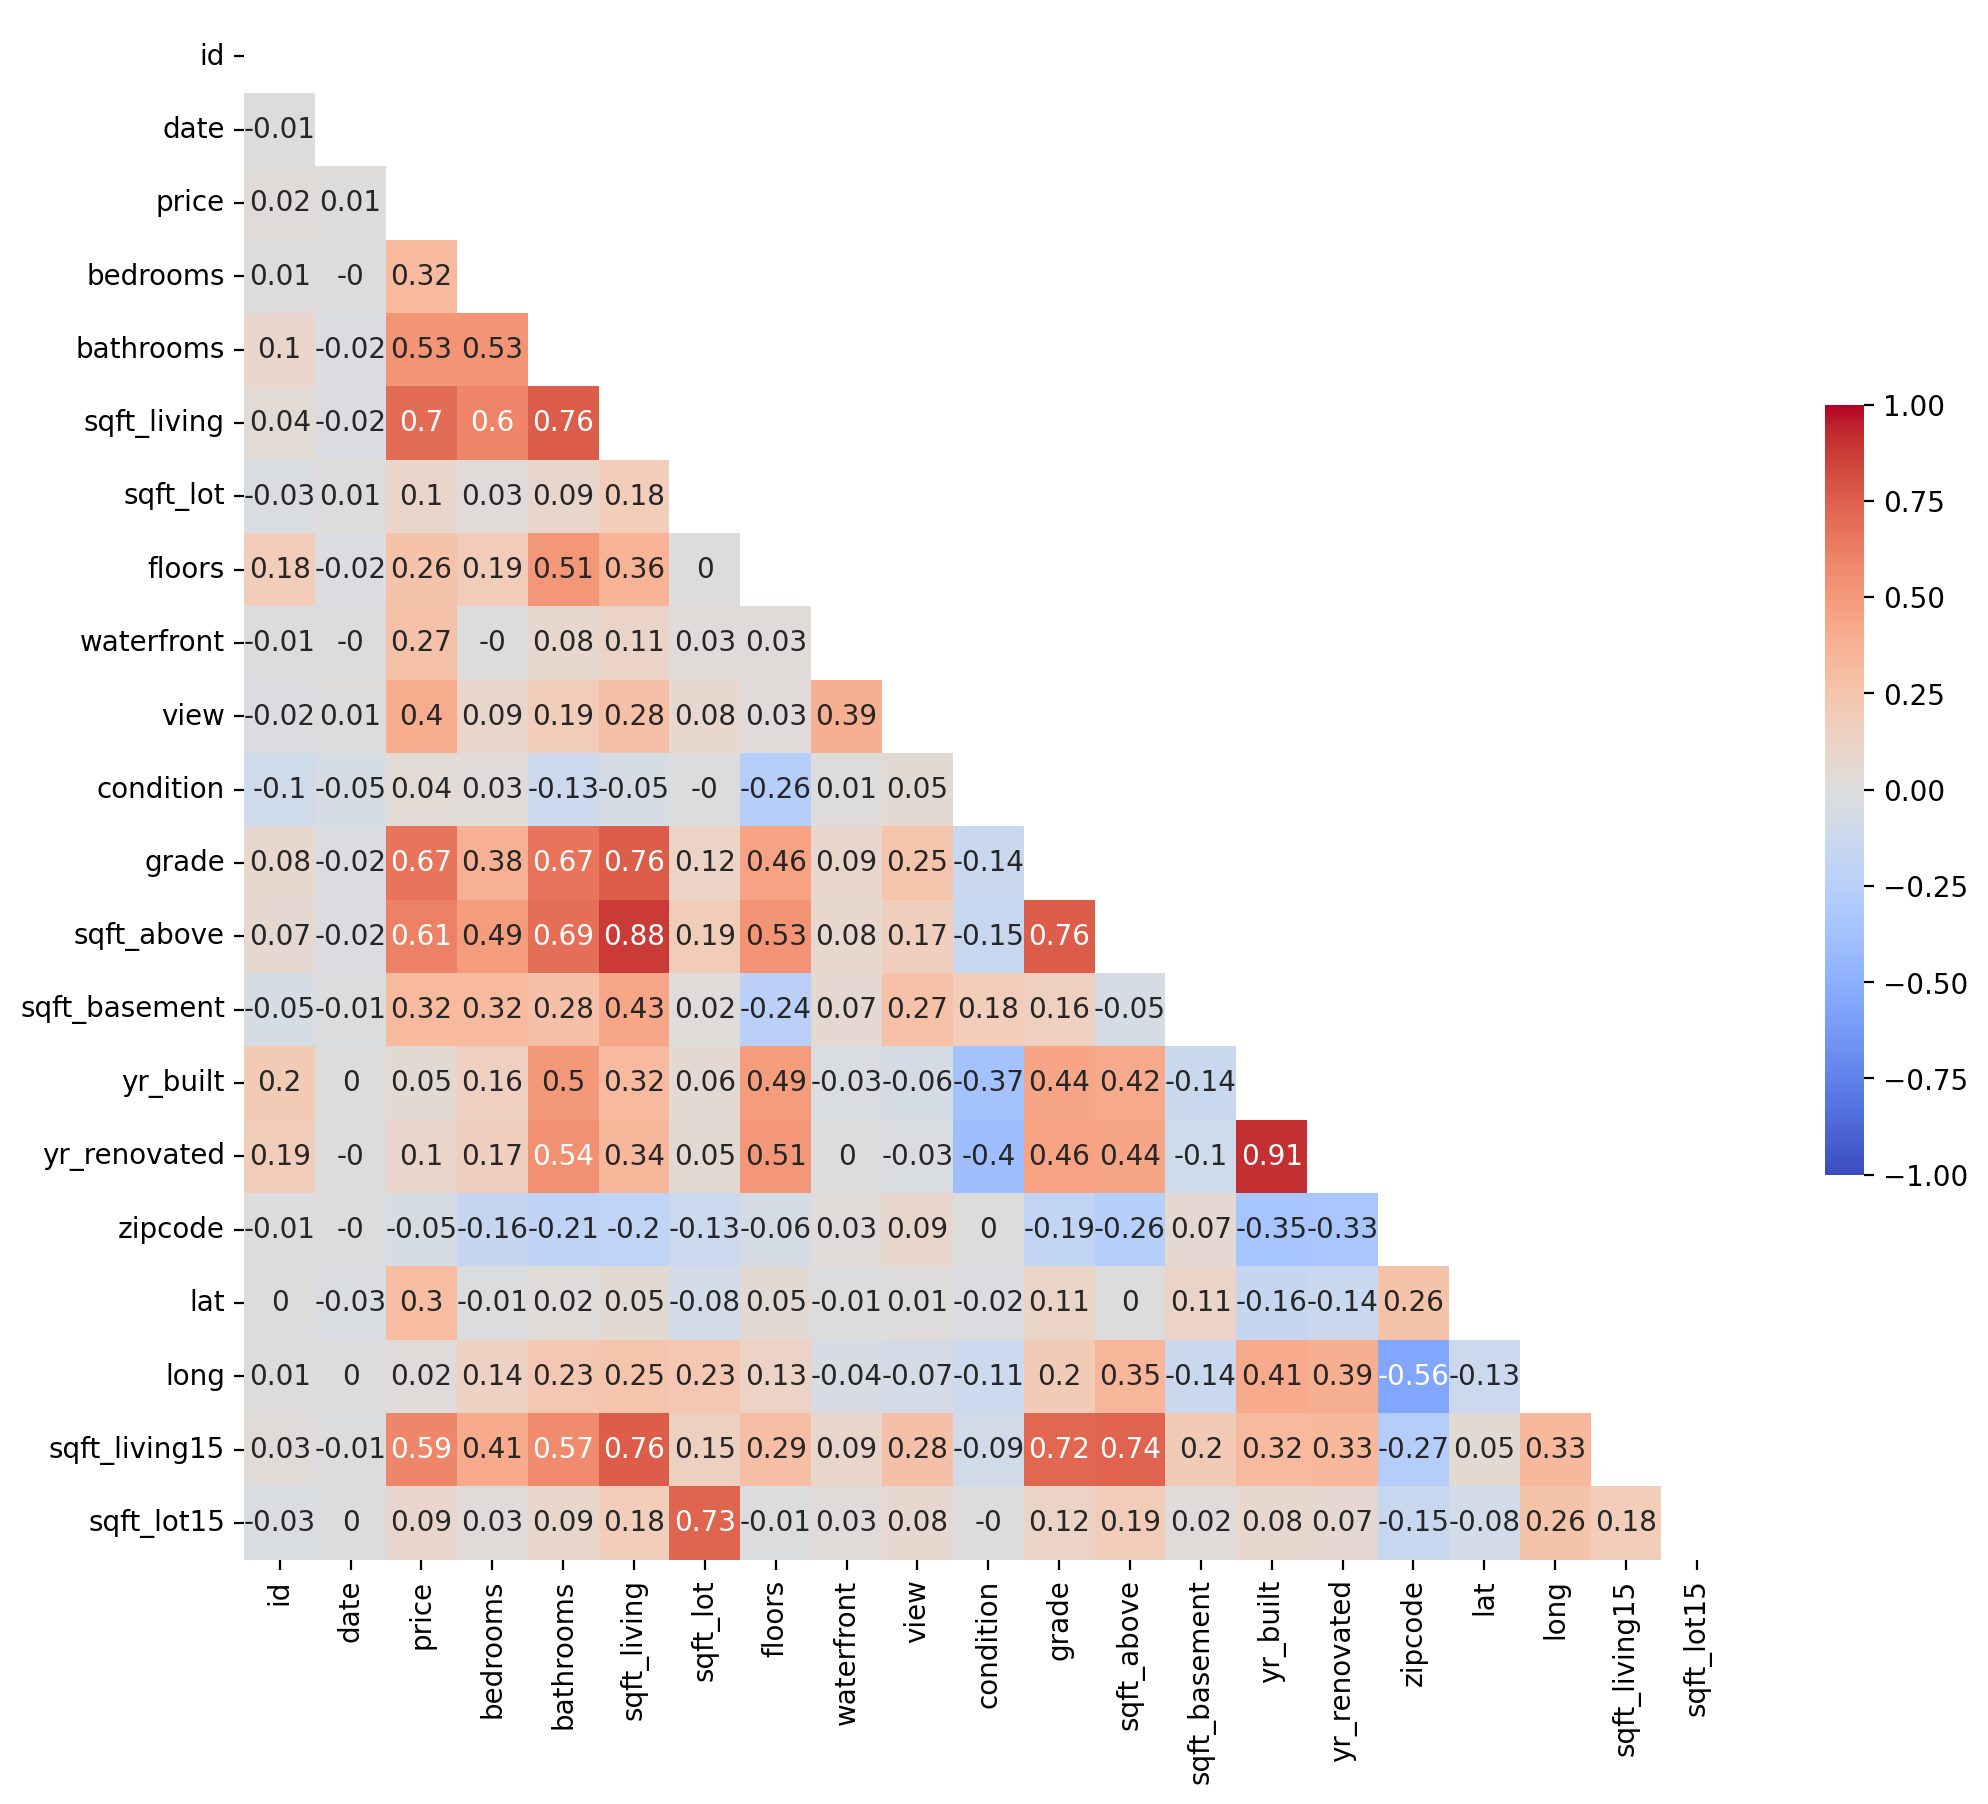

In [530]:
heatmap(train)

#feature간 상관관계가 매우 높은 거(0.99)는 없음. 
#price와 feature 간 상관관계 0.3 넘는 거만 bedrooms, bathrooms, sqt_living, view, grade, sqft_above, sqft_basement, lat, sqt_living15이지만 위치를 나타내는 long을 추가하자. 

In [ ]:
train.corr()

id      date     price  bedrooms  bathrooms  sqft_living  \
id             1.000000 -0.013243  0.023242  0.010343   0.104584     0.042774   
date          -0.013243  1.000000  0.009917 -0.002142  -0.021991    -0.020758   
price          0.023242  0.009917  1.000000  0.324431   0.524164     0.699500   
bedrooms       0.010343 -0.002142  0.324431  1.000000   0.529009     0.597783   
bathrooms      0.104584 -0.021991  0.524164  0.529009   1.000000     0.754009   
sqft_living    0.042774 -0.020758  0.699500  0.597783   0.754009     1.000000   
sqft_lot      -0.034227  0.007912  0.096109  0.031642   0.086118     0.172638   
floors         0.182909 -0.020587  0.264530  0.188338   0.508377     0.363244   
waterfront    -0.010982 -0.001173  0.259383 -0.006267   0.073752     0.103156   
view          -0.024241  0.014543  0.401960  0.083531   0.183660     0.278408   
condition     -0.101587 -0.047402  0.040489  0.035065  -0.126666    -0.054611   
grade          0.078596 -0.022560  0.674123  0.373132   0.664991     0.764580   
sqft_above     0.074023 -0.018305  0.605222  0.493522   0.685335     0.877148   
sqft_basement -0.050560 -0.008656  0.313633  0.312663   0.275991     0.425894   
yr_built       0.202218  0.004562  0.052020  0.158919   0.506920     0.320845   
yr_renovated   0.193464 -0.003098  0.102880  0.170852   0.540561     0.345990   
zipcode       -0.005953 -0.000761 -0.051614 -0.162413  -0.208426    -0.202472   
lat            0.002423 -0.031368  0.307172 -0.012073   0.017070     0.050536   
long           0.014999  0.002932  0.024870  0.136629   0.229206     0.248231   
sqft_living15  0.029355 -0.013849  0.592844  0.406035   0.572353     0.762821   
sqft_lot15    -0.032446  0.003924  0.085937  0.025377   0.084937     0.180391   

               sqft_lot    floors  waterfront      view  ...     grade  \
id            -0.034227  0.182909   -0.010982 -0.024241  ...  0.078596   
date           0.007912 -0.020587   -0.001173  0.014543  ... -0.022560   
price          0.096109  0.264530    0.259383  0.401960  ...  0.674123   
bedrooms       0.031642  0.188338   -0.006267  0.083531  ...  0.373132   
bathrooms      0.086118  0.508377    0.073752  0.183660  ...  0.664991   
sqft_living    0.172638  0.363244    0.103156  0.278408  ...  0.764580   
sqft_lot       1.000000  0.000204    0.025376  0.078279  ...  0.118561   
floors         0.000204  1.000000    0.030599  0.033029  ...  0.462032   
waterfront     0.025376  0.030599    1.000000  0.390267  ...  0.086451   
view           0.078279  0.033029    0.390267  1.000000  ...  0.245981   
condition     -0.001771 -0.261184    0.012172  0.045426  ... -0.143938   
grade          0.118561  0.462032    0.086451  0.245981  ...  1.000000   
sqft_above     0.183216  0.530011    0.077374  0.167961  ...  0.759464   
sqft_basement  0.013636 -0.243576    0.068630  0.262222  ...  0.158298   
yr_built       0.058445  0.490818   -0.025841 -0.061476  ...  0.441777   
yr_renovated   0.053879  0.505841    0.001495 -0.028098  ...  0.458364   
zipcode       -0.127668 -0.059127    0.029857  0.089612  ... -0.187220   
lat           -0.082777  0.048624   -0.015363  0.004763  ...  0.111433   
long           0.227171  0.127205   -0.038086 -0.073540  ...  0.203848   
sqft_living15  0.145947  0.286162    0.090161  0.276477  ...  0.714900   
sqft_lot15     0.727545 -0.011675    0.028121  0.074290  ...  0.118476   

               sqft_above  sqft_basement  yr_built  yr_renovated   zipcode  \
id               0.074023      -0.050560  0.202218      0.193464 -0.005953   
date            -0.018305      -0.008656  0.004562     -0.003098 -0.000761   
price            0.605222       0.313633  0.052020      0.102880 -0.051614   
bedrooms         0.493522       0.312663  0.158919      0.170852 -0.162413   
bathrooms        0.685335       0.275991  0.506920      0.540561 -0.208426   
sqft_living      0.877148       0.425894  0.320845      0.345990 -0.202472   
sqft_lot         0.183216       0.013636  0.058445      0.05387

zipcode가 lat보다는 long에 관계 있어서 price과 상관관계가 낮게 나오나봄

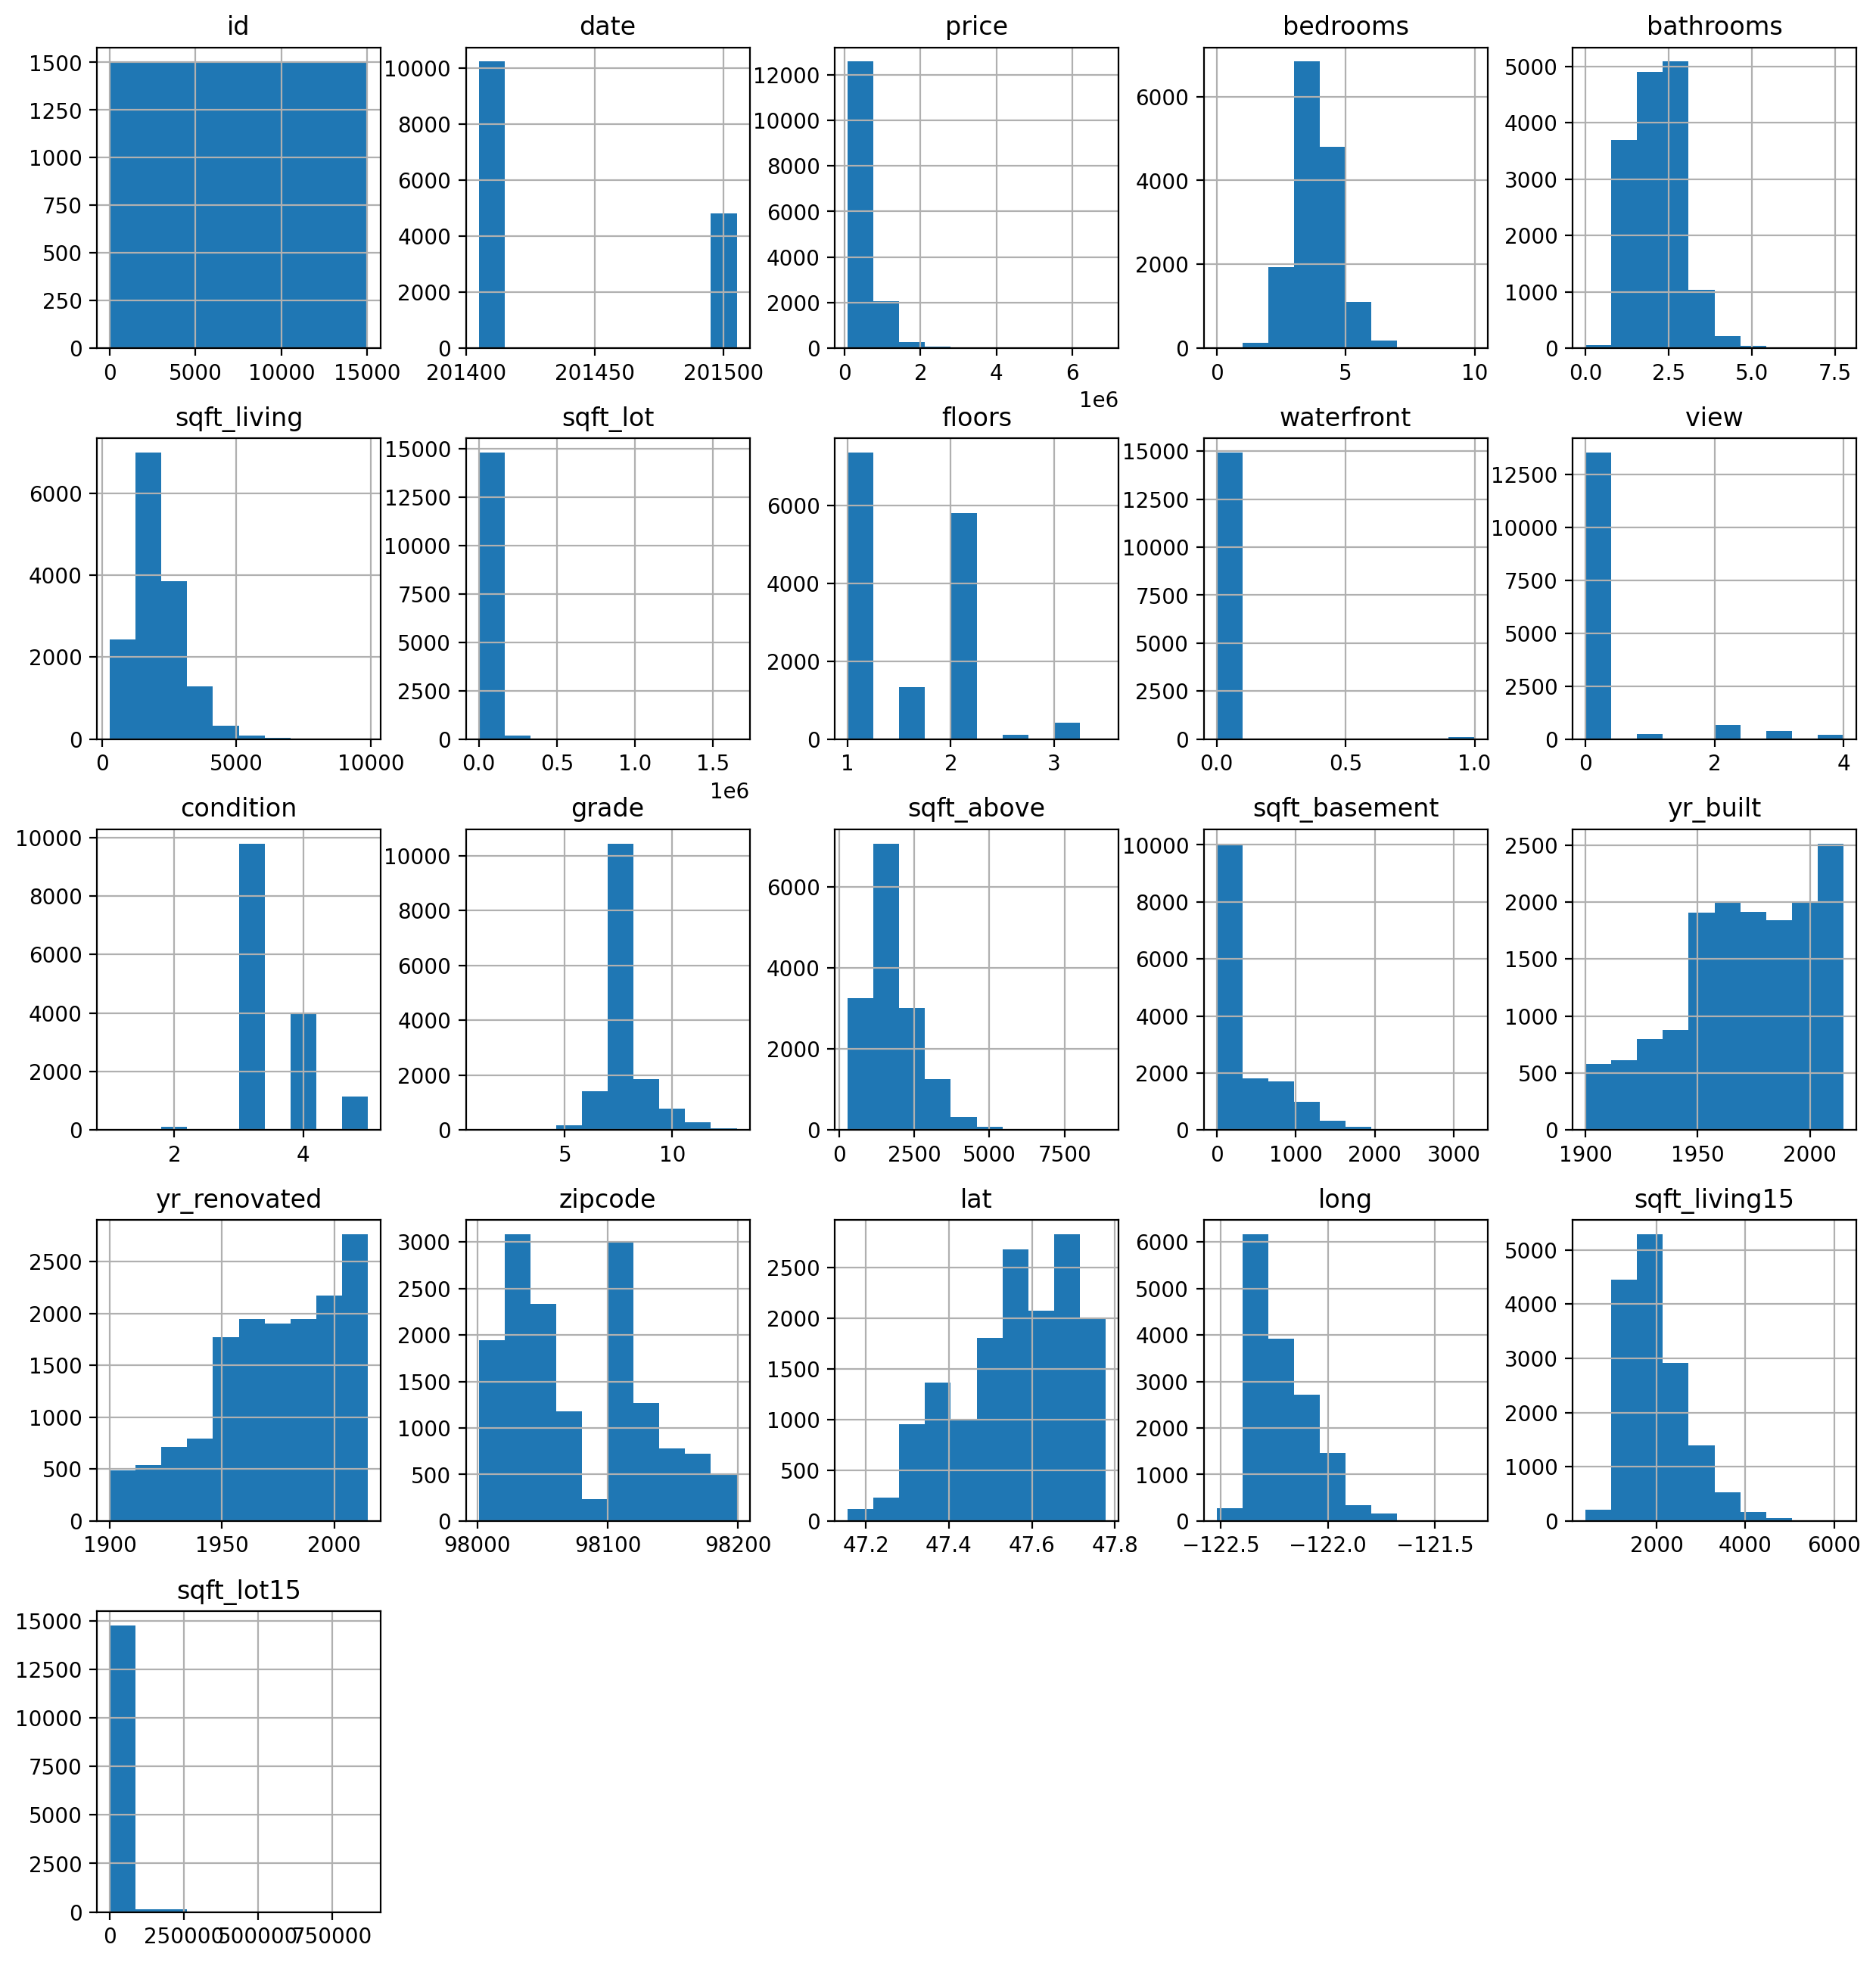

In [ ]:
import matplotlib.pyplot as plt
train.hist(bins=10, figsize=(15,16))
plt.show()

In [ ]:
import seaborn as sns
sns.pairplot(train)

Output hidden; open in https://colab.research.google.com to view.

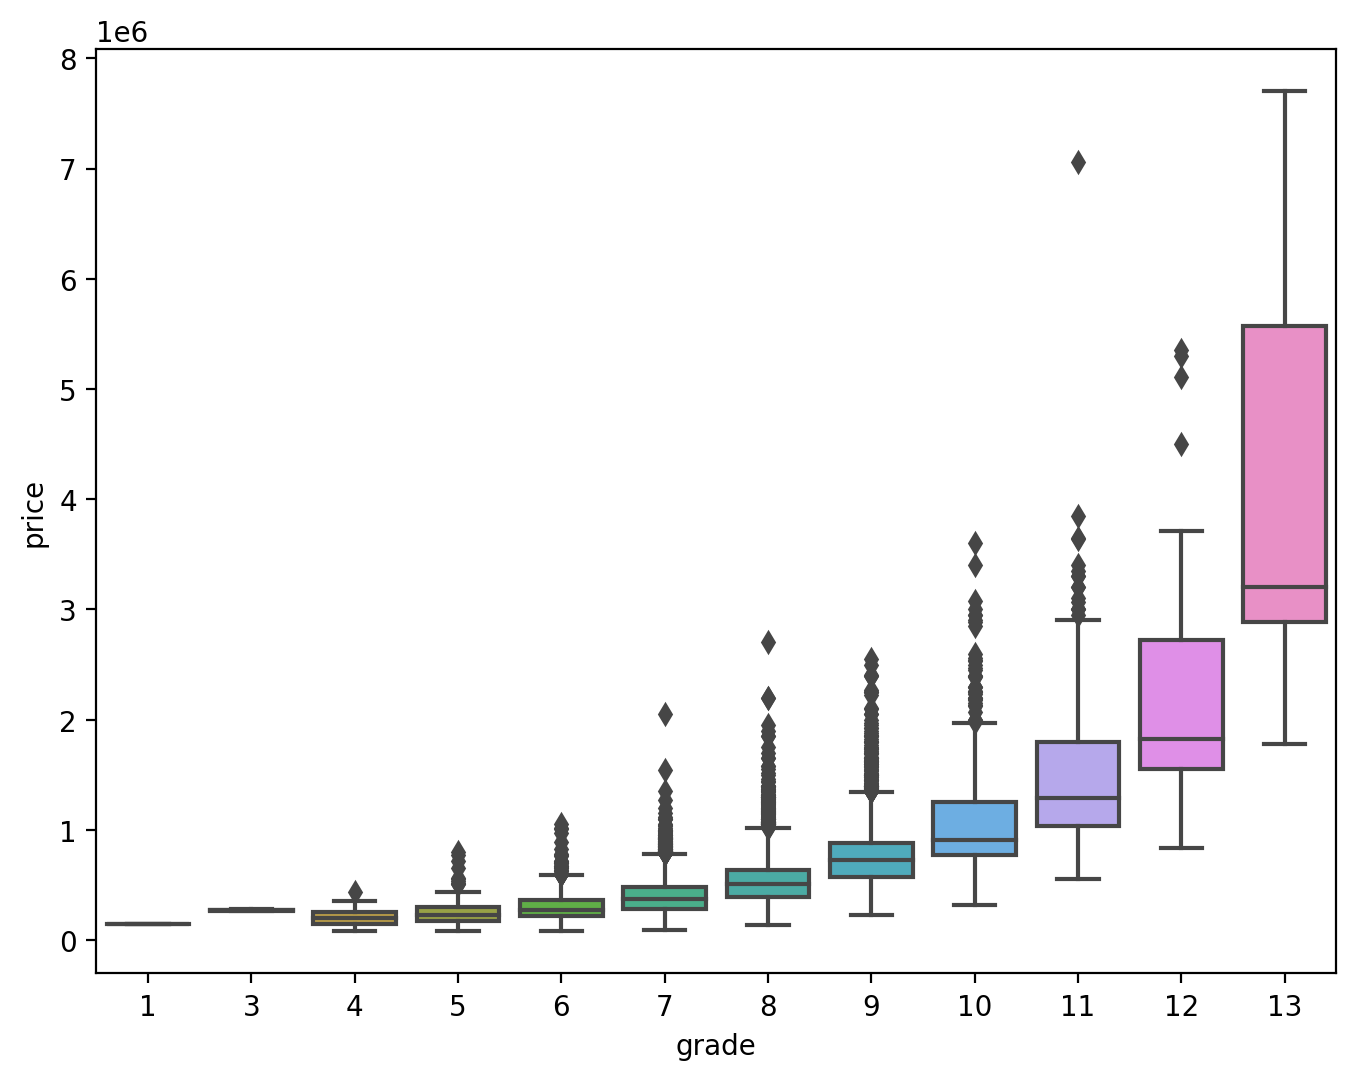

In [ ]:
#상관계수가 높은 데이터 중에 범주형 데이터인 grade(0.67)와 price의 관계
data = pd.concat([train['price'], train['grade']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='grade', y="price", data=data)

- grade에 따라 가격이 상승
- grade가 11인 경우 grade 13의 가격보다 더 높은 것이 있다.  
- grade 3은 4보다 가격이 높음. => 이상치

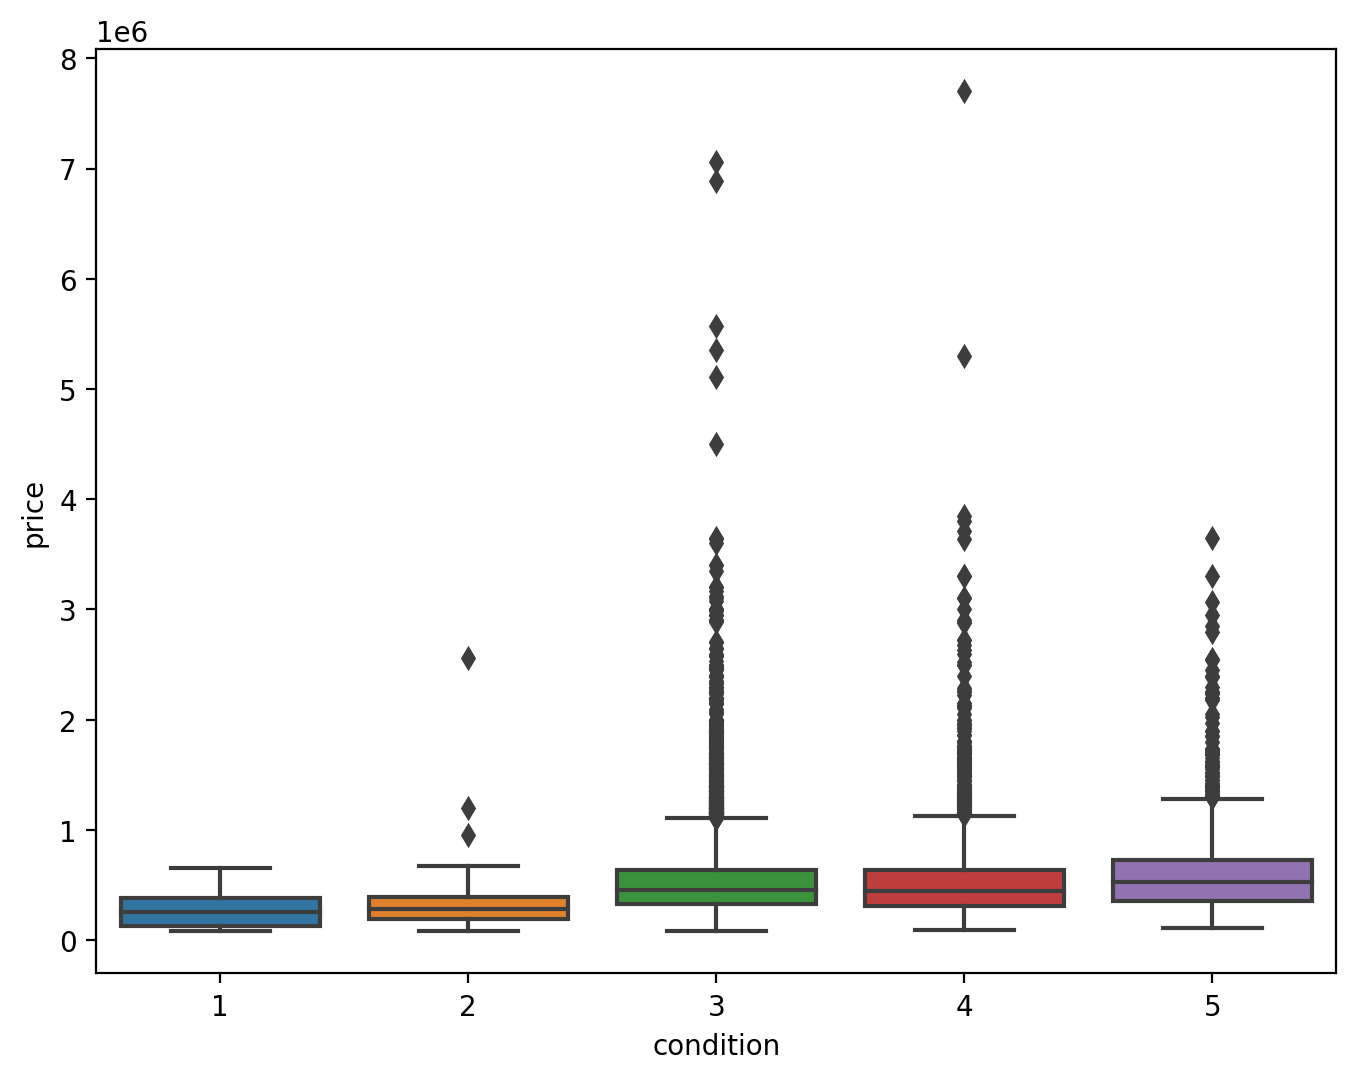

In [ ]:
#범주형 데이터인 condition price의 관계
data = pd.concat([train['price'], train['condition']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='condition', y="price", data=data)

- 컨디션을 좋을 수록 가격이 높아지는 데 컨디션 4의 높은 가격은 또 튀네.

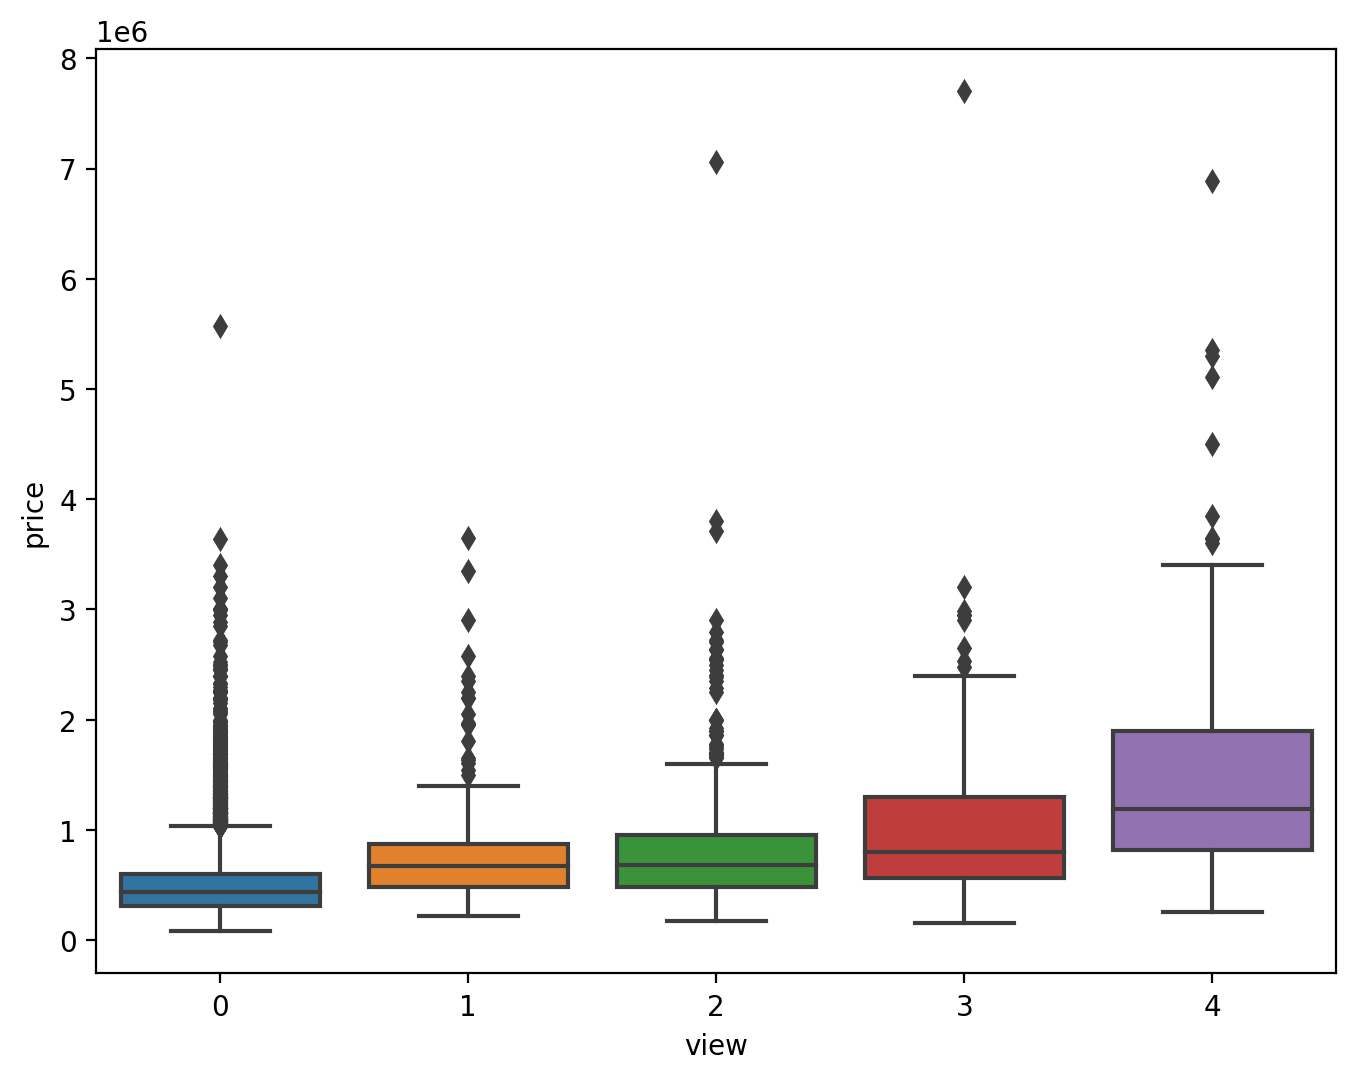

In [ ]:
#범주형 데이터인 view price의 관계
data = pd.concat([train['price'], train['view']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='view', y="price", data=data)

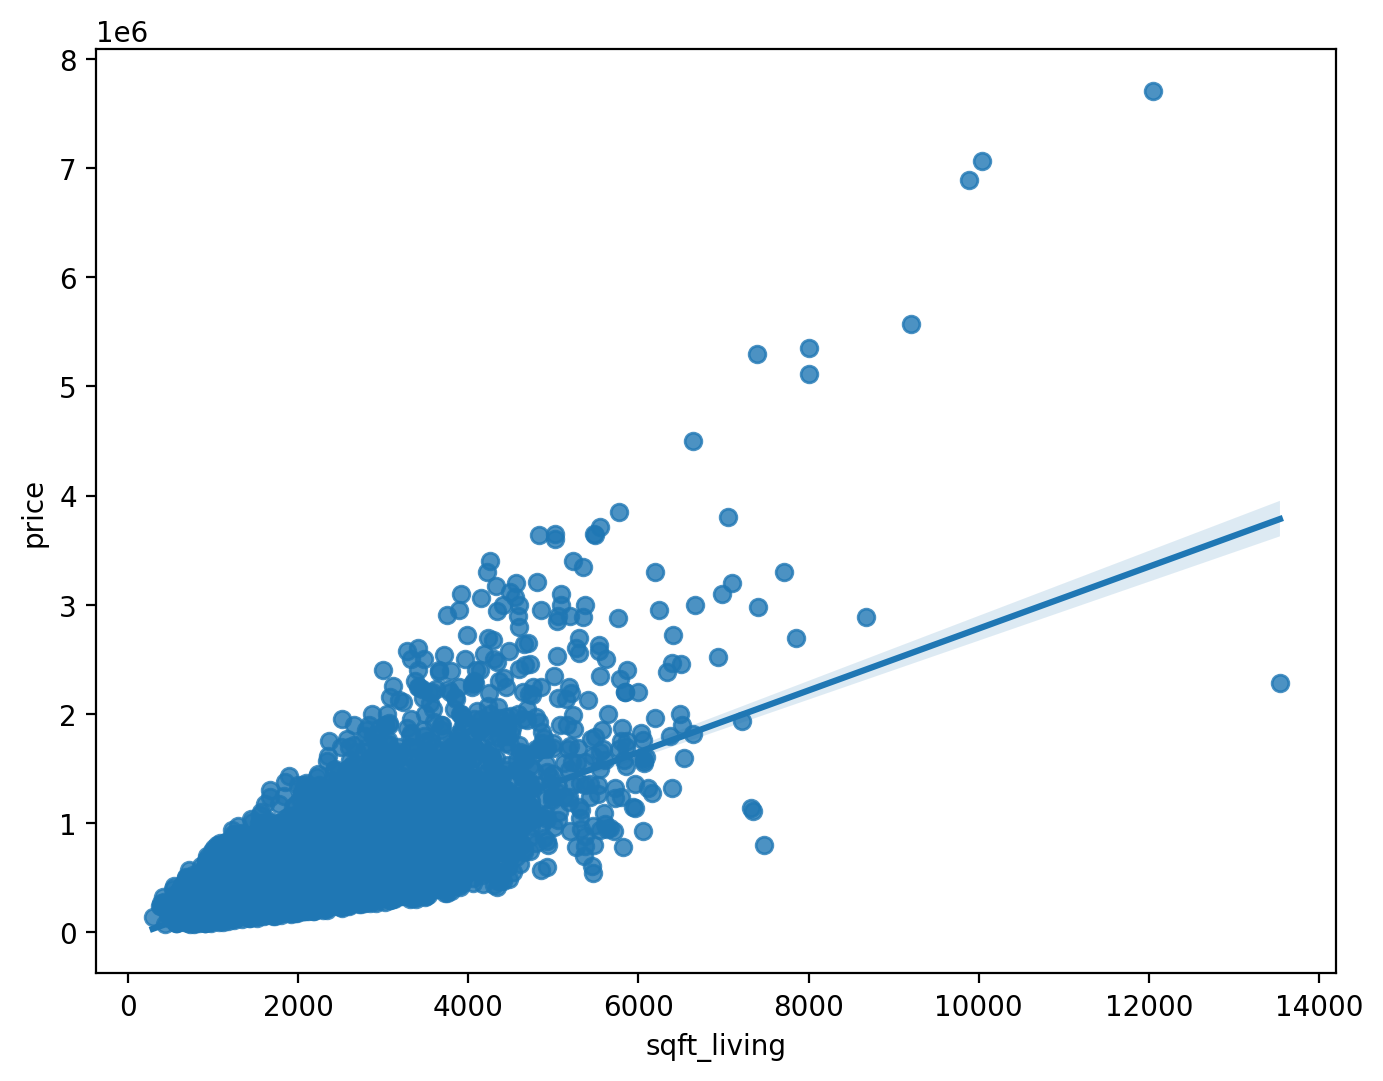

In [ ]:
##상관계수가 높은 데이터 중에 sqft_living(0.7)와 price의 관계
data = pd.concat([train['price'], train['sqft_living']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.regplot(x='sqft_living', y="price", data=data)

- 넓은 쪽의 집이 이상치? 가격도 가장 높고.. 또 보통도 있고... 

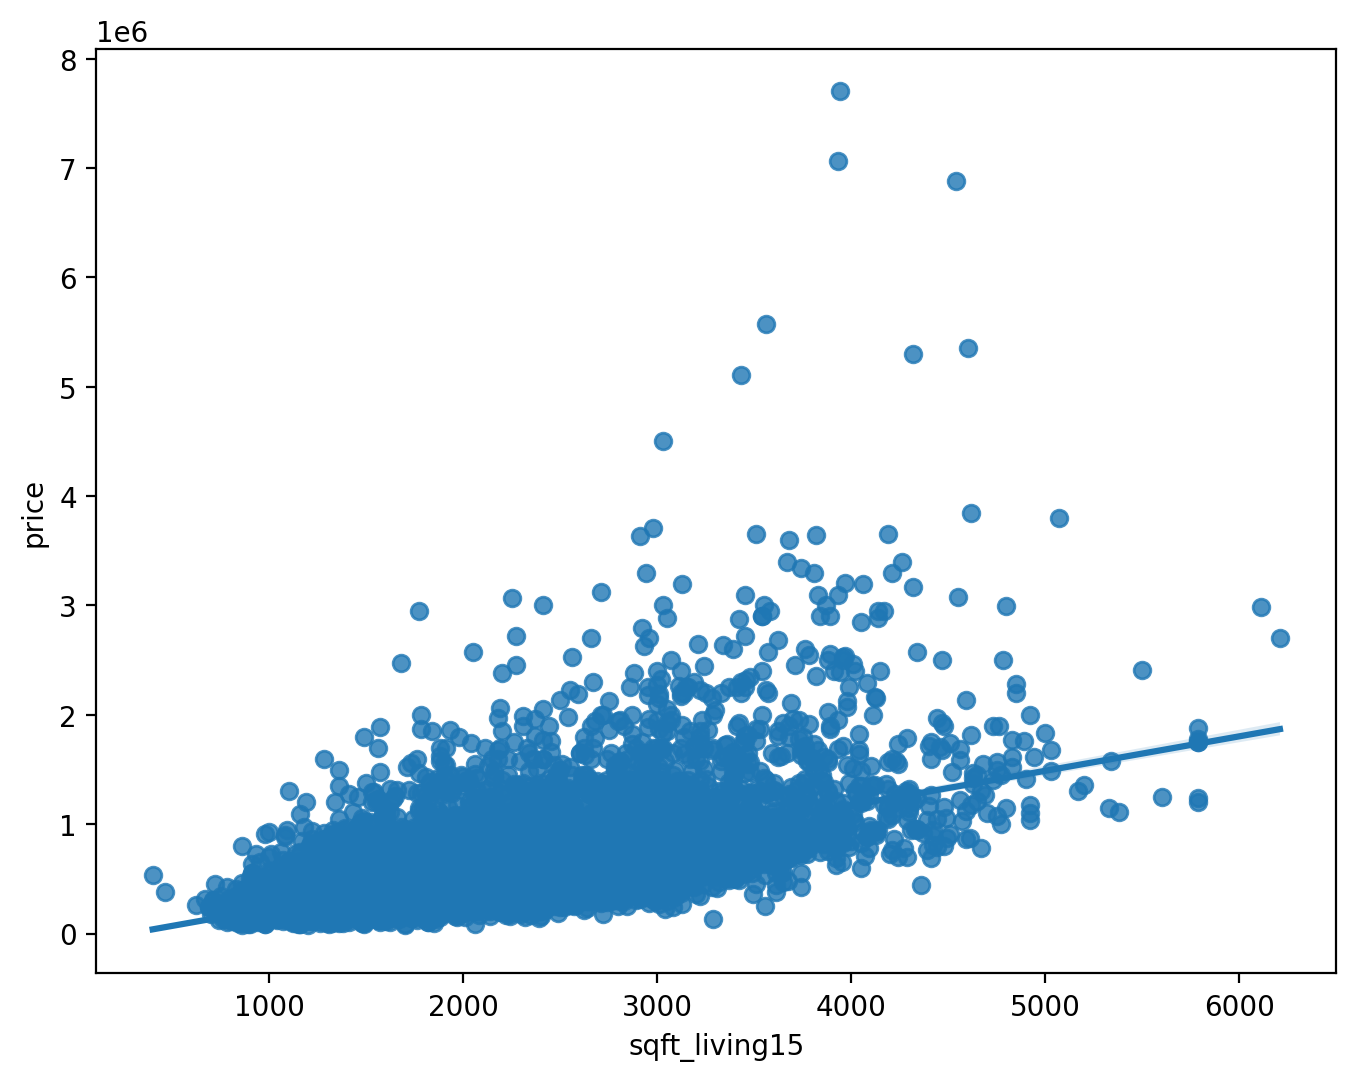

In [ ]:
#상관계수가 높은 데이터 중에 sqft_living15(0.59)와 price의 관계
data = pd.concat([train['price'], train['sqft_living15']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.regplot(x='sqft_living15', y="price", data=data)

- sqft_living15 4000 근처에 높은 가격의 집이 있음. 이상치 ? 
    - 2015년 이전의 기준으로는 sqft_living이 12000근처인 집임. => 기준이 바뀌면서 면적이 줄어듬. 
    - grade 11의 보편적인 값에서 벗어난 집임. 
    - 무언가 장점이 있는 집인가 봄. 
    </br>

- sqft_living에 비해 면적과 가격의 분포가 적당이 되어 있는 듯 ..

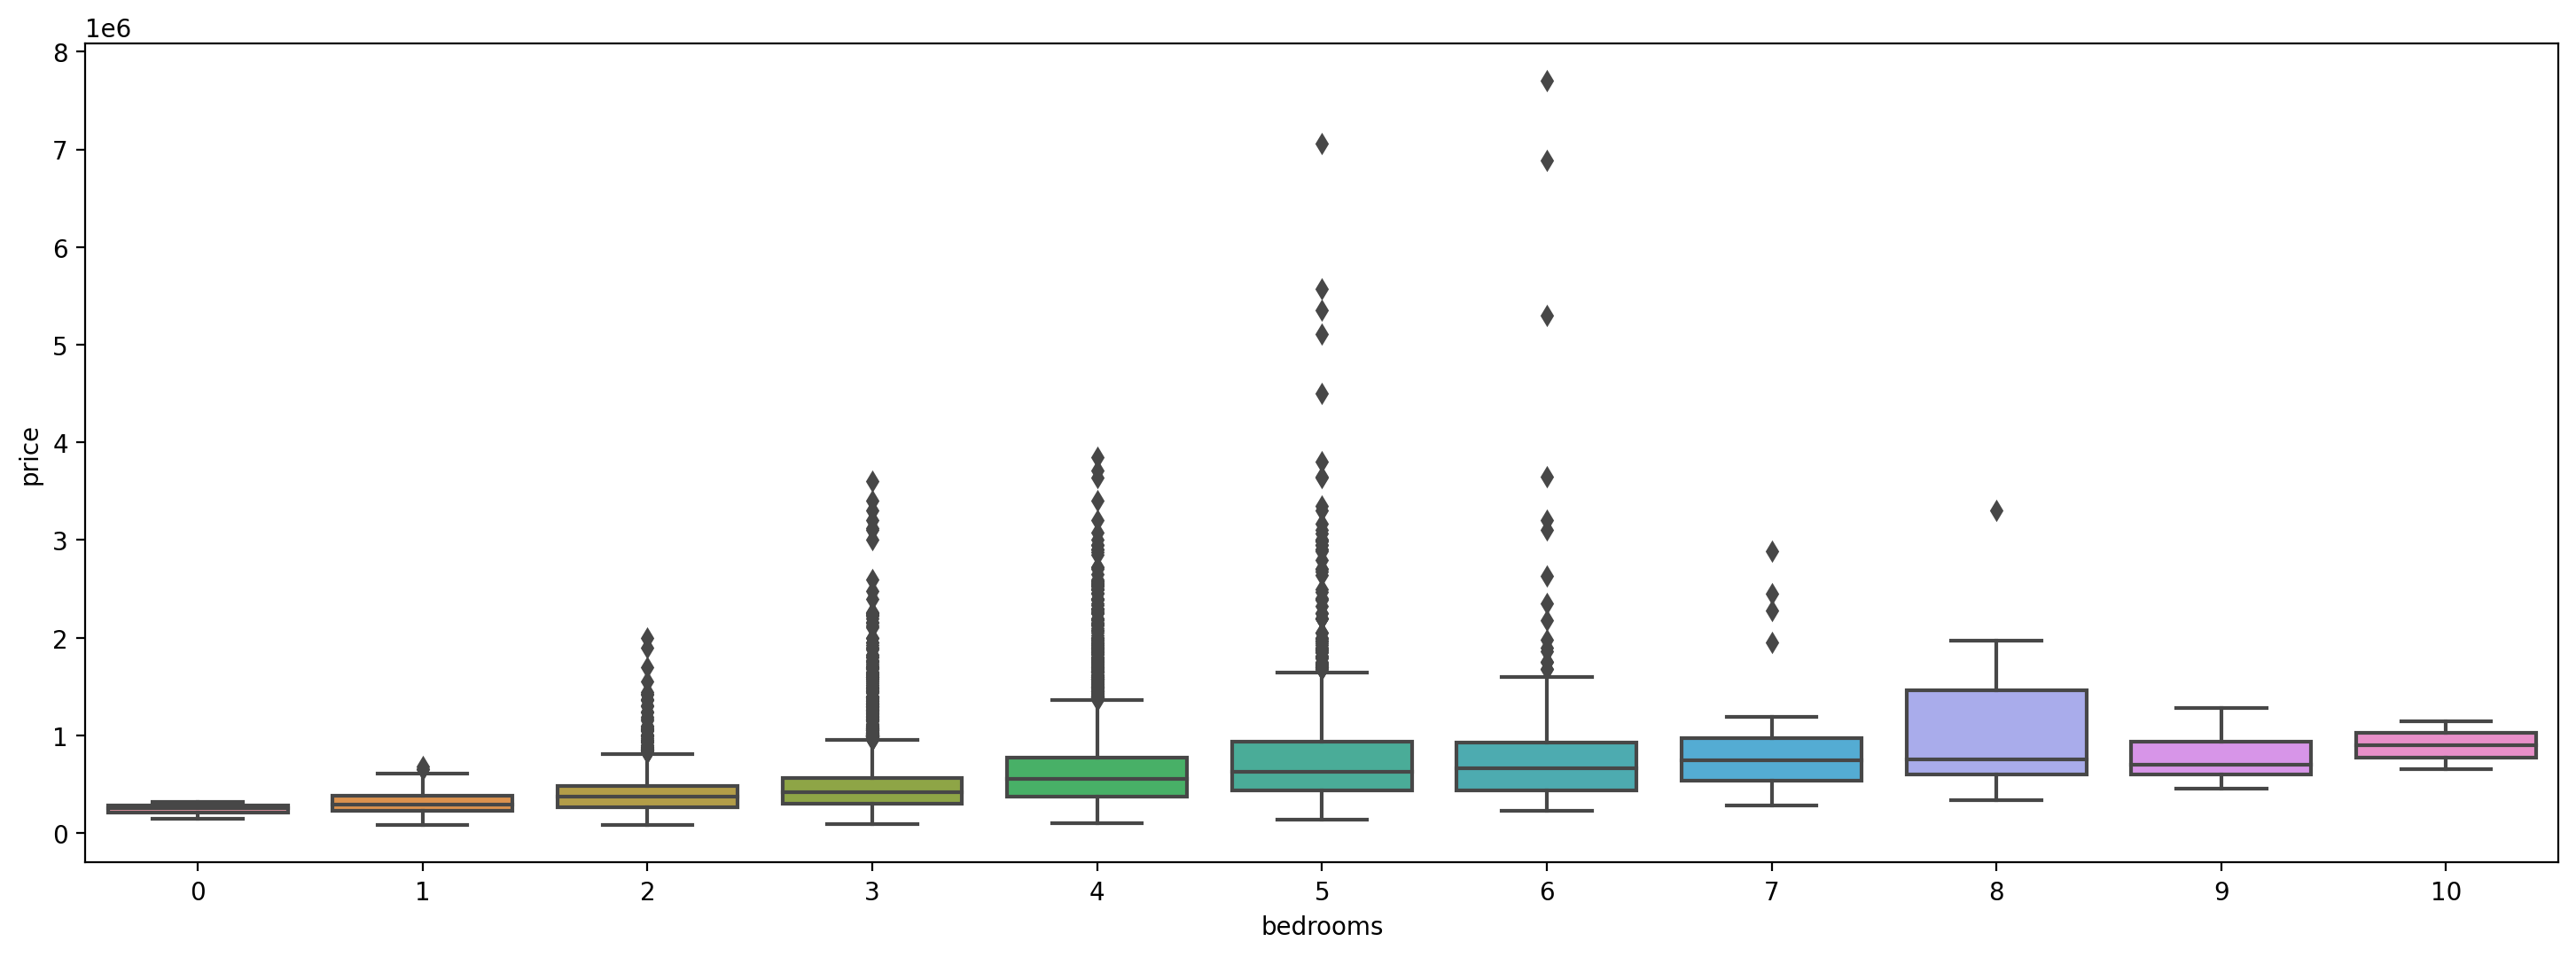

In [ ]:
#상관계수가 0.32
data = pd.concat([train['price'], train['bedrooms']], axis=1)
f, ax = plt.subplots(figsize=(18, 6))
fig = sns.boxplot(x='bedrooms', y="price", data=data)

- 방 개수가 6인 집이 좋은 집이 많네

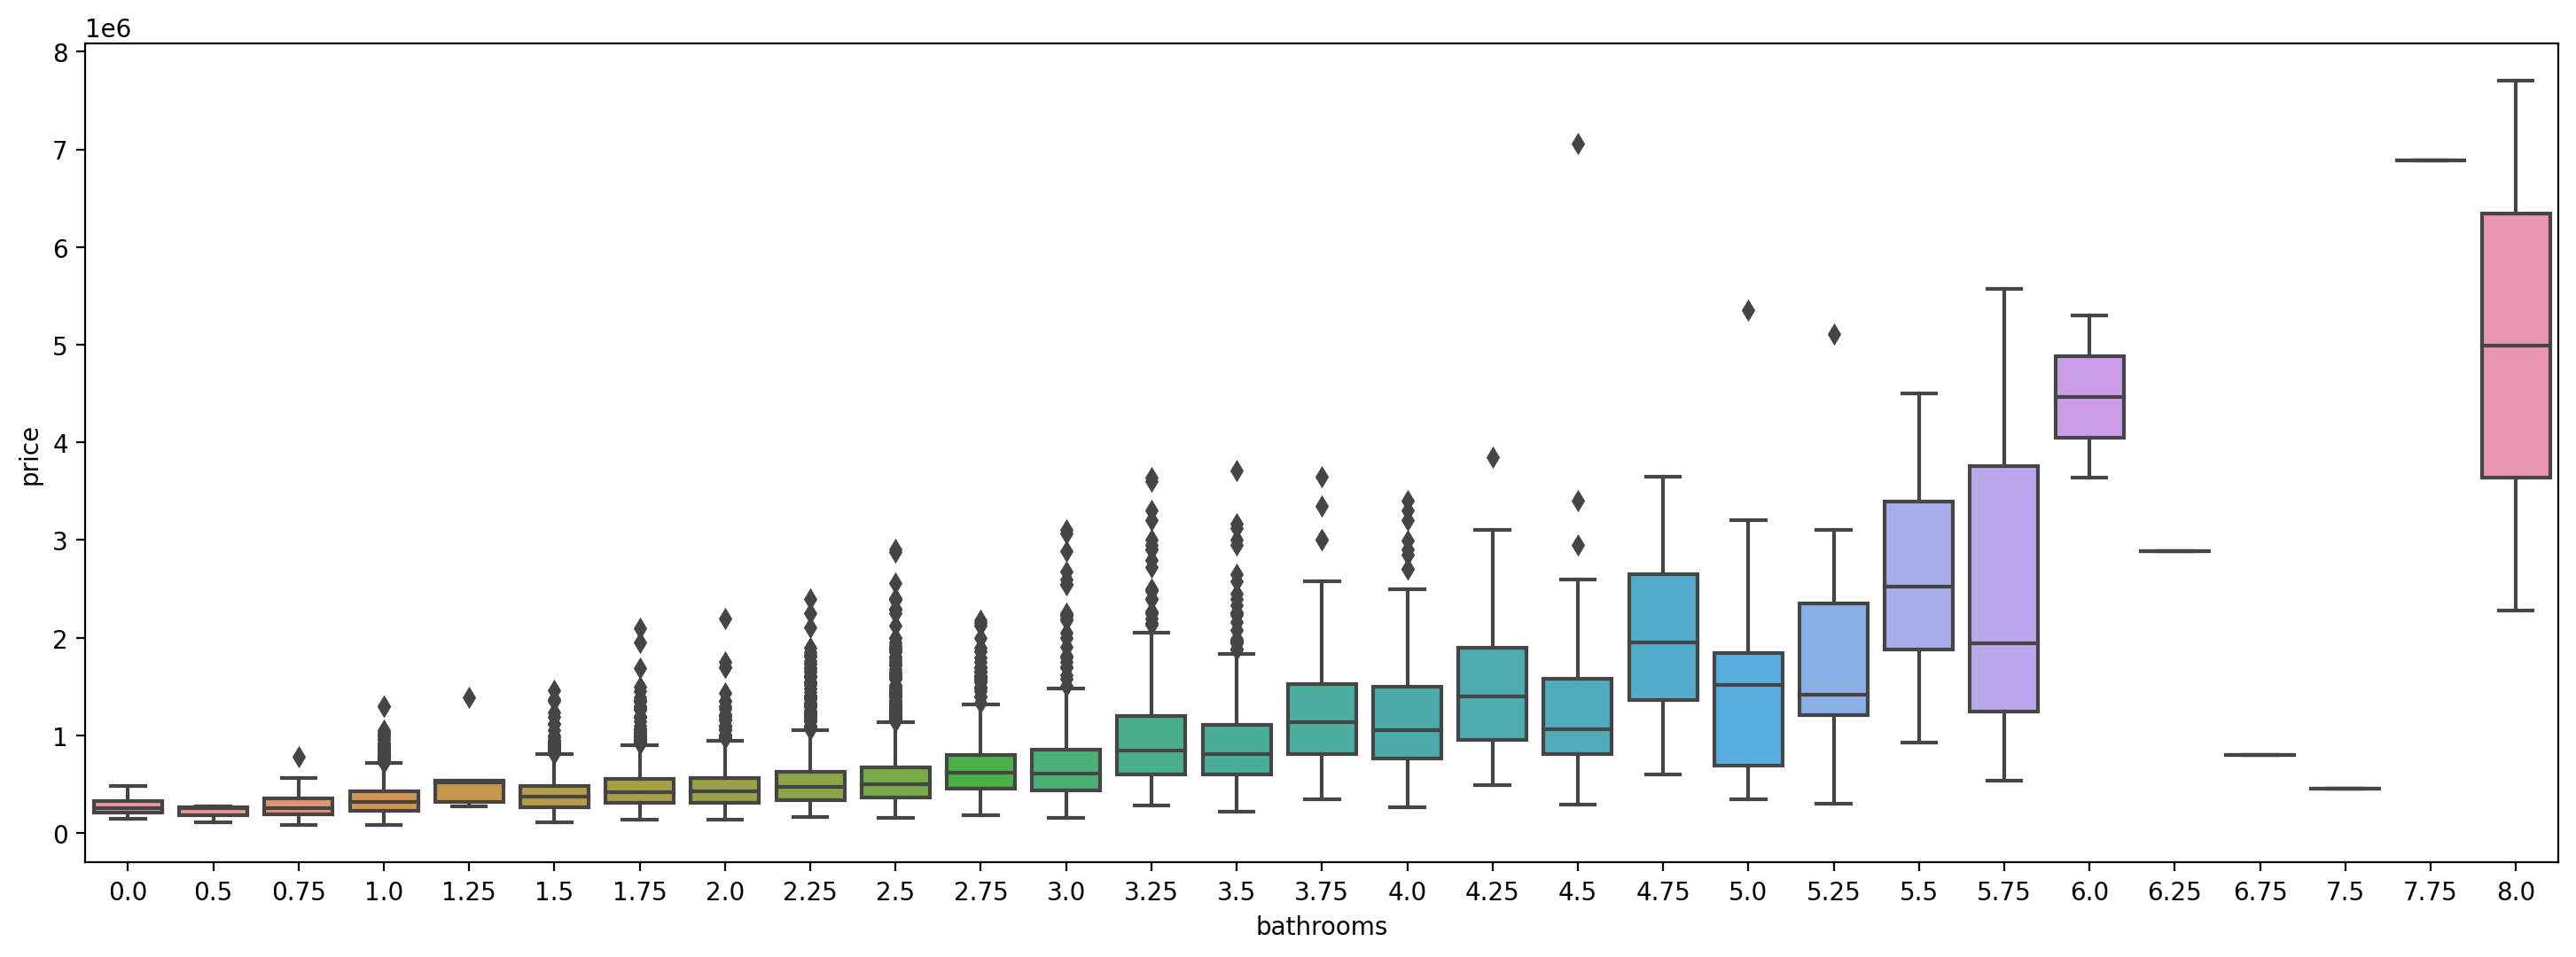

In [ ]:
#상관계수가 0.53
data = pd.concat([train['price'], train['bathrooms']], axis=1)
f, ax = plt.subplots(figsize=(18, 6))
fig = sns.boxplot(x='bathrooms', y="price", data=data)

- 방 6개에 화장실 8개 있는 집이 높은 가격으로 평가되고 있는데 
- 4.5개화장실의 최대 가격의 집이 있네.. => 이것도 이상치라는 데 추가 자료임. 

In [ ]:
# 위치에 주택의 개수를 표시함. 

import folium # for map visualization
from folium import plugins

houses_map = folium.Map(location = [train['lat'].mean(), train['long'].mean()], zoom_start = 10)
lat_long_data = train[['lat', 'long']].values.tolist()   
h_cluster = folium.plugins.FastMarkerCluster(lat_long_data).add_to(houses_map)

houses_map
#https://www.kaggle.com/code/fulrose/eda-with-map-visualization?scriptVersionId=12681748

##b. Check & Impute Missing Value

<Axes: >

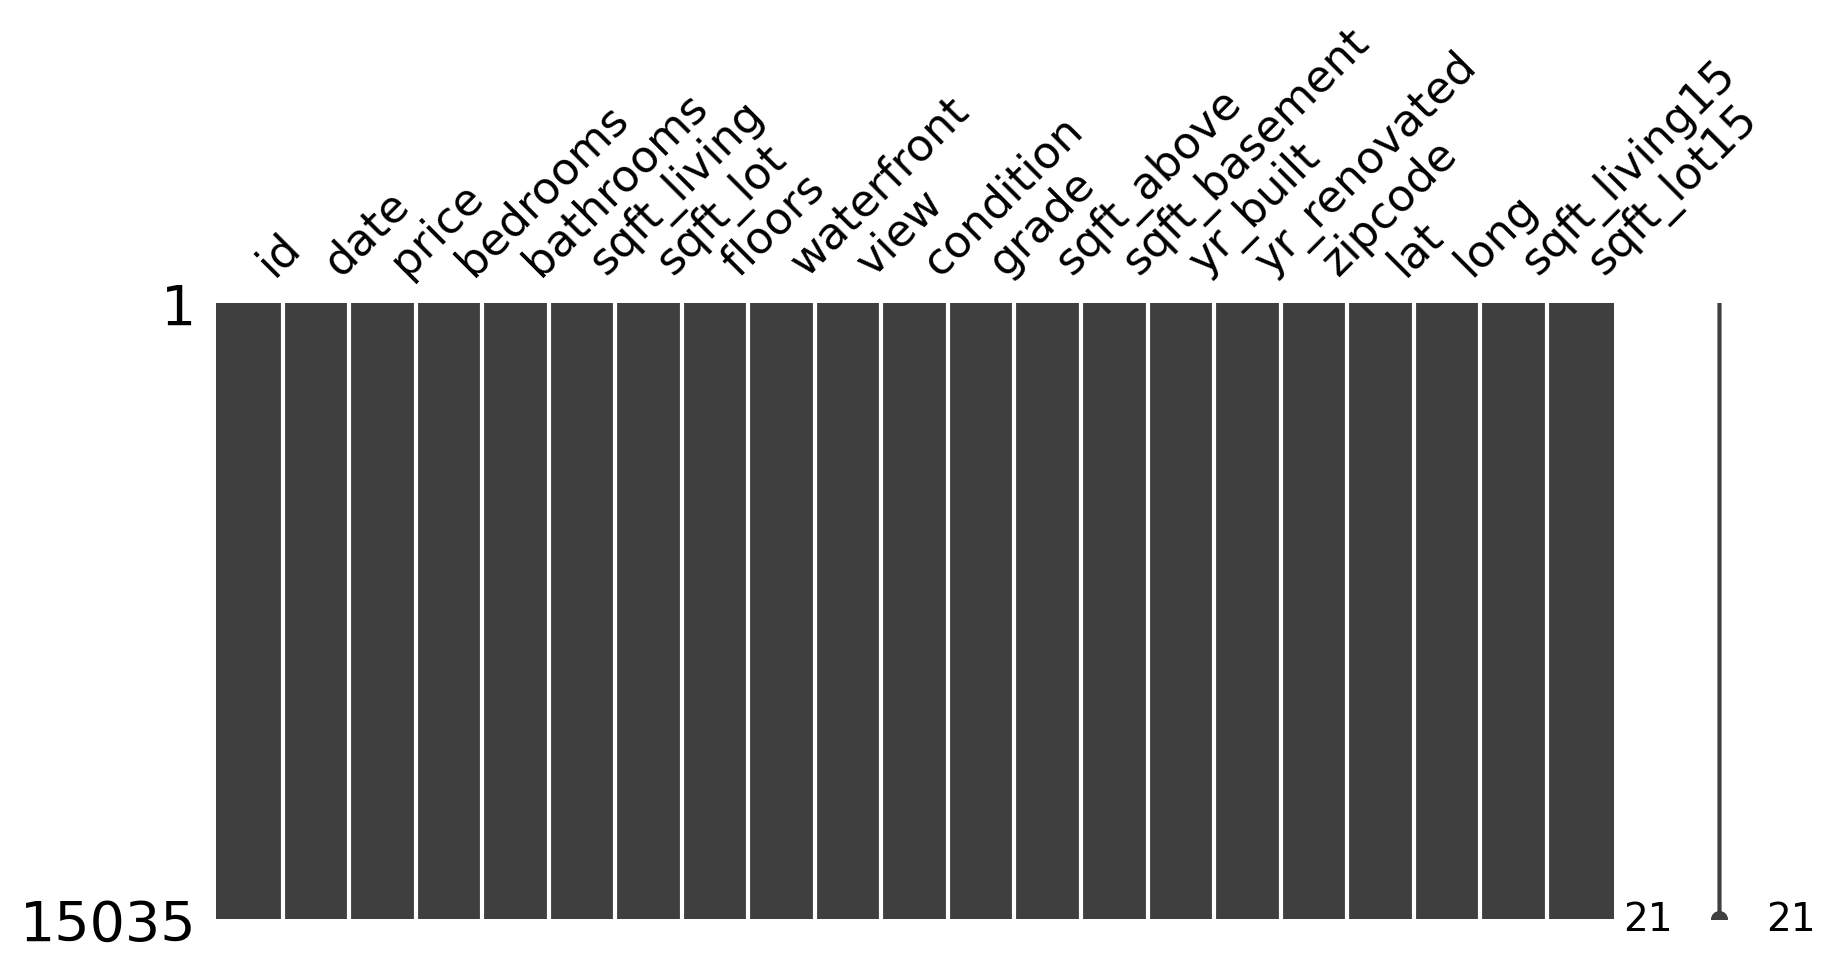

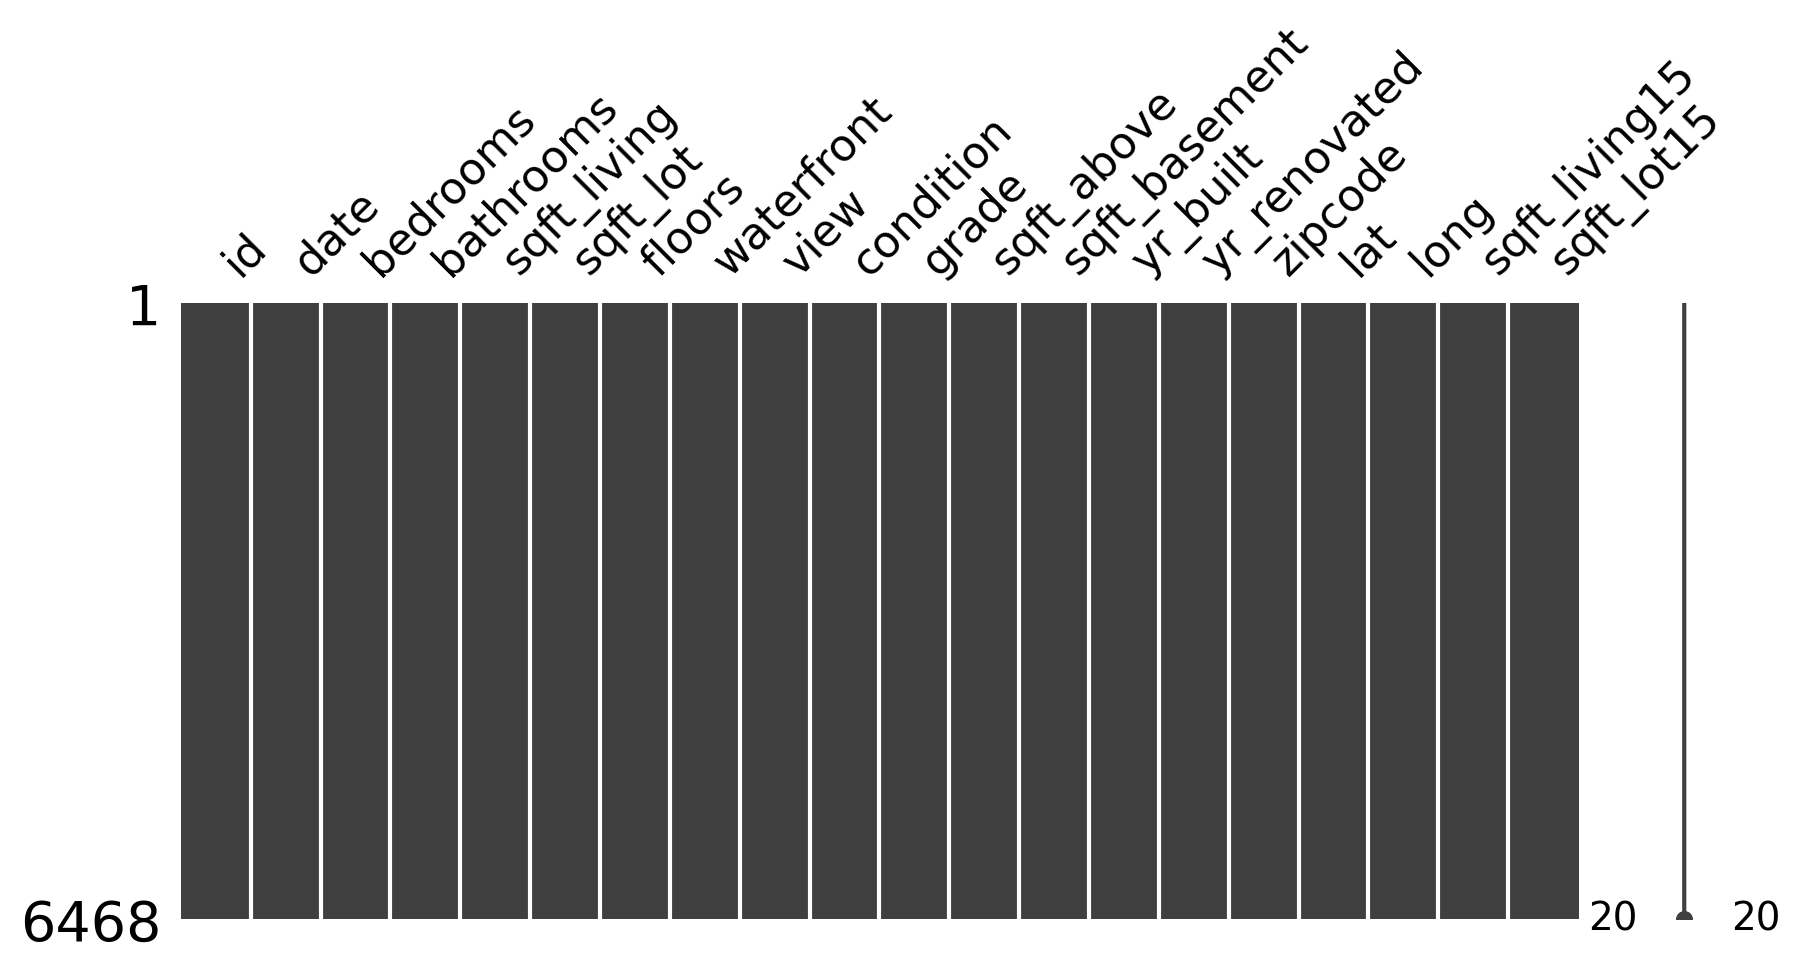

In [531]:
#변수 결측치 유무 확인

msno.matrix(train, figsize=(10,4))
msno.matrix(test, figsize=(10,4))

- 모든 feature에 대해 결측치가 없음.

In [532]:
train.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [533]:
test.isnull().sum()

id               0
date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

결측치는 없음.

In [534]:
# 1. id 컬럼이 결측치인지 확인합니다.
null_check = pd.isnull(train['id'])
print(null_check)

0        False
1        False
2        False
3        False
4        False
         ...  
15030    False
15031    False
15032    False
15033    False
15034    False
Name: id, Length: 15035, dtype: bool


In [535]:
# 2. 결측치인 데이터만 뽑아냅니다.
null_data = train.loc[null_check, 'id']
null_data.head()

Series([], Name: id, dtype: int64)

In [536]:
# 3. 결측치인 데이터의 개수를 셉니다.
print(f'id: {len(null_data.values)}')

id: 0


In [537]:
# 한 번에 뿅!
# 추가 : 위에 실행했던 코드는 f-string으로 작동하지만 해당 코드는 대괄호가 2개가 있어 f-string으로 표현하면 에러가 발생합니다. 이럴 경우 format으로 실행합니다.
# 추가에 대한 내용 : https://blockdmask.tistory.com/429
print('{} : {}'.format('id', len(train.loc[pd.isnull(train['id']), 'id'].values)))

id : 0


In [538]:
#전체 column의 결측 확인
for c in train.columns:
    print('{} : {}'.format(c, len(train.loc[pd.isnull(train[c]), c].values)))

id : 0
date : 0
price : 0
bedrooms : 0
bathrooms : 0
sqft_living : 0
sqft_lot : 0
floors : 0
waterfront : 0
view : 0
condition : 0
grade : 0
sqft_above : 0
sqft_basement : 0
yr_built : 0
yr_renovated : 0
zipcode : 0
lat : 0
long : 0
sqft_living15 : 0
sqft_lot15 : 0


In [539]:
for c in test.columns:
    print('{} : {}'.format(c, len(test.loc[pd.isnull(train[c]), c].values)))

id : 0
date : 0
bedrooms : 0
bathrooms : 0
sqft_living : 0
sqft_lot : 0
floors : 0
waterfront : 0
view : 0
condition : 0
grade : 0
sqft_above : 0
sqft_basement : 0
yr_built : 0
yr_renovated : 0
zipcode : 0
lat : 0
long : 0
sqft_living15 : 0
sqft_lot15 : 0


- 결측치는 없음. 

##c. Check Outlier
- grade 3
- sqft_living > 12000
- price > 7000000  
=> 총 5개의 행을 지움.


In [540]:
train.loc[train['grade'] == 3]

id    date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
2302  2302  201502  262000.0         1       0.75          520     12981   
4123  4123  201411  280000.0         1       0.00          600     24501   

      floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
2302     1.0           0     0  ...      3         520              0   
4123     1.0           0     0  ...      3         600              0   

      yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
2302      1920        1920.0    98022  47.2082 -121.995           1340   
4123      1950        1950.0    98045  47.5316 -121.749            990   

      sqft_lot15  
2302       12233  
4123       22549  

[2 rows x 21 columns]

In [541]:
train.loc[train['sqft_living'] > 12000]

id    date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
5108  5108  201410  7700000.0         6        8.0        12050     27600   
8912  8912  201405  2280000.0         7        8.0        13540    307752   

      floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
5108     2.5           0     3  ...     13        8570           3480   
8912     3.0           0     4  ...     12        9410           4130   

      yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
5108      1910        1987.0    98102  47.6298 -122.323           3940   
8912      1999        1999.0    98053  47.6675 -121.986           4850   

      sqft_lot15  
5108        8800  
8912      217800  

[2 rows x 21 columns]

In [542]:
train.loc[train['price'] > 7000000]

id    date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
2775  2775  201406  7062500.0         5        4.5        10040     37325   
5108  5108  201410  7700000.0         6        8.0        12050     27600   

      floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
2775     2.0           1     2  ...     11        7680           2360   
5108     2.5           0     3  ...     13        8570           3480   

      yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
2775      1940        2001.0    98004  47.6500 -122.214           3930   
5108      1910        1987.0    98102  47.6298 -122.323           3940   

      sqft_lot15  
2775       25449  
5108        8800  

[2 rows x 21 columns]

In [543]:
#중복된 값 1개를 포함하여 5개을 지우자.
train.drop(train[(train['grade'] == 3)].index, inplace=True)
train.drop(train[(train['sqft_living'] > 12000)].index, inplace=True)
train.drop(train[(train['price'] > 7000000)].index, inplace=True)
train=train.reset_index(drop=True)
train

id    date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0          0  201410   221900.0         3       1.00         1180      5650   
1          1  201502   180000.0         2       1.00          770     10000   
2          2  201502   510000.0         3       2.00         1680      8080   
3          3  201406   257500.0         3       2.25         1715      6819   
4          4  201501   291850.0         3       1.50         1060      9711   
...      ...     ...        ...       ...        ...          ...       ...   
15025  15030  201410   610685.0         4       2.50         2520      6023   
15026  15031  201503  1007500.0         4       3.50         3510      7200   
15027  15032  201405   360000.0         3       2.50         1530      1131   
15028  15033  201502   400000.0         4       2.50         2310      5813   
15029  15034  201410   325000.0         2       0.75         1020      1076   

       floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0         1.0           0     0  ...      7        1180              0   
1         1.0           0     0  ...      6         770              0   
2         1.0           0     0  ...      8        1680              0   
3         2.0           0     0  ...      7        1715              0   
4         1.0           0     0  ...      7        1060              0   
...       ...         ...   ...  ...    ...         ...            ...   
15025     2.0           0     0  ...      9        2520              0   
15026     2.0           0     0  ...      9        2600            910   
15027     3.0           0     0  ...      8        1530              0   
15028     2.0           0     0  ...      8        2310              0   
15029     2.0           0     0  ...      7        1020              0   

       yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0          1955        1955.0    98178  47.5112 -122.257           1340   
1          1933        1933.0    98028  47.7379 -122.233           2720   
2          1987        1987.0    98074  47.6168 -122.045           1800   
3          1995        1995.0    98003  47.3097 -122.327           2238   
4          1963        1963.0    98198  47.4095 -122.315           1650   
...         ...           ...      ...      ...      ...            ...   
15025      2014        2014.0    98056  47.5137 -122.167           2520   
15026      2009        2009.0    98136  47.5537 -122.398           2050   
15027      2009        2009.0    98103  47.6993 -122.346           1530   
15028      2014        2014.0    98146  47.5107 -122.362           1830   
15029      2008        2008.0    98144  47.5941 -122.299           1020   

       sqft_lot15  
0            5650  
1            8062  
2            7503  
3            6819  
4            9711  
...           ...  
15025        6023  
15026        6200  
15027        1509  
15028        7200  
15029        1357  

[15030 rows x 21 columns]

In [544]:
train.shape

(15030, 21)

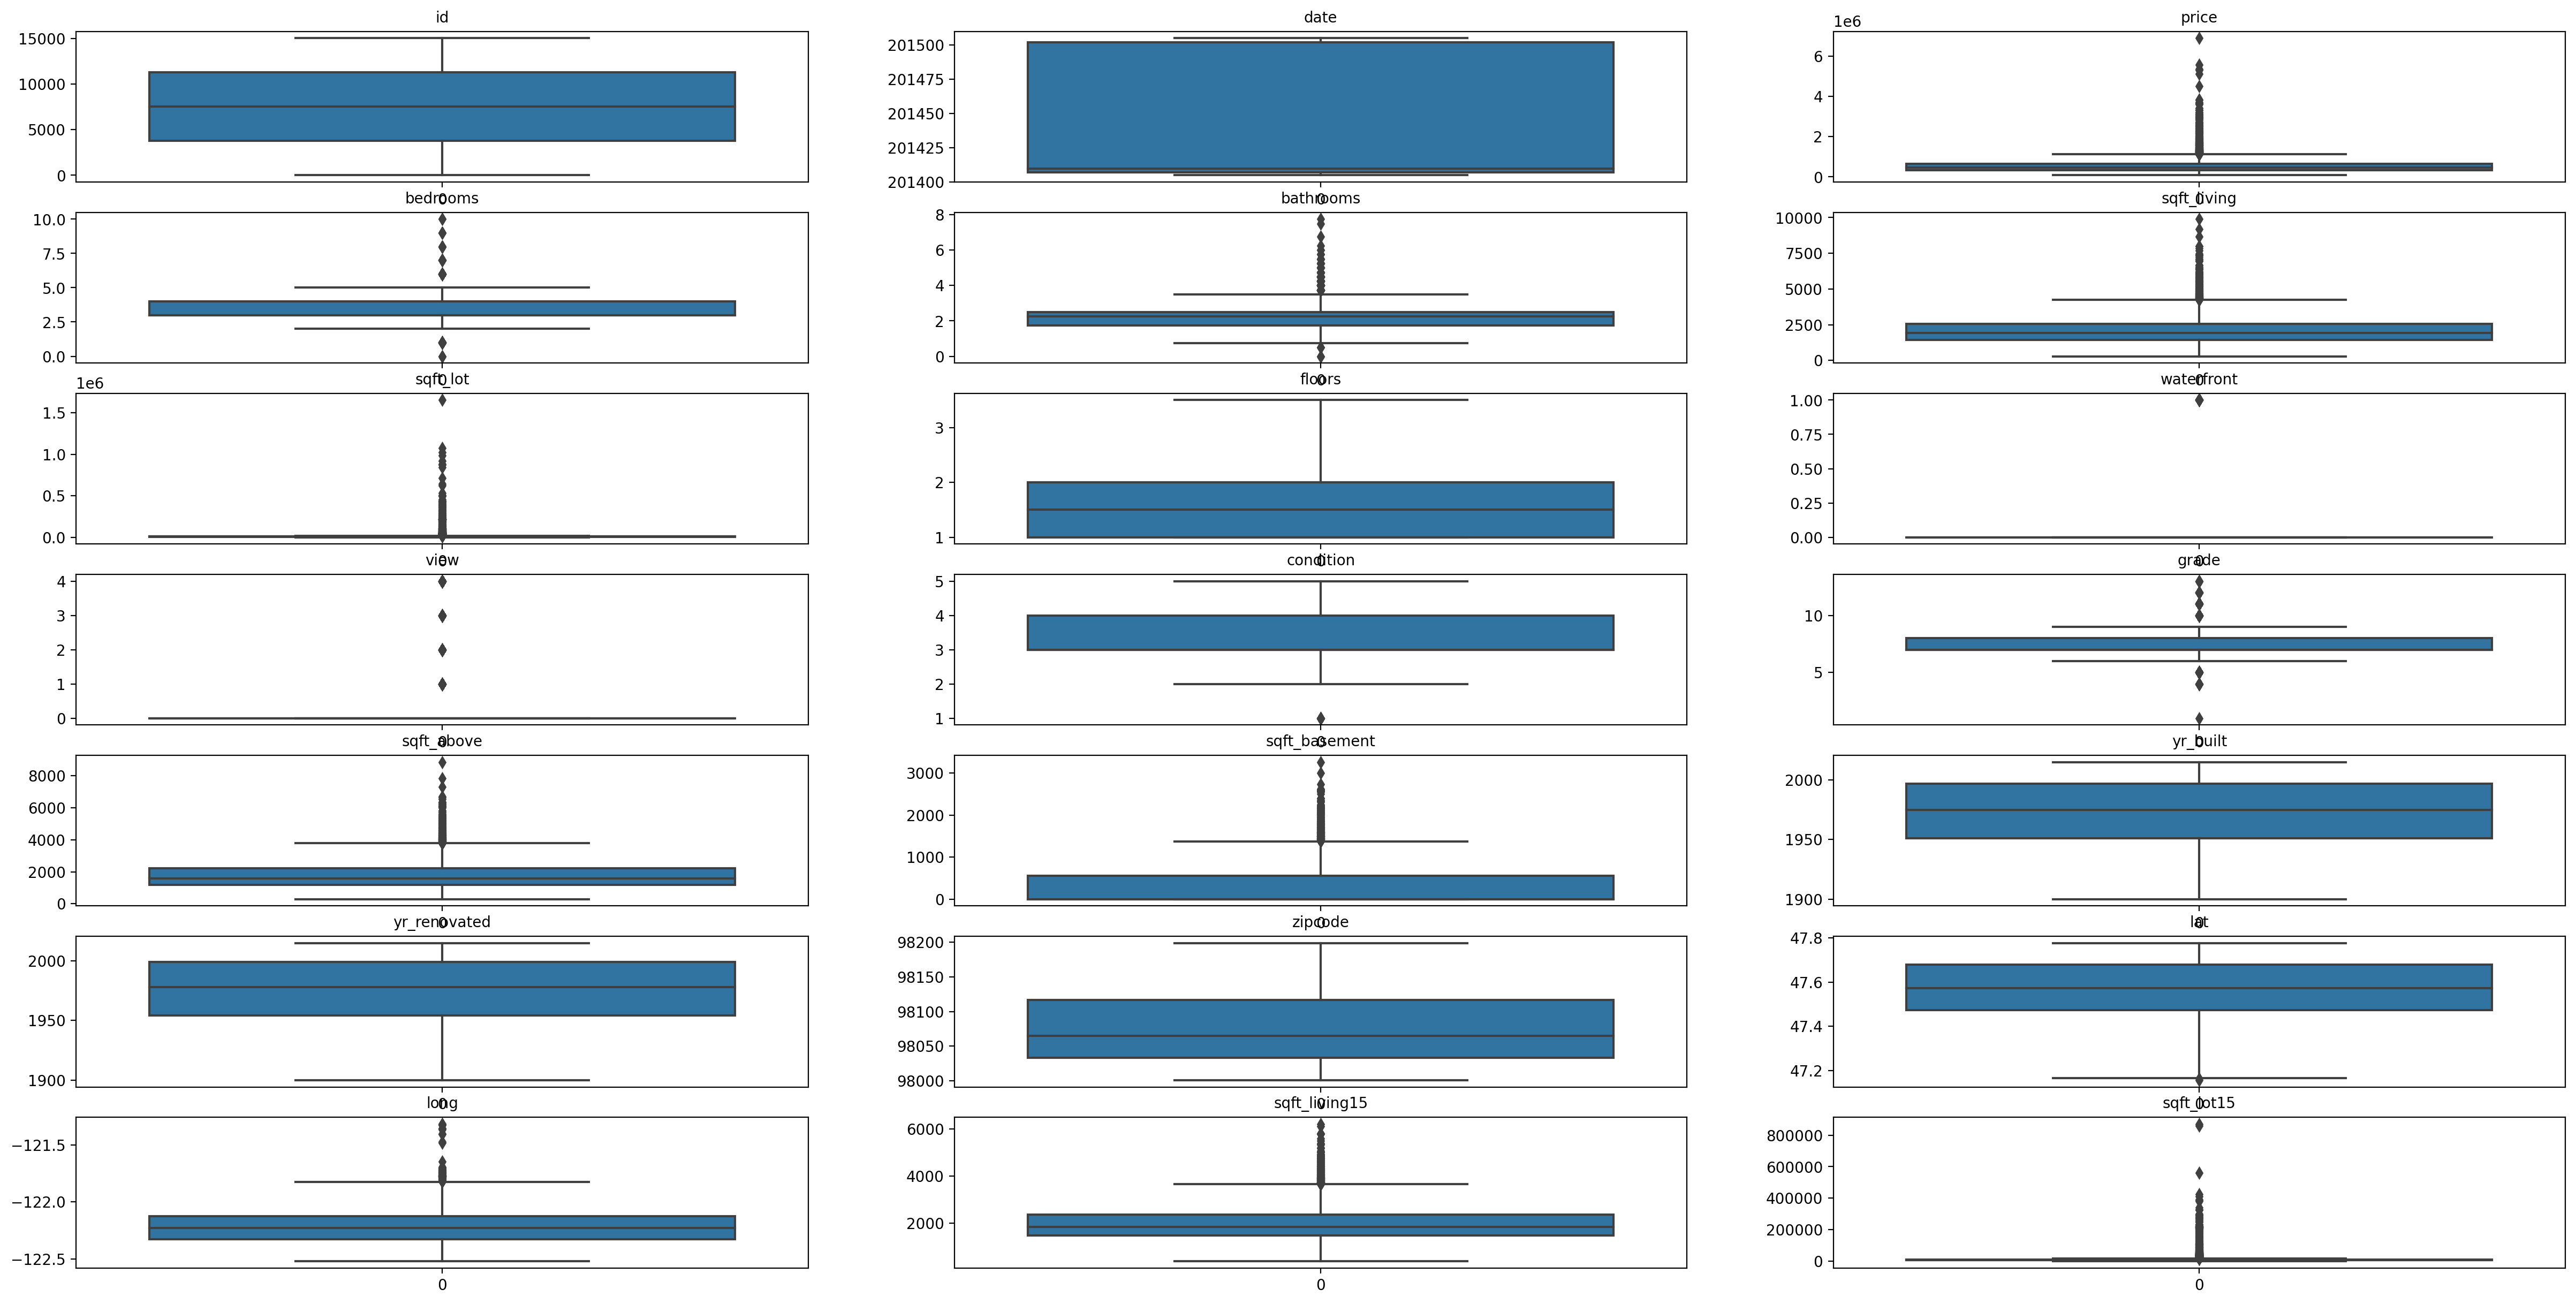

In [545]:
fig, ax = plt.subplots(7,3, figsize=(30, 15))
count =0
columns = train.columns

for k in range(7):
    for j in range(3):
        sns.boxplot(data=train[columns[count]], ax=ax[k][j])
        ax[k][j].set_title(columns[count], fontsize=10)
        # plt.show()
        count +=1
        if count == len(columns) :
            break

##d. Feature Extraction
- 처음에 언급했던 컬럼을 추가해보자. 

    - 최대 집값의 위치와의 거리 => 라이브러리 이용 : 여러가지 고려할 것이 있으니 제일 나중에 하자. 
        - lat과 상관계수가 1이 나옴. 결과적으로 헛짓
    - 화장실 개수 / 방 개수 = bathrooms / bedrooms => 결과적으로 도움이 안되었음 
    - 건평 / 땅 면적 = sqft_living /sqft_lot,  sqft_living15 /sqft_lot15 => 결과적으로 도움이 안되었음.



### bb_ratio
- bathrooms/bedrooms => fail

In [ ]:
# train['bb_ratio'] = train['bathrooms']/train['bedrooms']
# test['bb_ratio'] = test['bathrooms']/test['bedrooms']

### sqft_ratio
- sqft_living /sqft_lot => fail


In [ ]:
# train['sqft_ratio'] = train['sqft_living']/train['sqft_lot']
# test['sqft_ratio'] = test['sqft_living']/test['sqft_lot']

# train['sqft15_ratio'] = train['sqft_living15']/train['sqft_lot15']
# test['sqft15_ratio'] = test['sqft_living15']/test['sqft_lot15']

### distance
- haversine(Seoul, Toronto, unit = 'km') 이런 식으로...
1. price값이 가장 큰 지점의 위 경도 알아내기
2. 각 지점과의 거리 구하기 


#### km
- price가 가장 큰 집과의 거리로 컬럼을 추가하였지만 모델 성능에는 별 도움이 안되었다. 

In [ ]:
#위경도로 거리 구하기
!pip install haversine
from haversine import haversine

KeyError: ignored

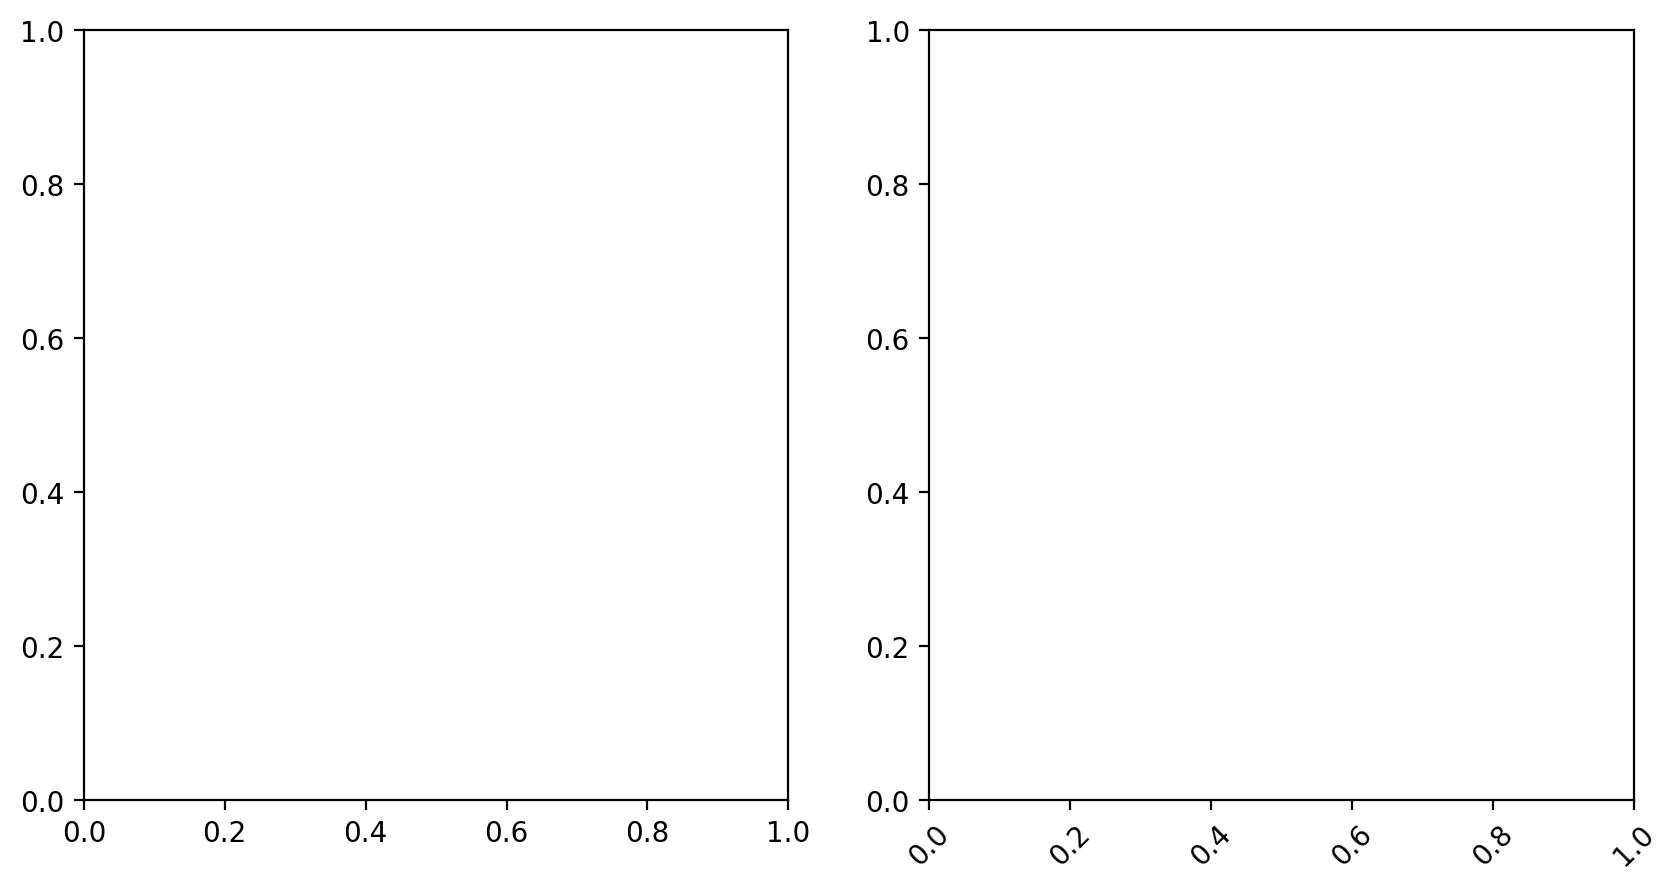

In [ ]:
# train = pd.DataFrame(tra)

fig, ax = plt.subplots(1,2, figsize=(10, 5))   # 가로 스크롤 때문에 그래프 확인이 불편하다면 figsize의 x값을 조절해 보세요. 

# date 변수(count==0인 경우)는 제외하고 분포를 확인합니다.
# count = 1
# columns = train.columns


plt.xticks(rotation=45)
# data = pd.concat([train['price'], train['long']], axis =1)
# x=data.columns[1]
sns.regplot(x=train['long'], y='price', data=train, ax=ax[0])
sns.regplot(x=train['lat'], y='price', data=train, ax=ax[1])
        # sns.regplot(x=x, y='price', data=data, ax=ax[row][col])
plt.show

In [ ]:
max_price = train['price'].max()
print(max_price)

6885000.0


In [ ]:
train['price'].idxmax()

6465

In [ ]:
train.loc[train['price'].idxmax()]

id               6.469000e+03
date             2.014090e+05
price            6.885000e+06
bedrooms         6.000000e+00
bathrooms        7.750000e+00
sqft_living      9.890000e+03
sqft_lot         3.137400e+04
floors           2.000000e+00
waterfront       0.000000e+00
view             4.000000e+00
condition        3.000000e+00
grade            1.300000e+01
sqft_above       8.860000e+03
sqft_basement    1.030000e+03
yr_built         2.001000e+03
yr_renovated     2.001000e+03
zipcode          9.803900e+04
lat              4.763050e+01
long            -1.222400e+02
sqft_living15    4.540000e+03
sqft_lot15       4.273000e+04
Name: 6465, dtype: float64

price가 최대인 지역은  
lat : 47.6305   
long :  -122.24

In [ ]:
# #라이브러리 이용한 건데 안됨 왜 안될까?
# # 위경도 입력
# Seoul = (37.541, 126.986)  #Latitude, Longitude
# Toronto = (43.65, -79.38)

# # 직선 거리 계산
# haversine(Toronto, Seoul, unit = 'km')

In [ ]:
from math import sin, cos, sqrt, atan2

def haversine_distance(lat1, lon1, lat2, lon2):
    R = 6371  # radius of Earth in kilometers

    dlat = lat2 - lat1
    dlon = lon2 - lon1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c

    return distance

In [ ]:
rows1 = len(train)
rows2 = len(test)
lat1 = 42.650
lon1 = -122.214

for i in range(0,rows1,1):
    lat2 = train.loc[i, 'lat']
    lon2 = train.loc[i, 'long']
    train.loc[i, 'distance'] = haversine_distance(lat1, lon1, lat2, lon2)

for i in range(0,rows2,1):
    lat2 = test.loc[i, 'lat']
    lon2 = test.loc[i, 'long']
    test.loc[i, 'distance'] = haversine_distance(lat1, lon1, lat2, lon2)

train

id    date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0          0  201410   221900.0         3       1.00         1180      5650   
1          1  201502   180000.0         2       1.00          770     10000   
2          2  201502   510000.0         3       2.00         1680      8080   
3          3  201406   257500.0         3       2.25         1715      6819   
4          4  201501   291850.0         3       1.50         1060      9711   
...      ...     ...        ...       ...        ...          ...       ...   
15025  15030  201410   610685.0         4       2.50         2520      6023   
15026  15031  201503  1007500.0         4       3.50         3510      7200   
15027  15032  201405   360000.0         3       2.50         1530      1131   
15028  15033  201502   400000.0         4       2.50         2310      5813   
15029  15034  201410   325000.0         2       0.75         1020      1076   

       floors  waterfront  view  ...  sqft_above  sqft_basement  yr_built  \
0         1.0           0     0  ...        1180              0      1955   
1         1.0           0     0  ...         770              0      1933   
2         1.0           0     0  ...        1680              0      1987   
3         2.0           0     0  ...        1715              0      1995   
4         1.0           0     0  ...        1060              0      1963   
...       ...         ...   ...  ...         ...            ...       ...   
15025     2.0           0     0  ...        2520              0      2014   
15026     2.0           0     0  ...        2600            910      2009   
15027     3.0           0     0  ...        1530              0      2009   
15028     2.0           0     0  ...        2310              0      2014   
15029     2.0           0     0  ...        1020              0      2008   

       yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  \
0            1955.0    98178  47.5112 -122.257           1340        5650   
1            1933.0    98028  47.7379 -122.233           2720        8062   
2            1987.0    98074  47.6168 -122.045           1800        7503   
3            1995.0    98003  47.3097 -122.327           2238        6819   
4            1963.0    98198  47.4095 -122.315           1650        9711   
...             ...      ...      ...      ...            ...         ...   
15025        2014.0    98056  47.5137 -122.167           2520        6023   
15026        2009.0    98136  47.5537 -122.398           2050        6200   
15027        2009.0    98103  47.6993 -122.346           1530        1509   
15028        2014.0    98146  47.5107 -122.362           1830        7200   
15029        2008.0    98144  47.5941 -122.299           1020        1357   

           distance  
0       9058.165765  
1       7614.924016  
2       8367.164590  
3      10333.778200  
4       9700.031129  
...             ...  
15025   9041.985690  
15026   8765.167332  
15027   7849.440130  
15028   9047.243674  
15029   8526.334794  

[15030 rows x 22 columns]

#### long
- 세로로 길게 price가 높은 집이 있음. 
- 집값이 가장 높은 long을 기준으로 얼마나 각 집의 long의 차이의 컬럼을 만들자.  
- fail 이것도 도움이 안됨. 

In [495]:
lon1 = -122.214

train['distance'] = abs(train['long'] -lon1)
test['distance'] = abs(test['long'] -lon1)
train

id    date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0          0  201410   221900.0         3       1.00         1180      5650   
1          1  201502   180000.0         2       1.00          770     10000   
2          2  201502   510000.0         3       2.00         1680      8080   
3          3  201406   257500.0         3       2.25         1715      6819   
4          4  201501   291850.0         3       1.50         1060      9711   
...      ...     ...        ...       ...        ...          ...       ...   
15025  15030  201410   610685.0         4       2.50         2520      6023   
15026  15031  201503  1007500.0         4       3.50         3510      7200   
15027  15032  201405   360000.0         3       2.50         1530      1131   
15028  15033  201502   400000.0         4       2.50         2310      5813   
15029  15034  201410   325000.0         2       0.75         1020      1076   

       floors  waterfront  view  ...  sqft_above  sqft_basement  yr_built  \
0         1.0           0     0  ...        1180              0      1955   
1         1.0           0     0  ...         770              0      1933   
2         1.0           0     0  ...        1680              0      1987   
3         2.0           0     0  ...        1715              0      1995   
4         1.0           0     0  ...        1060              0      1963   
...       ...         ...   ...  ...         ...            ...       ...   
15025     2.0           0     0  ...        2520              0      2014   
15026     2.0           0     0  ...        2600            910      2009   
15027     3.0           0     0  ...        1530              0      2009   
15028     2.0           0     0  ...        2310              0      2014   
15029     2.0           0     0  ...        1020              0      2008   

       yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  \
0            1955.0    98178  47.5112 -122.257           1340        5650   
1            1933.0    98028  47.7379 -122.233           2720        8062   
2            1987.0    98074  47.6168 -122.045           1800        7503   
3            1995.0    98003  47.3097 -122.327           2238        6819   
4            1963.0    98198  47.4095 -122.315           1650        9711   
...             ...      ...      ...      ...            ...         ...   
15025        2014.0    98056  47.5137 -122.167           2520        6023   
15026        2009.0    98136  47.5537 -122.398           2050        6200   
15027        2009.0    98103  47.6993 -122.346           1530        1509   
15028        2014.0    98146  47.5107 -122.362           1830        7200   
15029        2008.0    98144  47.5941 -122.299           1020        1357   

       distance  
0         0.043  
1         0.019  
2         0.169  
3         0.113  
4         0.101  
...         ...  
15025     0.047  
15026     0.184  
15027     0.132  
15028     0.148  
15029     0.085  

[15030 rows x 22 columns]

In [184]:
train['distance'].value_counts()

0.086    111
0.090    103
0.158    102
0.087     94
0.161     92
        ... 
0.488      1
0.318      1
0.404      1
0.296      1
0.376      1
Name: distance, Length: 512, dtype: int64

### what?

In [ ]:
# train['sqft_ratio'] = train['sqft_living15']/train['sqft_living']
# test['sqft_ratio'] = test['sqft_living15']/test['sqft_living']

In [547]:
train['renovated'] = train['yr_renovated']-train['yr_built']
test['renovated'] = test['yr_renovated']-test['yr_built']

In [551]:
train

id    date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0          0  201410   221900.0         3       1.00         1180      5650   
1          1  201502   180000.0         2       1.00          770     10000   
2          2  201502   510000.0         3       2.00         1680      8080   
3          3  201406   257500.0         3       2.25         1715      6819   
4          4  201501   291850.0         3       1.50         1060      9711   
...      ...     ...        ...       ...        ...          ...       ...   
15025  15030  201410   610685.0         4       2.50         2520      6023   
15026  15031  201503  1007500.0         4       3.50         3510      7200   
15027  15032  201405   360000.0         3       2.50         1530      1131   
15028  15033  201502   400000.0         4       2.50         2310      5813   
15029  15034  201410   325000.0         2       0.75         1020      1076   

       floors  waterfront  view  ...  sqft_above  sqft_basement  yr_built  \
0         1.0           0     0  ...        1180              0      1955   
1         1.0           0     0  ...         770              0      1933   
2         1.0           0     0  ...        1680              0      1987   
3         2.0           0     0  ...        1715              0      1995   
4         1.0           0     0  ...        1060              0      1963   
...       ...         ...   ...  ...         ...            ...       ...   
15025     2.0           0     0  ...        2520              0      2014   
15026     2.0           0     0  ...        2600            910      2009   
15027     3.0           0     0  ...        1530              0      2009   
15028     2.0           0     0  ...        2310              0      2014   
15029     2.0           0     0  ...        1020              0      2008   

       yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  \
0            1955.0    98178  47.5112 -122.257           1340        5650   
1            1933.0    98028  47.7379 -122.233           2720        8062   
2            1987.0    98074  47.6168 -122.045           1800        7503   
3            1995.0    98003  47.3097 -122.327           2238        6819   
4            1963.0    98198  47.4095 -122.315           1650        9711   
...             ...      ...      ...      ...            ...         ...   
15025        2014.0    98056  47.5137 -122.167           2520        6023   
15026        2009.0    98136  47.5537 -122.398           2050        6200   
15027        2009.0    98103  47.6993 -122.346           1530        1509   
15028        2014.0    98146  47.5107 -122.362           1830        7200   
15029        2008.0    98144  47.5941 -122.299           1020        1357   

       renovated  
0            0.0  
1            0.0  
2            0.0  
3            0.0  
4            0.0  
...          ...  
15025        0.0  
15026        0.0  
15027        0.0  
15028        0.0  
15029        0.0  

[15030 rows x 22 columns]

##e. Delete Columns

In [552]:
y = train['price'] #target 저장장
del train['price']

- id와 price와의 상관계수가 0.02이어서 id 삭제

In [553]:
for df in train, test:
    for i in  'id', 'date':
        del df[i]


#, 'date', 'yr_built', 'yr_renovated', 'sqft_lot15', 'sqft_living15'

print(train.columns)
print(test.columns)

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'renovated'],
      dtype='object')
Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'renovated'],
      dtype='object')


### Multicollinearity
- 변수 선택으로 의존적인 변수 삭제 => 높은 상관관계가 있는 것을 지워도 점수가 좋아지지 않음.
- PCA(priciple component analysis)로 의존적인 성분 삭제
- 정규화(regularized)
        https://datascienceschool.net/03%20machine%20learning/06.04%20%EB%8B%A4%EC%A4%91%EA%B3%B5%EC%84%A0%EC%84%B1%EA%B3%BC%20%EB%B3%80%EC%88%98%20%EC%84%A0%ED%83%9D.html
        http://matrix.skku.ac.kr/math4ai-intro/W12/
        https://m.blog.naver.com/tjdrud1323/221720259834

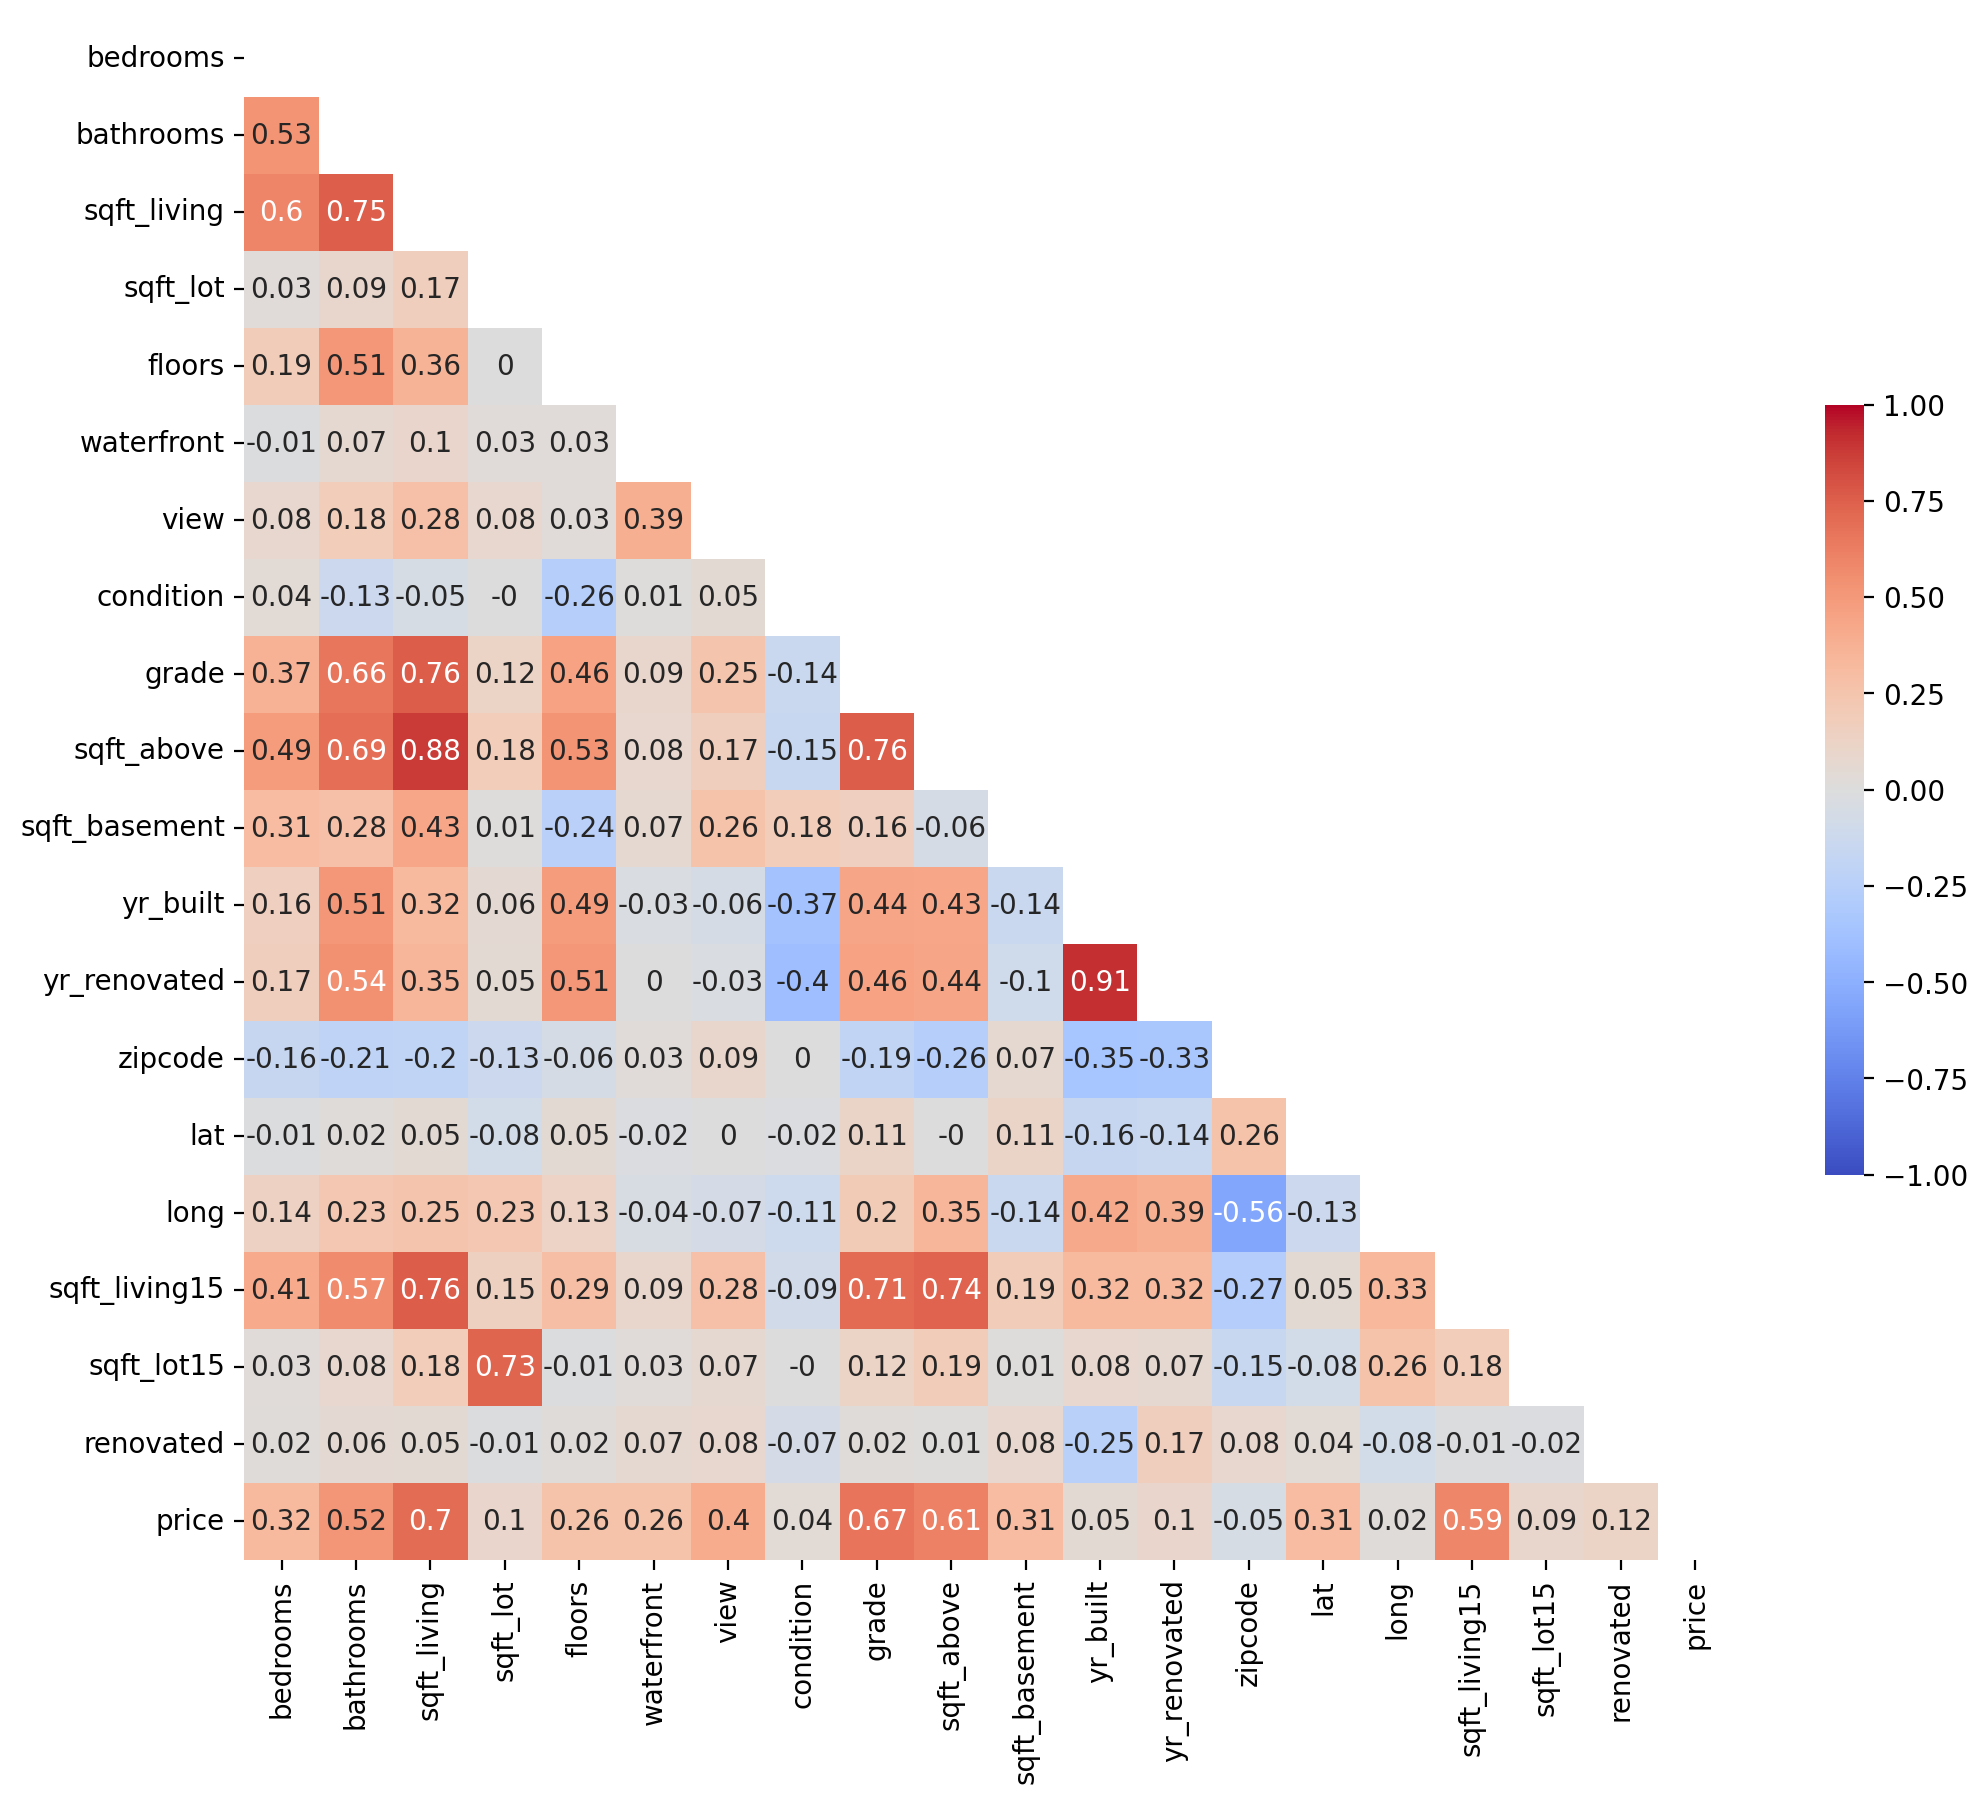

In [554]:
train_price = pd.concat([train, y], axis=1)
heatmap(train_price)

- 다중공성선이 있으면 독립 젼수의 공분산 행렬의 조건수(conditional number)가 증가

In [555]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(
    train.values, i) for i in range(train.shape[1])]
vif["features"] = train.columns
vif

VIF Factor       features
0   2.573374e+01       bedrooms
1   2.918039e+01      bathrooms
2            inf    sqft_living
3   2.431352e+00       sqft_lot
4   1.720147e+01         floors
5   1.197252e+00     waterfront
6   1.524288e+00           view
7   3.557556e+01      condition
8   1.471888e+02          grade
9            inf     sqft_above
10           inf  sqft_basement
11           inf       yr_built
12           inf   yr_renovated
13  1.628694e+06        zipcode
14  1.397476e+05            lat
15  1.355049e+06           long
16  2.735990e+01  sqft_living15
17  2.662584e+00     sqft_lot15
18           inf      renovated

- VIF factor > 10
    - 해당하는 독립변수 없이도 반응변수를 잘 설명할 수 있으므로 이 독립변수는 없어도 됨.
    - water front, view만 제외하고는 모두 10이상인데...
    - inf = 무한대
    - 'yr_renovated', 'sqft_basement'을 지웠더니 inf의 항목이 없어지고 모델 성능도 좋았졌음. 

In [556]:
trainm = train.drop(['yr_renovated', 'sqft_basement'], axis =1)
testm = test.drop(['yr_renovated', 'sqft_basement'], axis =1)

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(
    trainm.values, i) for i in range(trainm.shape[1])]
vif["features"] = trainm.columns
vif

VIF Factor       features
0   2.573374e+01       bedrooms
1   2.918039e+01      bathrooms
2   5.364507e+01    sqft_living
3   2.431352e+00       sqft_lot
4   1.720147e+01         floors
5   1.197252e+00     waterfront
6   1.524288e+00           view
7   3.557556e+01      condition
8   1.471888e+02          grade
9   3.913966e+01     sqft_above
10  9.943010e+03       yr_built
11  1.628694e+06        zipcode
12  1.397476e+05            lat
13  1.355049e+06           long
14  2.735990e+01  sqft_living15
15  2.662584e+00     sqft_lot15
16  1.227711e+00      renovated

- inf는 없앰.
- 10 이상인 많은 컬럽들을 많은 조합으로 지워봐도 모델 성능이 더 안좋아짐
- 생각지 못한 아이디어가 필요함. 

### Normalization
- 표준화 했지만 성능이 좋아지지 않았음. 
- 일부만 해야 하나?

In [ ]:
from sklearn.preprocessing import StandardScaler  # 표준화 패키지 라이브러리 
# x = trainm.values # 독립변인들의 value값만 추출
# y = y.values # 종속변인 추출

trainr = StandardScaler().fit_transform(x) # x객체에 x를 표준화한 데이터를 저장

features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_basement', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'renovated',
       'sqft_ratio']
pd.DataFrame(trainr, columns=features).head()

bedrooms  bathrooms  sqft_living  sqft_lot    floors  waterfront      view  \
0 -0.316059  -1.452865    -1.123586 -0.389958 -0.924917   -0.084662 -0.306875   
1 -1.680927  -1.452865    -2.125434  0.240276 -0.924917   -0.084662 -0.306875   
2 -0.316059  -0.149923    -0.294186  0.004933 -0.924917   -0.084662 -0.306875   
3 -0.316059   0.175813    -0.245771 -0.182372  0.932080   -0.084662 -0.306875   
4 -0.316059  -0.801394    -1.375323  0.207903 -0.924917   -0.084662 -0.306875   

   condition     grade  sqft_basement   zipcode       lat      long  \
0   -0.62902 -0.560048      -0.754589 -0.547510  1.875717 -0.358430   
1   -0.62902 -1.407676      -1.747766 -1.295641 -0.938751  1.282425   
2   -0.62902  0.287579       0.067633  0.540680 -0.075648  0.405903   
3   -0.62902 -0.560048       0.115629  0.812727 -1.407829 -1.816888   
4   -0.62902 -0.560048      -1.004147 -0.275463  2.250979 -1.094536   

   sqft_living15  sqft_lot15  renovated  sqft_ratio  
0      -0.306626   -1.038527  -0.396370   -0.207624  
1      -0.136763    1.113711   0.040533   -0.207624  
2       1.193836   -0.141457  -0.047780   -0.207624  
3      -0.802062    0.520676  -0.165258   -0.207624  
4      -0.717130   -0.405964   0.269248   -0.207624

In [ ]:
from sklearn.preprocessing import StandardScaler  # 표준화 패키지 라이브러리 
x = test.values # 독립변인들의 value값만 추출
# y = y.values # 종속변인 추출

testr = StandardScaler().fit_transform(x) # x객체에 x를 표준화한 데이터를 저장

features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_basement', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'renovated',
       'sqft_ratio']
pd.DataFrame(testr, columns=features).head()

bedrooms  bathrooms  sqft_living  sqft_lot    floors  waterfront      view  \
0 -0.304314   0.169745     0.716014 -0.107955  0.940635   -0.093454 -0.304395   
1  0.712820   1.136501     0.073488 -0.521731 -0.897718   -0.093454 -0.304395   
2  0.712820   3.070012     2.485749  2.845977 -0.897718   -0.093454 -0.304395   
3 -0.304314  -1.441514    -0.154921 -0.073332 -0.897718   -0.093454 -0.304395   
4 -0.304314   0.491997    -0.012744 -0.218429  0.940635   -0.093454 -0.304395   

   condition     grade  sqft_basement   zipcode       lat      long  \
0  -0.633259 -0.564236       0.688016 -0.681098  0.879118  1.162022   
1   2.405257 -0.564236      -1.029061 -0.203121  1.083077 -0.271583   
2  -0.633259  2.878666       2.069065  1.025962 -0.455886  0.697282   
3  -0.633259 -0.564236      -1.029061 -0.373827  1.268494 -0.332450   
4  -0.633259 -0.564236       0.361186  1.094245 -0.734012 -1.362898   

   sqft_living15  sqft_lot15  renovated  sqft_ratio  
0      -0.751033   -0.314656  -0.022311    4.342190  
1      -1.280530   -0.984457  -0.544091   -0.211991  
2       1.495750    2.878964   3.167892   -0.211991  
3      -0.879829   -0.154672   0.051806   -0.211991  
4       1.309711    0.754036  -0.033482   -0.211991

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10) # 주성분을 몇개로 할지 결정
printcipalComponents = pca.fit_transform(train_r)
principalDf = pd.DataFrame(data=printcipalComponents, columns = ['principal component1', 'principal component2',  'principal component3',  'principal component4',  'principal component5',  'principal component6', 'principal component7',  'principal component8',  'principal component9',  'principal component10'])
# 주성분으로 이루어진 데이터 프레임 구성

In [ ]:
principalDf

#3 Preprocessing

sqft_total_size = sqft_living 이었나 봄 상관관계가 1이 나옴. 헐헐
이거는 안해도 되는 일이었음. 다시 지움.

##5 Log Transformation

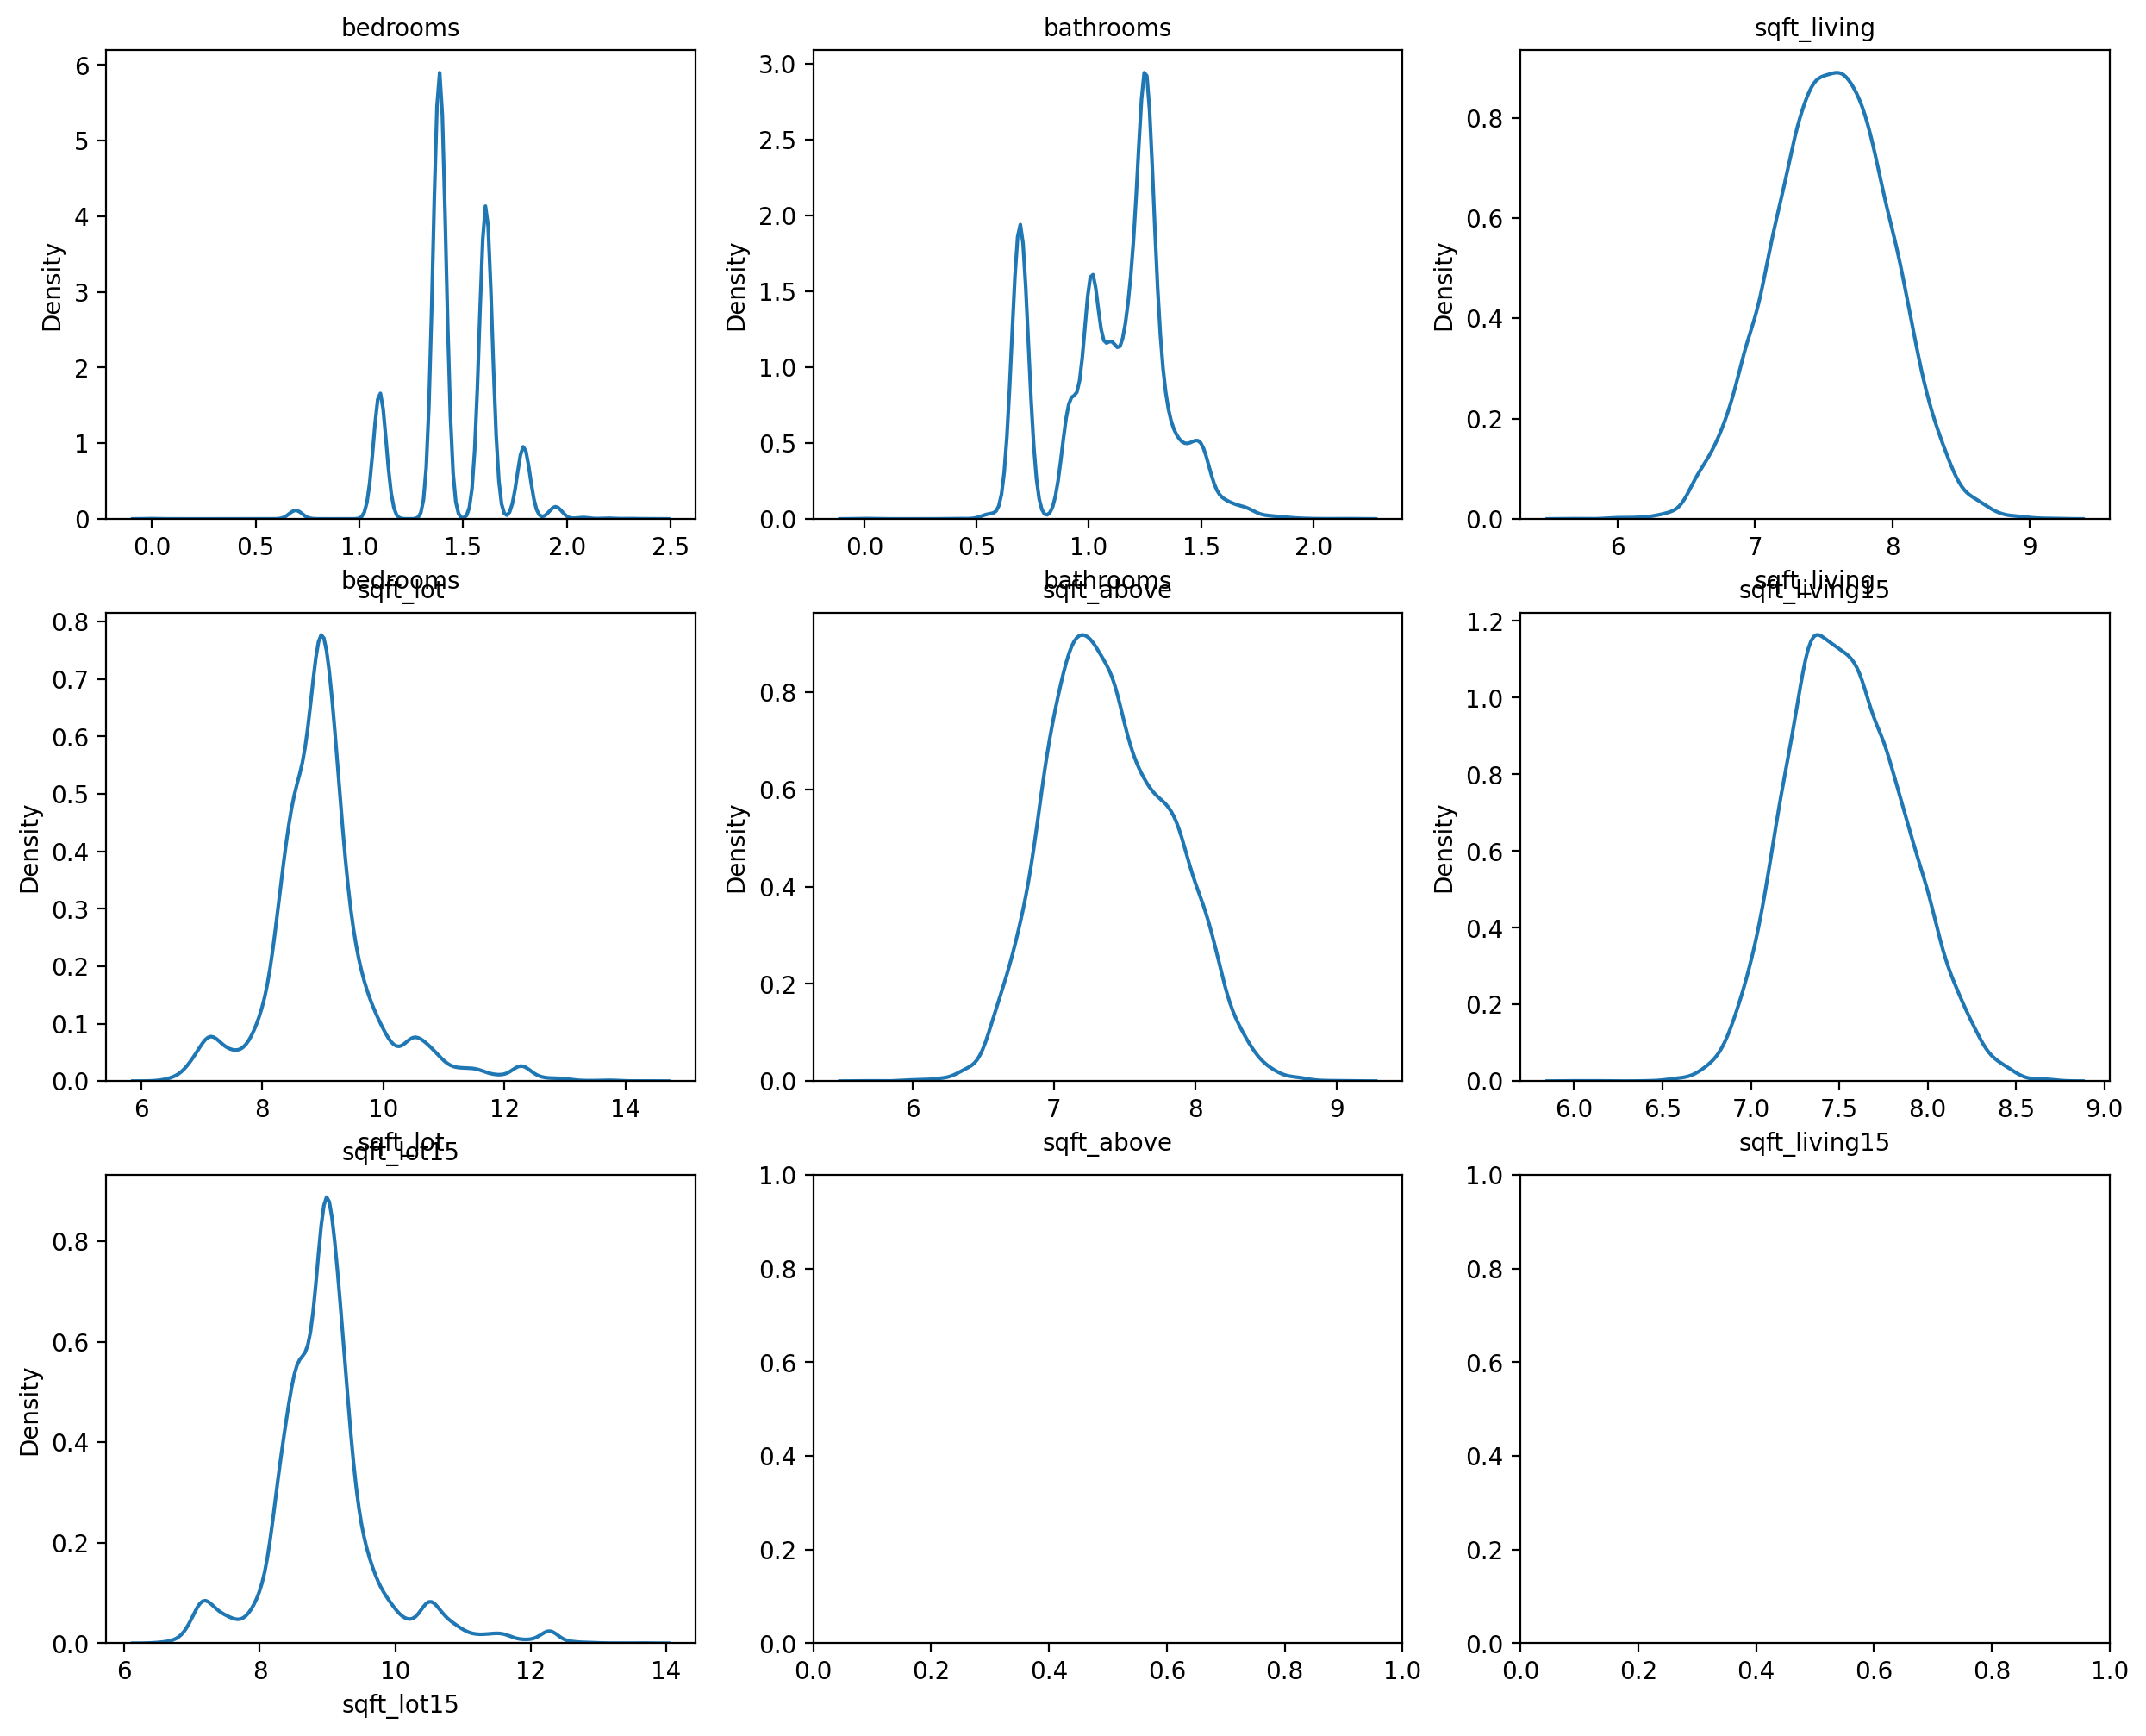

In [557]:
#로그변환으로 분포 곡선을 다듬어 준다.
#train  'bedrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_lot15', 'sqft_living15'
skew_columns = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_living15' , 'sqft_lot15'] #, 'bedrooms', 'bathrooms', 'sqft_lot15'

for c in skew_columns:
    trainm[c] = np.log1p(trainm[c].values)

fig, ax = plt.subplots(3, 3, figsize=(15, 12))

count = 0
for row in range(3):
    for col in range(3):
        if count == len(skew_columns):
            break
        sns.kdeplot(data=trainm[skew_columns[count]], ax=ax[row][col])
        ax[row][col].set_title(skew_columns[count], fontsize=10)
        count += 1

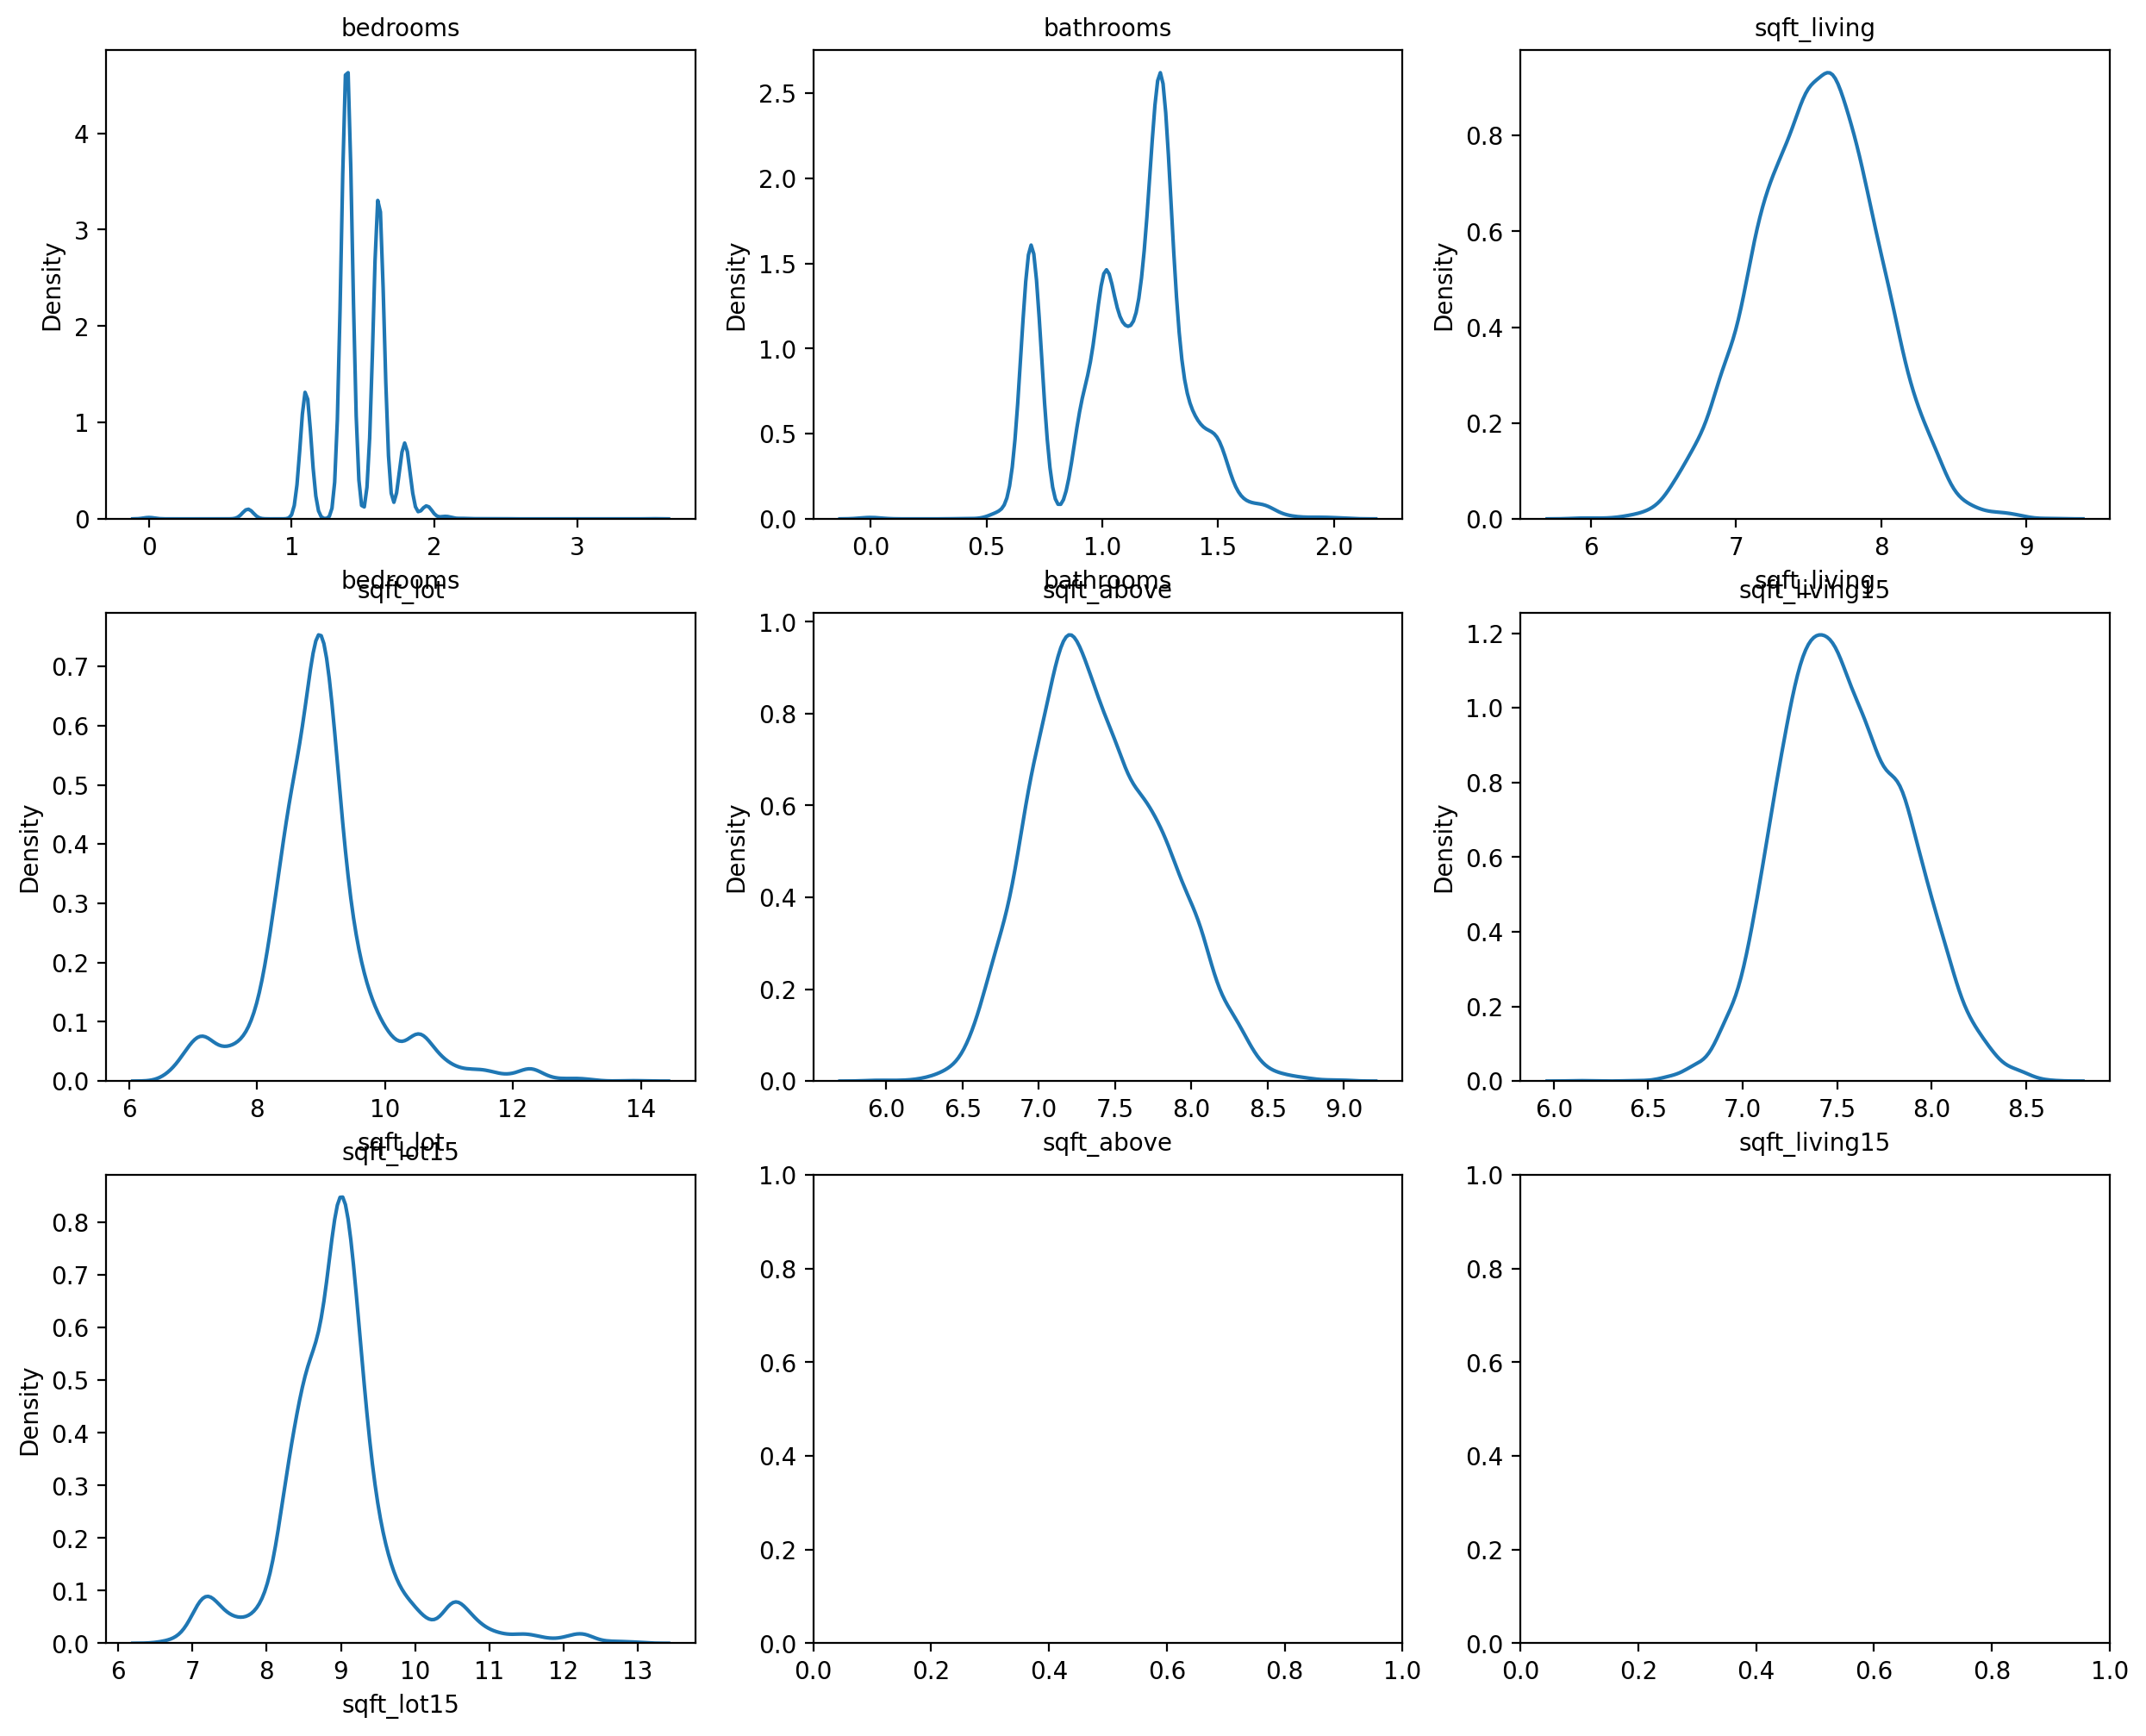

In [558]:
# #test
skew_columns = ['bedrooms', 'bathrooms',  'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_living15', 'sqft_lot15'] #'bedrooms', 'bathrooms',, 'sqft_lot15'

for c in skew_columns:
    test[c] = np.log1p(test[c].values)

fig, ax = plt.subplots(3, 3, figsize=(15, 12))

count = 0
for row in range(3):
    for col in range(3):
        if count == len(skew_columns):
            break
        sns.kdeplot(data=test[skew_columns[count]], ax=ax[row][col])
        ax[row][col].set_title(skew_columns[count], fontsize=10)
        count += 1

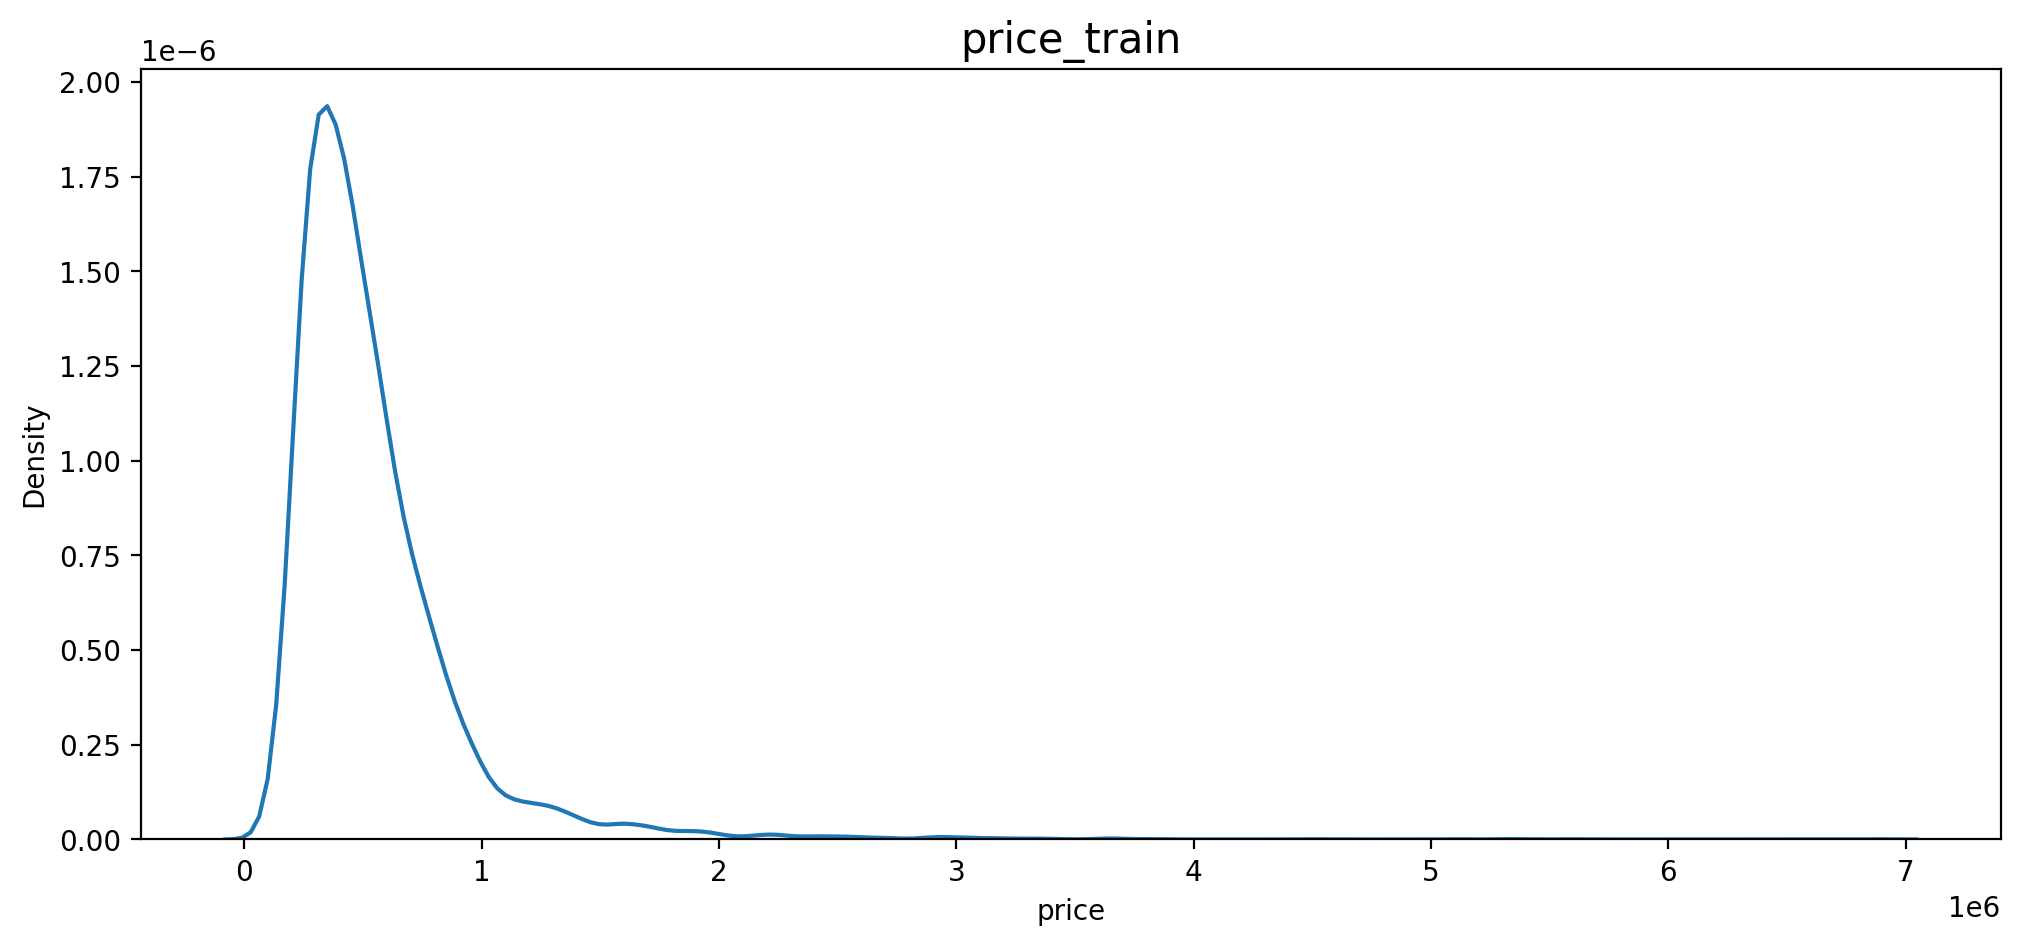

In [559]:
#seaborn의 `kdeplot`을 활용해 `y`의 분포를 확인해주세요!
fig, ax = plt.subplots(figsize=(12, 5))
sns.kdeplot(data=y)
ax.set_title('price_train', fontsize=15)
plt.show()

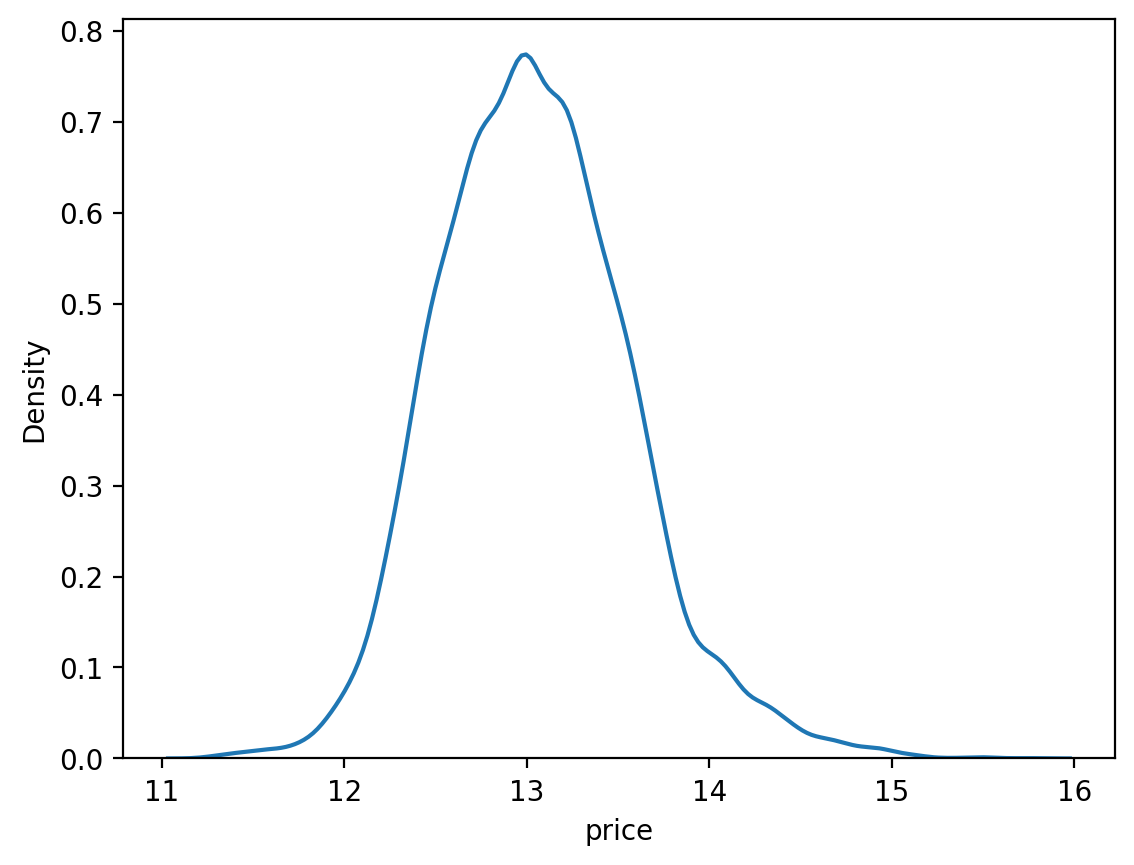

In [560]:
y = np.log1p(y)
sns.kdeplot(y)
plt.show()

In [ ]:
y = pd.DataFrame(y)

fig, ax = plt.subplots(6, 3, figsize=(15, 35))   # 가로 스크롤 때문에 그래프 확인이 불편하다면 figsize의 x값을 조절해 보세요. 

# date 변수(count==0인 경우)는 제외하고 분포를 확인합니다.
count = 1
columns = train.columns

for row in range(6):
    for col in range(3):
        plt.xticks(rotation=45)
        data = pd.concat([y['price'], train.iloc[:,count]], axis =1)
        x=data.columns[1]
        sns.regplot(x=x, y='price', data=data, ax=ax[row][col])
        count += 1
        if count == len(columns) :
            break
#

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# y = pd.DataFrame(y)

# fig, ax = plt.subplots(6, 3, figsize=(15, 35))   # 가로 스크롤 때문에 그래프 확인이 불편하다면 figsize의 x값을 조절해 보세요. 

# # date 변수(count==0인 경우)는 제외하고 분포를 확인합니다.
# count = 1
# columns = train.columns

# for row in range(7):
#     for col in range(3):
#         plt.xticks(rotation=45)
#         data = pd.concat([y['price'], train.iloc[:,count]], axis =1)
#         x=data.columns[1]
#         sns.boxplot(x=x, y='price', data=data, ax=ax[row][col])
#         count += 1
#         if count == 19 :
#             break
# #


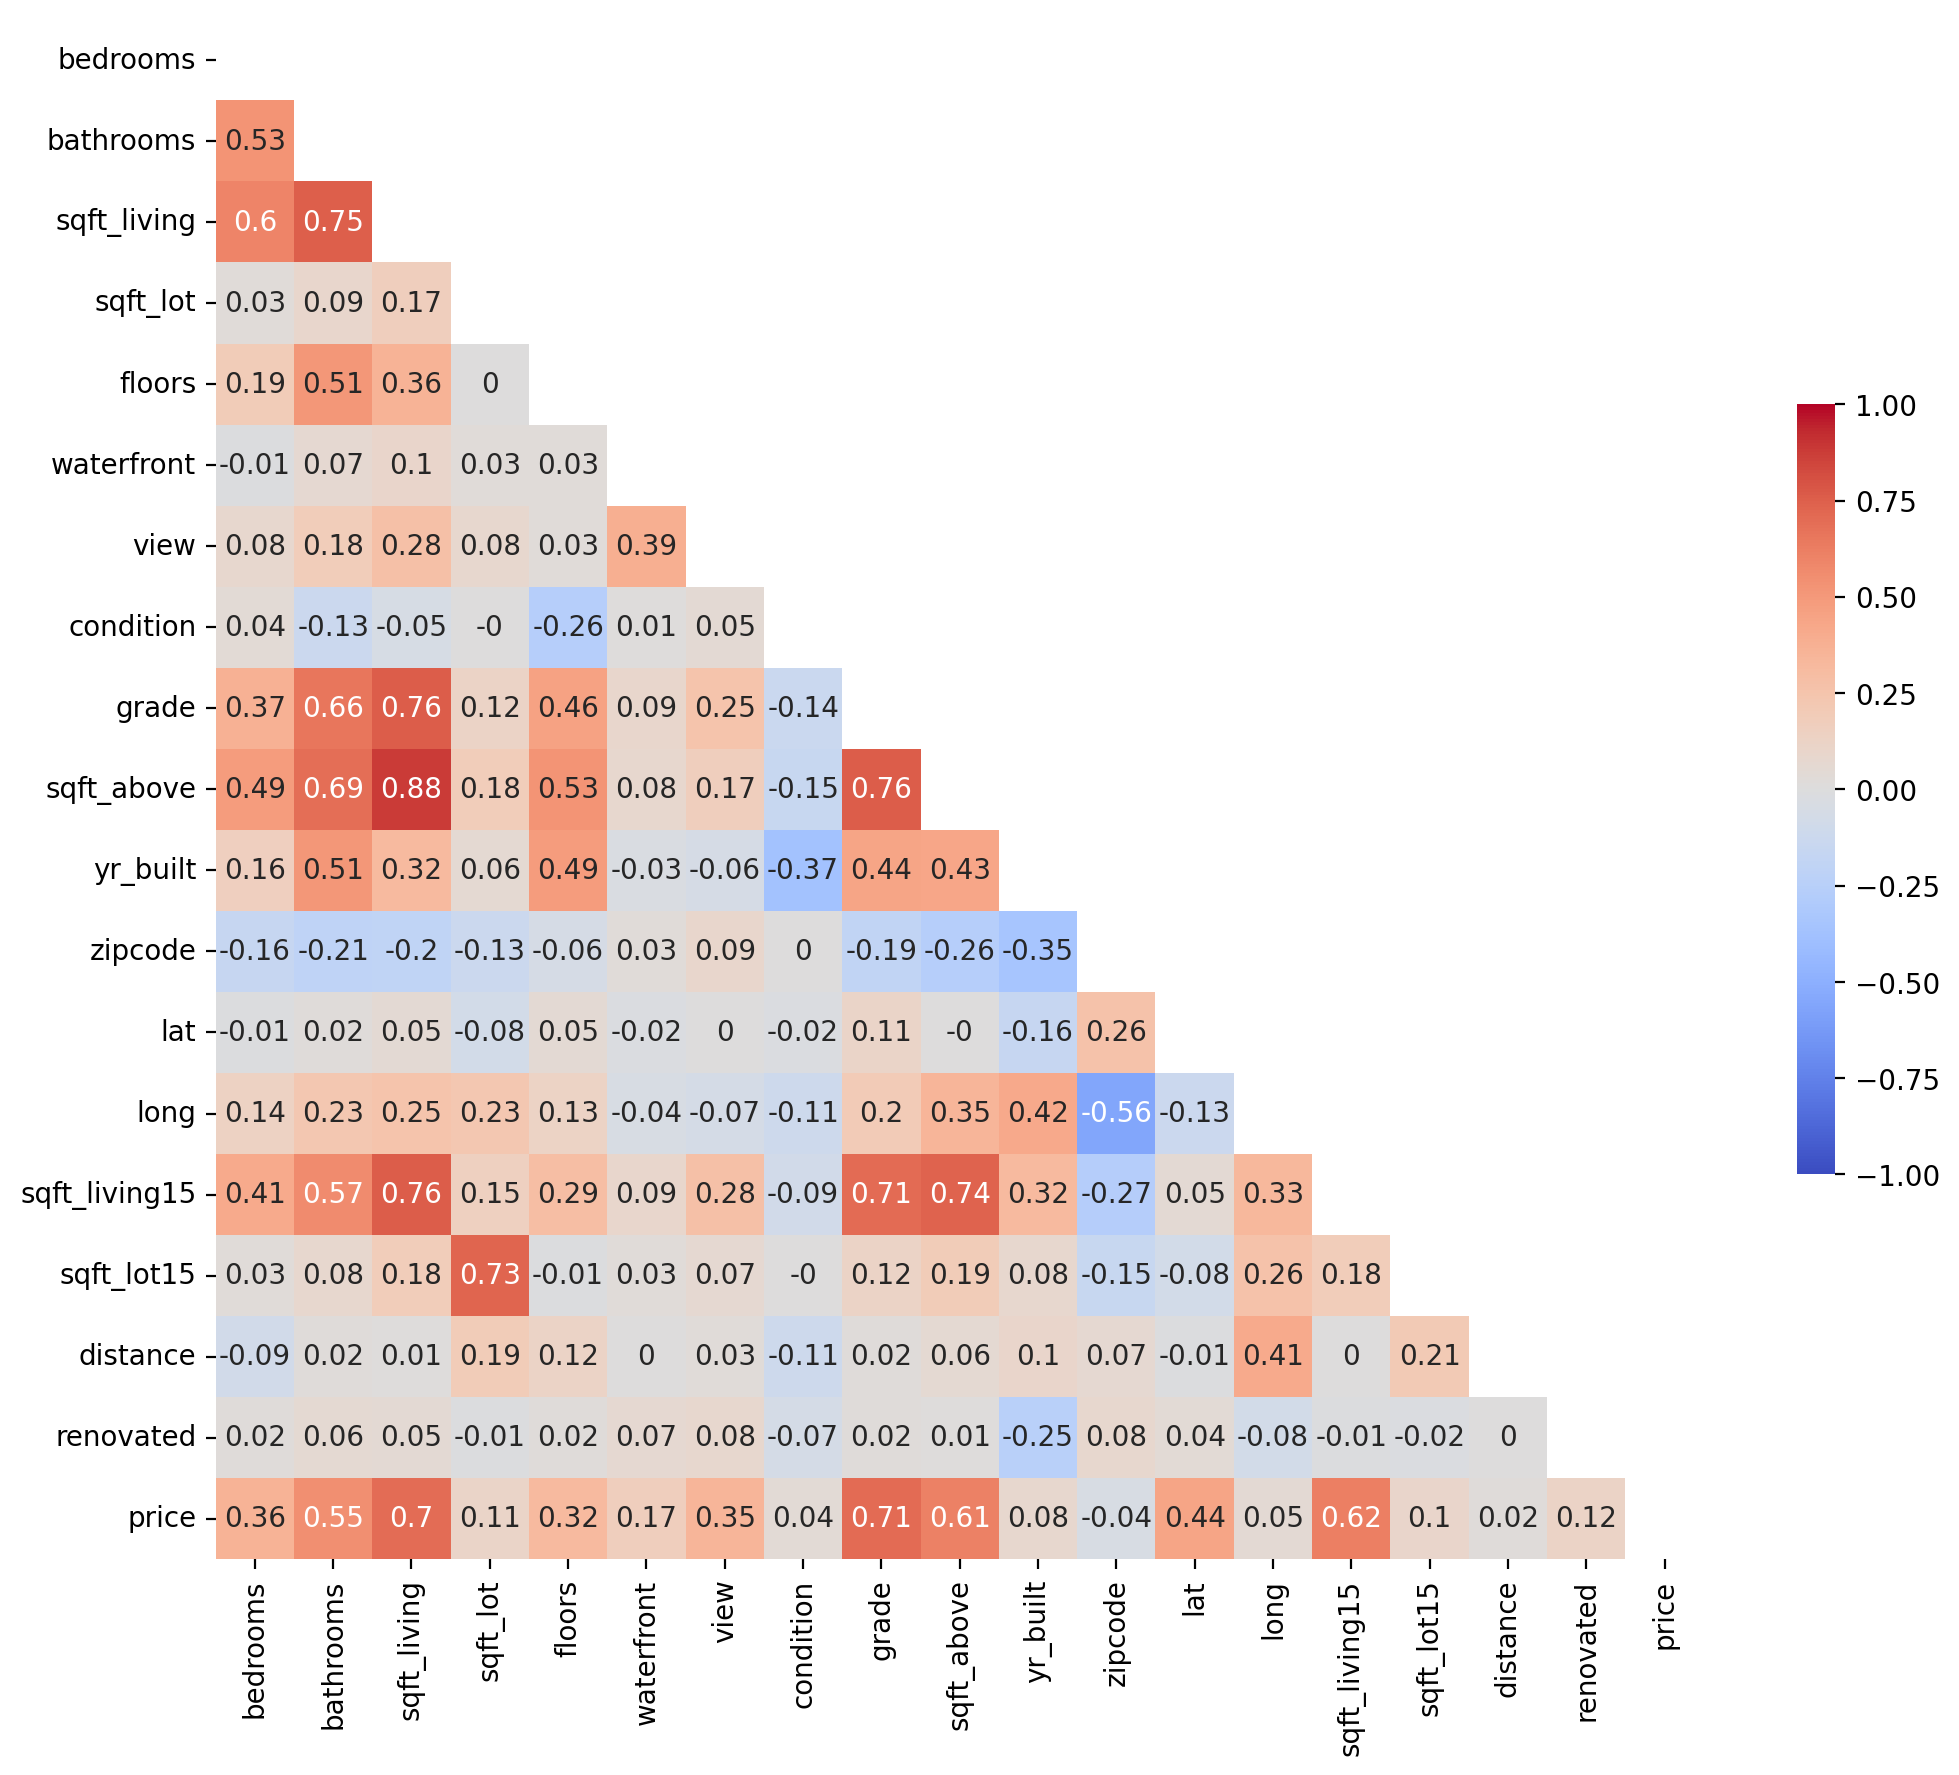

In [509]:
#다시 한번 변수간 상관 관계
train_price = pd.concat([trainm, y], axis=1)

heatmap(train_price)
#price와 feature 간 상관관계 0.3 넘는 거만 bedrooms, bathrooms, sqt_living, floors,  view, grade, sqft_above, sqft_basement, lat, sqt_living15, sqft_total_size이지만 위치를 나타내는 long을 추가하자. 

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15030 entries, 0 to 15029
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       15030 non-null  float64
 1   bathrooms      15030 non-null  float64
 2   sqft_living    15030 non-null  float64
 3   sqft_lot       15030 non-null  float64
 4   floors         15030 non-null  float64
 5   waterfront     15030 non-null  int64  
 6   view           15030 non-null  int64  
 7   condition      15030 non-null  int64  
 8   grade          15030 non-null  int64  
 9   sqft_above     15030 non-null  int64  
 10  sqft_basement  15030 non-null  int64  
 11  yr_built       15030 non-null  int64  
 12  yr_renovated   15030 non-null  float64
 13  zipcode        15030 non-null  int64  
 14  lat            15030 non-null  float64
 15  long           15030 non-null  float64
 16  sqft_living15  15030 non-null  float64
 17  sqft_lot15     15030 non-null  float64
 18  distan

In [ ]:
# temp <- full %>% filter(filter=="train") %>% group_by(zipcode) %>% summarize(freq=n(), mean_log_price=mean(log(price)), median_log_price=median(log(price)))
# temp$zipcode <- factor(temp$zipcode)
# p1 <- temp %>% arrange(desc(mean_log_price)) %>% 
# ggplot(aes(x=reorder(zipcode, mean_log_price), y=mean_log_price, group=1)) + geom_line() +  geom_point() + geom_hline(yintercept=mean(log(unlist(full[filter=="train", "price", with=F]))), linetype="dashed", color = "red") +  theme_light() + theme(plot.title = element_text(hjust = 0.5), axis.text.x = element_text(angle = 90, vjust = 0.5)) + ggtitle("mean log price by zipcode")

In [ ]:
#bedrooms, bathrooms, sqt_living, floors,  view, grade, lat, long, sqt_living15, sqft_total_size
# train = train.drop(columns=['condition', 'yr_built', 'zipcode'])
# test = test.drop(columns=['condition', 'yr_built', 'zipcode'])

KeyError: ignored

#4 Model

In [467]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

print('얍💢')

얍💢


In [468]:
def rmse(y_test, y_pred):
    return np.sqrt(mean_squared_error(np.expm1(y_test), np.expm1(y_pred)))

print('얍💢')

얍💢


In [469]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

print('얍💢')

얍💢


In [470]:
# random_state는 모델초기화나 데이터셋 구성에 사용되는 랜덤 시드값입니다. 
#random_state=None    # 이게 초기값입니다. 아무것도 지정하지 않고 None을 넘겨주면 모델 내부에서 임의로 선택합니다.  
random_state=2020        # 하지만 우리는 이렇게 고정값을 세팅해 두겠습니다. 

gboost = GradientBoostingRegressor(random_state=random_state)
xgboost = XGBRegressor(random_state=random_state)
lightgbm = LGBMRegressor(random_state=random_state)
rdforest = RandomForestRegressor(random_state=random_state)

models = [gboost, xgboost, lightgbm, rdforest]

print('얍💢')

얍💢


In [471]:
gboost.__class__.__name__

'GradientBoostingRegressor'

In [514]:
def get_scores(models, train, y):
    df ={}

    for model in models:
        # 모델 이름 획득
        model_name = model.__class__.__name__

        # train, test 데이터셋 분리 - 여기에도 random_state를 고정합니다. 
        X_train, X_test, y_train, y_test = train_test_split(train, y, random_state=random_state, test_size=0.2)

        # 모델 학습
        model.fit(X_train, y_train)
        
        # 예측
        y_pred = model.predict(X_test)

        # 예측 결과의 rmse값 저장
        df[model_name] = rmse(y_test, y_pred)
        
        # data frame에 저장
        score_df = pd.DataFrame(df, index=['RMSE']).T.sort_values('RMSE', ascending=False)

    return score_df

get_scores(models, trainm, y)

RMSE
GradientBoostingRegressor  130631.042525
RandomForestRegressor      125166.557629
XGBRegressor               109233.371066
LGBMRegressor              107936.739752

#5 Tuning Hyperparameter
- Factor of GridSearchCV
    - param_grid : 탐색할 파라미터의 종류 (딕셔너리로 입력)
    - scoring : 모델의 성능을 평가할 지표
    - cv : cross validation을 수행하기 위해 train 데이터셋을 나누는 조각의 개수
    - verbose : 그리드 탐색을 진행하면서 진행 과정을 출력해서 보여줄 메세지의 양 (숫자가 클수록 더 많은 메세지를 출력합니다.)
    - n_jobs : 그리드 탐색을 진행하면서 사용할 CPU의 개수

- Factor of lightgbm
    - max_depth : 의사 결정 나무의 깊이, 정수 사용, default = -1 제한 없음. 많은 feature 가 있는 경우 더욱 높게 설정. 파라미터 설정시 가장 먼저 설정정
    - learning_rate : 한 스텝에 이동하는 양을 결정하는 파라미터, 보통 0.0001~0.1 사이의 실수 사용. 0.05~0.1정도로 맞춤.
    - n_estimators : 사용하는 개별 모델의 개수, 보통 50~100 이상의 정수 사용
    - num_leaves : 하나의 LightGBM 트리가 가질 수 있는 최대 잎의 수. 결정 드리는 이진트리 형태이므로 depth=4이면 15로 설정하면 트리가 가질 수 있는 최대 잎사귀 수. 최대 잎사귀수보다 작으면 규제로 작동.
    - boosting_type : 부스팅 방식, gbdt, rf 등의 문자열 입력

    - http://machinelearningkorea.com/2019/09/29/lightgbm-%ED%8C%8C%EB%9D%BC%EB%AF%B8%ED%84%B0/
    - https://injo.tistory.com/48

- 하이퍼 파라미터 튜닝방안  

num_leaves의 개수를 중심으로 min_child_sampes(min_data_in_leaf), max_depth를
함께 조절하면서 모델의 복잡도를 줄이는 것이 기본 튜닝 방안입니다.

    - num_leaves를 늘리면 정확도가 높아지지만 트리가 깊어지고 과접합되기 쉬움
    - min_child_samples(min_data_in_leaf)를 크게 설정하면 트리가 깊어지는 것을 방지
    - max_depth는 명시적으로 깊이를 제한. 위의 두 파라미터와 함꼐 과적합을 개선하는데 사용   

- learning_rate을 줄이면서 n_estimator를 크게하는 것은 부스팅에서의 기본적인 튜닝 방안

In [118]:
#함수로 만들기 : 그리드 탐색, 결과 확인까지

def my_GridSearch(model, train, y, param_grid, verbose=2, n_jobs=5):

    grid_model = GridSearchCV(model, param_grid=param_grid, \
                            scoring='neg_mean_squared_error', \
                            cv=5, verbose=verbose, n_jobs=n_jobs)

    grid_model.fit(train, y)

    params = grid_model.cv_results_['params']
    score = grid_model.cv_results_['mean_test_score']

    results = pd.DataFrame(params)
    results['score'] = score
    results['RMSLE'] = np.sqrt(-1 * results['score'])
    results = results.sort_values(by = 'RMSLE', axis = 0, ascending = True, inplace = False)
    results = results.reset_index(drop=True)

    return results  

In [518]:
param_grid = {
        'max_depth':[30, 50], 
        'n_estimators':[300],
}

model = LGBMRegressor(random_state=random_state)

results = my_GridSearch(model, trainm, y, param_grid, verbose=2, n_jobs=5)
results
# RMSLE가 가장 작은 max_depth, n_estimators =10,300 조합이 가장 좋음. 

Fitting 5 folds for each of 2 candidates, totalling 10 fits


max_depth  n_estimators     score     RMSLE
0         30           300 -0.027104  0.164632
1         50           300 -0.027104  0.164632

In [519]:
model = LGBMRegressor(max_depth=30, n_estimators=300,random_state=random_state)
model.fit(trainm, y)
prediction = model.predict(testm)
prediction

array([13.09207866, 13.0925775 , 14.22694295, ..., 13.06572553,
       12.71001567, 12.99261497])

In [520]:
#로그 복구
prediction = np.expm1(prediction)
prediction

array([ 485083.63552478,  485325.67576104, 1508976.68705214, ...,
        472467.10979574,  331046.00941256,  439157.18948001])

#6 Make a File for submission

In [521]:
#결과를 CSV에 저장하기 함수

model = LGBMRegressor(max_depth=30, n_estimators=300,random_state=random_state)

def save_submission(model, train, y, test, model_name, rmsle=None):
    model.fit(train, y)
    prediction = model.predict(test)
    prediction = np.expm1(prediction)
   
    submission_path = join(data_dir, 'sample_submission.csv')
    submission = pd.read_csv(submission_path)   
    submission['price'] = prediction

    submission_csv_path = '{}/submission_{}_RMSLE_{}.csv'.format(data_dir, model_name, rmsle)
    submission.to_csv(submission_csv_path, index=False)
    print('{} saved!'.format(submission_csv_path))


In [522]:
save_submission(model, trainm, y, testm, 'LGBM', rmsle=round(results.iloc[0]['RMSLE'],5))

/content/drive/MyDrive/Colab Notebooks/aiffel/(8주차)Kaggle_datathon/data/submission_LGBM_RMSLE_0.16463.csv saved!


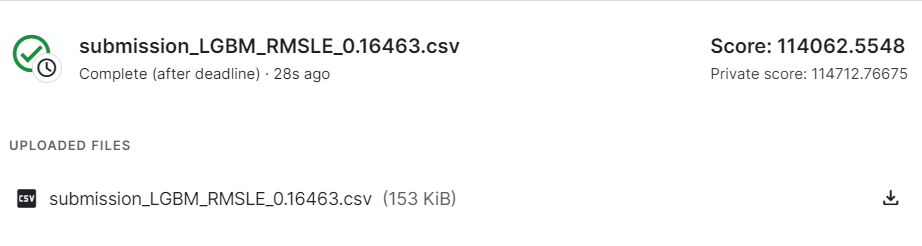

# Review
- 여러가지 컬럼을 추가하기도 제거하기도 하였지만 스코어가 좋아지지 않음.
- 하이퍼 파라미터도 한계가 있음.
- 아이디어 고갈로 끝끝

Reference
https://www.kaggle.com/code/chocozzz/house-price-prediction-eda-updated-2019-03-12